In [1]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors
import matplotlib.offsetbox as offsetbox

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_3/Amateur/FinalAmateurPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

gameId  team       summoner region champion  timestamp  \
0       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   0.000000   
1       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   1.000200   
2       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   0.495733   
3       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   2.000517   
4       EUW1_6274275803  Blue  anonymous 125   euw1   Twitch   1.979017   
...                 ...   ...            ...    ...      ...        ...   
838676  EUW1_6283483863   Red   anonymous 56   euw1    Annie  17.139450   
838677  EUW1_6283483863   Red   anonymous 56   euw1    Annie  22.688683   
838678  EUW1_6283483863   Red   anonymous 56   euw1    Annie  22.826867   
838679  EUW1_6283483863   Red   anonymous 56   euw1    Annie  25.901700   
838680  EUW1_6283483863   Red   anonymous 56   euw1    Annie  27.683317   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
0              329.0         650.0    1.0            0.0  ...   
1             6569.0       11391.0    1.0            0.0  ...   
2                NaN           NaN    NaN            NaN  ...   
3             4320.0       12059.0    1.0            0.0  ...   
4             4245.0       13217.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
838676           NaN           NaN    NaN            NaN  ...   
838677           NaN           NaN    NaN            NaN  ...   
838678           NaN           NaN    NaN            NaN  ...   
838679           NaN           NaN    NaN            NaN  ...   
838680           NaN           NaN    NaN            NaN  ...   

        trueDamageTaken  victory       eventType  skillSlot  buildingType  \
0                   0.0    False             NaN        NaN           NaN   
1                   0.0    False             NaN        NaN           NaN   
2                   NaN    False    SkillLevelUp        1.0           NaN   
3                   0.0    False             NaN        NaN           NaN   
4                   NaN    False          Assist        NaN           NaN   
...                 ...      ...             ...        ...           ...   
838676              NaN    False  Item purchased        NaN           NaN   
838677              NaN    False  Item purchased        NaN           NaN   
838678              NaN    False  Item purchased        NaN           NaN   
838679              NaN    False  Item purchased        NaN           NaN   
838680              NaN    False  Item purchased        NaN           NaN   

        lane  monster            itemName     role      rank  
0        NaN      NaN                 NaN  UTILITY  Platinum  
1        NaN      NaN                 NaN  UTILITY  Platinum  
2        NaN      NaN                 NaN  UTILITY  Platinum  
3        NaN      NaN                 NaN  UTILITY  Platinum  
4        NaN      NaN                 NaN  UTILITY  Platinum  
...      ...      ...                 ...      ...       ...  
838676   NaN      NaN           Kindlegem  UTILITY      Gold  
838677   NaN      NaN        Knight's Vow  UTILITY      Gold  
838678   NaN      NaN     Glacial Buckler  UTILITY      Gold  
838679   NaN      NaN           Kindlegem  UTILITY      Gold  
838680   NaN      NaN  Zeke's Convergence  UTILITY      Gold  

[838681 rows x 56 columns]

Average game time

In [3]:
temp_df = df[df["eventType"].isna()]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {}".format(np.mean(match_time)))

The matches have an average time of 30.2937931059582


In [4]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Red") & (df["victory"] == True)]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {} when they win on the red side".format(np.mean(match_time)))

The matches have an average time of 30.443531504620594 when they win on the red side


In [5]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Red") & (df["victory"] == False)]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {} when they lose on the red side".format(np.mean(match_time)))

The matches have an average time of 30.43849778962331 when they lose on the red side


In [6]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Blue") & (df["victory"] == True)]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {} when they win on the blue side".format(np.mean(match_time)))

The matches have an average time of 29.885469572649573 when they win on the blue side


In [7]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Blue") & (df["victory"] == False)]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("The matches have an average time of {} when they lose on the blue side".format(np.mean(match_time)))

The matches have an average time of 30.437745732172846 when they lose on the blue side


In [3]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]
jungler_deaths_df

gameId  team       summoner region    champion  timestamp  \
2889    EUW1_6274465314   Red  anonymous 129   euw1      Maokai  11.513217   
2920    EUW1_6274421335   Red  anonymous 129   euw1  MonkeyKing   8.982983   
2934    EUW1_6274421335   Red  anonymous 129   euw1  MonkeyKing  16.199850   
2940    EUW1_6274421335   Red  anonymous 129   euw1  MonkeyKing  19.408433   
2945    EUW1_6274421335   Red  anonymous 129   euw1  MonkeyKing  20.767800   
...                 ...   ...            ...    ...         ...        ...   
642404  EUW1_6289301059  Blue  anonymous 165   euw1        Ekko  16.234150   
642412  EUW1_6289301059  Blue  anonymous 165   euw1        Ekko  19.922367   
642417  EUW1_6289301059  Blue  anonymous 165   euw1        Ekko  21.353700   
642426  EUW1_6289301059  Blue  anonymous 165   euw1        Ekko  23.927567   
642948  EUW1_6289397856   Red  anonymous 172   euw1        Ekko  11.346367   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
2889          6641.0        7209.0    NaN            NaN  ...   
2920          7920.0        7566.0    NaN            NaN  ...   
2934          7563.0       14015.0    NaN            NaN  ...   
2940          9840.0        5767.0    NaN            NaN  ...   
2945          9324.0        3640.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642404        1901.0       12644.0    NaN            NaN  ...   
642412       12026.0       10604.0    NaN            NaN  ...   
642417        7798.0       11952.0    NaN            NaN  ...   
642426       13506.0       13848.0    NaN            NaN  ...   
642948        5424.0       10756.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
2889                NaN    False      Death        NaN           NaN   NaN   
2920                NaN    False      Death        NaN           NaN   NaN   
2934                NaN    False      Death        NaN           NaN   NaN   
2940                NaN    False      Death        NaN           NaN   NaN   
2945                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642404              NaN     True      Death        NaN           NaN   NaN   
642412              NaN     True      Death        NaN           NaN   NaN   
642417              NaN     True      Death        NaN           NaN   NaN   
642426              NaN     True      Death        NaN           NaN   NaN   
642948              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
2889        NaN       NaN  JUNGLE      Gold  
2920        NaN       NaN  JUNGLE      Gold  
2934        NaN       NaN  JUNGLE      Gold  
2940        NaN       NaN  JUNGLE      Gold  
2945        NaN       NaN  JUNGLE      Gold  
...         ...       ...     ...       ...  
642404      NaN       NaN  JUNGLE  Platinum  
642412      NaN       NaN  JUNGLE  Platinum  
642417      NaN       NaN  JUNGLE  Platinum  
642426      NaN       NaN  JUNGLE  Platinum  
642948      NaN       NaN  JUNGLE      Gold  

[11955 rows x 56 columns]

Champions' winrates

In [16]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["victory"] == True)].copy()

In [17]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])
#champs_df.sort_values(by=["victories"], ascending=False)
#print(champs)
    

In [18]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["victory"] == False)].copy()

In [19]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df2 = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df2[0])] = champs[str(champs_df2[0])] + 1
    except:
        champs[str(champs_df2[0])] = 1

champs_df2 = pd.DataFrame.from_dict(champs, orient="index", columns=['defeats'])

champs_winrate = [champs_df, champs_df2]
champs_winrate_df = pd.concat(champs_winrate, axis=1)

champsWinrates = []
for row in champs_winrate_df.iterrows():
    champsWinrates_row = {}
    if(np.isnan(row[1][0])):
        row[1][0] = 0
    if(np.isnan(row[1][1])):
        row[1][1] = 0
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["win rate"] = round(row[1][0]/(row[1][0] + row[1][1]), 2)
    champsWinrates_row["matches"] = row[1][0] + row[1][1]
    champsWinrates_row["image"] = "/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/images/" + str(row[0]) + "_0.jpg"

    champsWinrates.append(champsWinrates_row)

champsWinrates_df = pd.DataFrame(champsWinrates)
#champsWinrates_df = pd.DataFrame(champsWinrates).set_index(["champion"])
champsWinrates_df = champsWinrates_df.sort_values(by=["matches", "win rate"], ascending= False)
champsWinrates_df

champion  win rate  matches  \
4           Udyr      0.54    221.0   
8           Ekko      0.55    116.0   
11       Belveth      0.55     99.0   
5           Nunu      0.47     85.0   
17         Sylas      0.42     83.0   
21         Diana      0.52     81.0   
10          Kayn      0.57     74.0   
14      MasterYi      0.56     71.0   
6        Sejuani      0.48     67.0   
1         Rengar      0.43     63.0   
25      JarvanIV      0.44     62.0   
7         Maokai      0.47     58.0   
28      Nocturne      0.54     56.0   
16         Viego      0.59     54.0   
13        Lillia      0.58     53.0   
2         LeeSin      0.47     51.0   
22       Warwick      0.60     48.0   
9     MonkeyKing      0.55     47.0   
15           Jax      0.45     44.0   
3          Amumu      0.49     43.0   
0         Singed      0.49     39.0   
12       Shyvana      0.39     36.0   
43        Rammus      0.50     30.0   
23            Vi      0.50     24.0   
35        RekSai      0.42     24.0   
20         Elise      0.43     23.0   
27       Hecarim      0.41     17.0   
34       Evelynn      0.44     16.0   
37           Zac      0.38     16.0   
31  FiddleSticks      0.36     14.0   
38       XinZhao      0.50     12.0   
42       Kindred      0.33      9.0   
33      Volibear      0.12      8.0   
19         Jayce      0.29      7.0   
40   Mordekaiser      0.50      6.0   
45        Khazix      0.17      6.0   
46        Gragas      0.17      6.0   
32       Skarner      0.75      4.0   
36       Trundle      0.25      4.0   
41         Poppy      0.25      4.0   
50         Shaco      0.00      4.0   
18   AurelionSol      1.00      3.0   
44           Zed      0.67      3.0   
48       Nidalee      0.33      3.0   
26        Graves      0.50      2.0   
30         Ivern      0.50      2.0   
39         Talon      0.50      2.0   
55       Taliyah      0.00      2.0   
56      Nautilus      0.00      2.0   
24         Teemo      1.00      1.0   
29          Sion      1.00      1.0   
47       Morgana      1.00      1.0   
49          Zeri      1.00      1.0   
51         Kaisa      0.00      1.0   
52       DrMundo      0.00      1.0   
53      Malphite      0.00      1.0   
54    Tryndamere      0.00      1.0   
57      Kassadin      0.00      1.0   
58         Garen      0.00      1.0   

                                                image  
4   /home/bambito9/Esports-Data-Analysis/API Reque...  
8   /home/bambito9/Esports-Data-Analysis/API Reque...  
11  /home/bambito9/Esports-Data-Analysis/API Reque...  
5   /home/bambito9/Esports-Data-Analysis/API Reque...  
17  /home/bambito9/Esports-Data-Analysis/API Reque...  
21  /home/bambito9/Esports-Data-Analysis/API Reque...  
10  /home/bambito9/Esports-Data-Analysis/API Reque...  
14  /home/bambito9/Esports-Data-Analysis/API Reque...  
6   /home/bambito9/Esports-Data-Analysis/API Reque...  
1   /home/bambito9/Esports-Data-Analysis/API Reque...  
25  /home/bambito9/Esports-Data-Analysis/API Reque...  
7   /home/bambito9/Esports-Data-Analysis/API Reque...  
28  /home/bambito9/Esports-Data-Analysis/API Reque...  
16  /home/bambito9/Esports-Data-Analysis/API Reque...  
13  /home/bambito9/Esports-Data-Analysis/API Reque...  
2   /home/bambito9/Esports-Data-Analysis/API Reque...  
22  /home/bambito9/Esports-Data-Analysis/API Reque...  
9   /home/bambito9/Esports-Data-Analysis/API Reque...  
15  /home/bambito9/Esports-Data-Analysis/API Reque...  
3   /home/bambito9/Esports-Data-Analysis/API Reque...  
0   /home/bambito9/Esports-Data-Analysis/API Reque...  
12  /home/bambito9/Esports-Data-Analysis/API Reque...  
43  /home/bambito9/Esports-Data-Analysis/API Reque...  
23  /home/bambito9/Esports-Data-Analysis/API Reque...  
35  /home/bambito9/Esports-Data-Analysis/API Reque...  
20  /home/bambito9/Esports-Data-Analysis/API Reque...  
27  /home/bambito9/Esports-Data-Analysis/API Reque...  
34  /home/bambito9/Esports-Data-Analysis/API Reque...  
37  /home/bambito9/Esports-Data-Analysis/AP

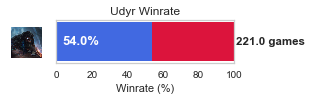

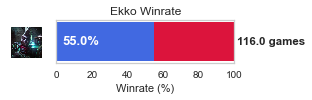

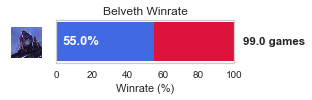

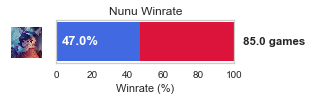

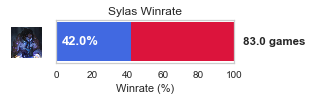

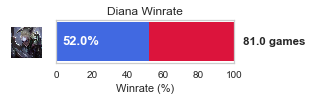

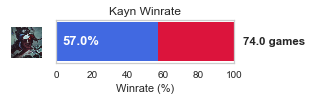

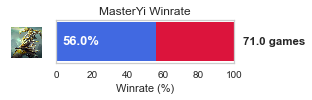

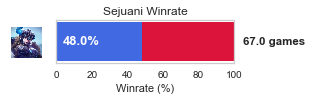

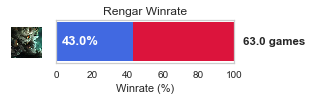

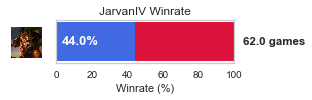

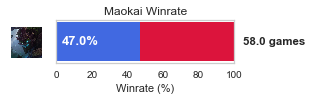

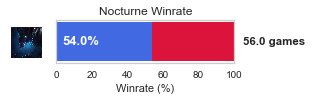

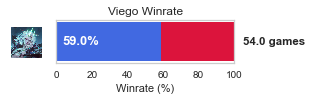

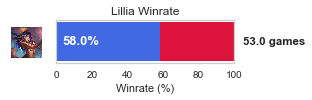

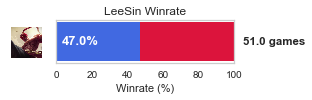

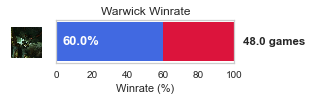

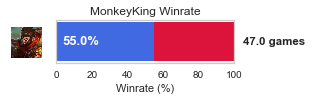

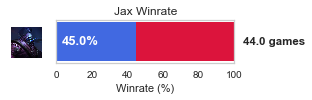

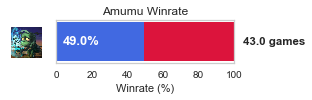

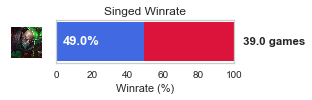

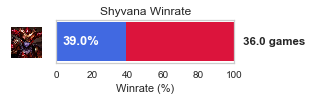

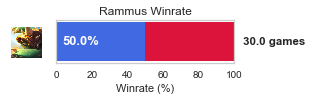

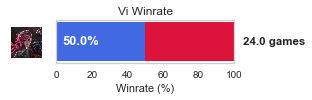

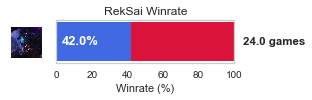

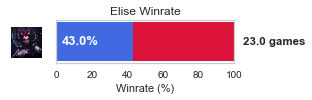

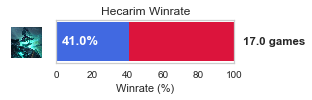

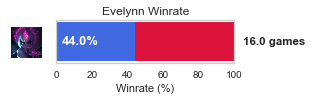

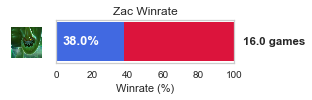

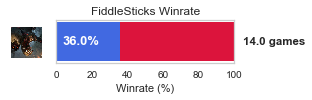

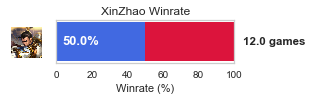

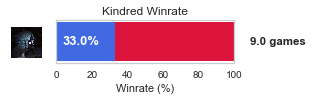

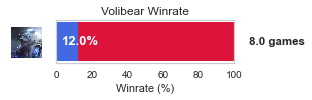

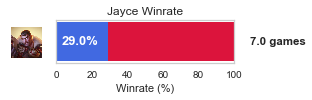

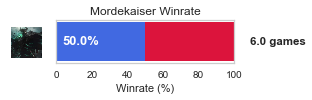

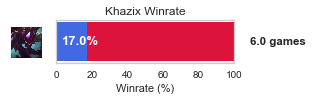

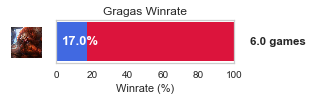

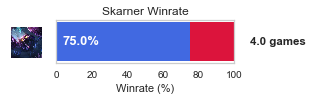

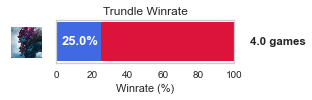

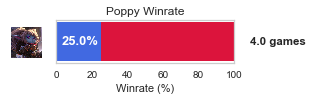

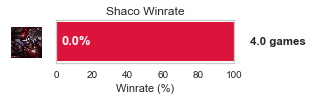

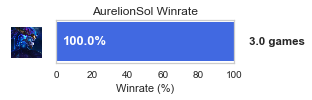

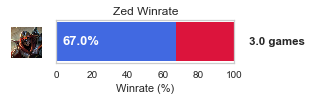

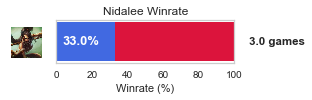

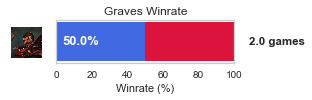

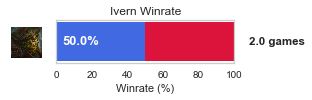

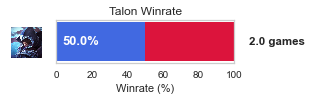

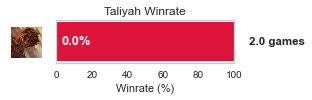

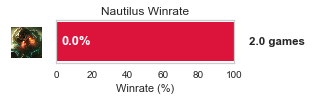

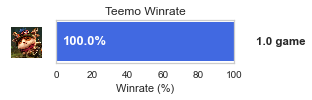

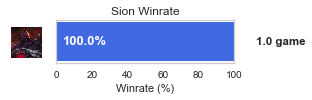

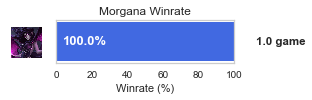

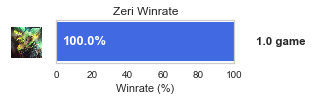

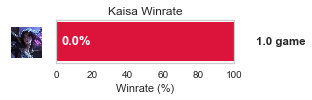

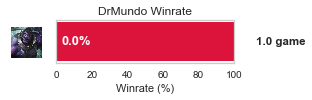

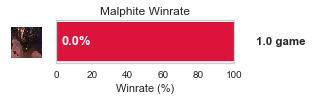

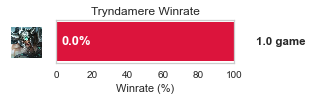

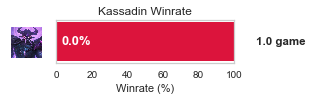

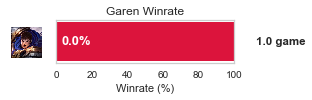

In [20]:
# Create a separate plot for each champion
for champion_name, winrate, champion_image, games_played in zip(champsWinrates_df["champion"], champsWinrates_df["win rate"], champsWinrates_df["image"], champsWinrates_df["matches"]):
    fig, ax = plt.subplots(figsize=(5, 1.5))

    # Adding the second color until the limit of x-axis (100)
    ax.barh([champion_name], [100], left=[winrate], color="crimson")

    # Plotting the winrate data
    ax.barh([champion_name], [winrate*100], color = "royalblue")


    # Set x-axis limits
    ax.set_xlim(0, 100)

    # Adding champion image to the y-axis tick label
    imagebox = offsetbox.OffsetImage(plt.imread(champion_image), zoom=0.08)  # Adjust the zoom value for image size
    #ab = offsetbox.AnnotationBbox(imagebox, (0, 0), frameon=False)
    ab = offsetbox.AnnotationBbox(imagebox, (-30, 20),xycoords='axes points', frameon=False)

    
    ax.add_artist(ab)

    # Set y-axis tick labels to champion name
    ax.set_yticks([])

    # Increase spacing between y-axis tick labels
    #ax.yaxis.set_tick_params(pad=50, labelsize=8)  # Adjust the pad and labelsize values


    # Set plot title and labels
    plt.title(f"{champion_name} Winrate")
    plt.xlabel("Winrate (%)")
    plt.ylabel("")

    # Add winrate value as annotation on the bar
    ax.annotate(f'{winrate*100:.1f}%', xy=(winrate, 0), xytext=(5, 0), textcoords='offset points', va='center', color = "white", fontweight = "bold", fontsize = 13)

    if(games_played > 1):
        # Add number of games played to the right of the plot
        ax.text(140, 0, f'{games_played} games', ha='right', va='center', fontweight = "bold", fontsize = 11.5)
    else:
        # Add number of games played to the right of the plot
        ax.text(140, 0, f'{games_played} game', ha='right', va='center', fontweight = "bold", fontsize = 11.5)

    # Remove the grid
    ax.grid(False)

    # Display the plot
    plt.tight_layout()
    plt.show()

In [13]:
print("This dataset contains {} matches in which the jungler died at least once".format(len(np.unique(jungler_deaths_df["gameId"]))))

This dataset contains 1814 matches in which the jungler died at least once


In [14]:
print("{} players died a total of {} times".format(len(np.unique(jungler_deaths_df["summoner"])), jungler_deaths_df.shape[0]))

34 players died a total of 11955 times


In [15]:
print("This Dataset contains an average of {} deaths per game".format((jungler_deaths_df.shape[0]/len(np.unique(jungler_deaths_df["gameId"])))))

This Dataset contains an average of 6.590407938257993 deaths per game


In [4]:
blueSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
blueSide_jungler_deaths_df

gameId  team       summoner region champion  timestamp  \
3383    EUW1_6272896782  Blue  anonymous 129   euw1   LeeSin   6.302467   
3396    EUW1_6272896782  Blue  anonymous 129   euw1   LeeSin  13.837467   
3406    EUW1_6272896782  Blue  anonymous 129   euw1   LeeSin  18.453517   
3417    EUW1_6272896782  Blue  anonymous 129   euw1   LeeSin  22.972600   
3425    EUW1_6272896782  Blue  anonymous 129   euw1   LeeSin  26.447450   
...                 ...   ...            ...    ...      ...        ...   
642390  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko   9.020917   
642404  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  16.234150   
642412  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  19.922367   
642417  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  21.353700   
642426  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  23.927567   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
3383          7678.0        7550.0    NaN            NaN  ...   
3396          4684.0        8960.0    NaN            NaN  ...   
3406          7188.0       11508.0    NaN            NaN  ...   
3417          6200.0       10302.0    NaN            NaN  ...   
3425          7050.0        3032.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642390       13136.0        1998.0    NaN            NaN  ...   
642404        1901.0       12644.0    NaN            NaN  ...   
642412       12026.0       10604.0    NaN            NaN  ...   
642417        7798.0       11952.0    NaN            NaN  ...   
642426       13506.0       13848.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
3383                NaN    False      Death        NaN           NaN   NaN   
3396                NaN    False      Death        NaN           NaN   NaN   
3406                NaN    False      Death        NaN           NaN   NaN   
3417                NaN    False      Death        NaN           NaN   NaN   
3425                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642390              NaN     True      Death        NaN           NaN   NaN   
642404              NaN     True      Death        NaN           NaN   NaN   
642412              NaN     True      Death        NaN           NaN   NaN   
642417              NaN     True      Death        NaN           NaN   NaN   
642426              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
3383        NaN       NaN  JUNGLE      Gold  
3396        NaN       NaN  JUNGLE      Gold  
3406        NaN       NaN  JUNGLE      Gold  
3417        NaN       NaN  JUNGLE      Gold  
3425        NaN       NaN  JUNGLE      Gold  
...         ...       ...     ...       ...  
642390      NaN       NaN  JUNGLE  Platinum  
642404      NaN       NaN  JUNGLE  Platinum  
642412      NaN       NaN  JUNGLE  Platinum  
642417      NaN       NaN  JUNGLE  Platinum  
642426      NaN       NaN  JUNGLE  Platinum  

[5691 rows x 56 columns]

In [5]:
gamesBlueSide = len(np.unique(blueSide_jungler_deaths_df["gameId"]))
gamesBlueSide

874

In [18]:
print("Blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSide_jungler_deaths_df["gameId"]))))

Blue side contains 874 matches in which the jungler died at least once


In [19]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_jungler_deaths_df["summoner"])), blueSide_jungler_deaths_df.shape[0]))

34 players died a total of 5691 times on the blue side


In [6]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

gameId team       summoner region    champion  timestamp  \
2889    EUW1_6274465314  Red  anonymous 129   euw1      Maokai  11.513217   
2920    EUW1_6274421335  Red  anonymous 129   euw1  MonkeyKing   8.982983   
2934    EUW1_6274421335  Red  anonymous 129   euw1  MonkeyKing  16.199850   
2940    EUW1_6274421335  Red  anonymous 129   euw1  MonkeyKing  19.408433   
2945    EUW1_6274421335  Red  anonymous 129   euw1  MonkeyKing  20.767800   
...                 ...  ...            ...    ...         ...        ...   
642193  EUW1_6289606636  Red  anonymous 165   euw1       Elise  13.974000   
642197  EUW1_6289606636  Red  anonymous 165   euw1       Elise  15.285900   
642214  EUW1_6289606636  Red  anonymous 165   euw1       Elise  22.387483   
642223  EUW1_6289606636  Red  anonymous 165   euw1       Elise  25.254867   
642948  EUW1_6289397856  Red  anonymous 172   euw1        Ekko  11.346367   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
2889          6641.0        7209.0    NaN            NaN  ...   
2920          7920.0        7566.0    NaN            NaN  ...   
2934          7563.0       14015.0    NaN            NaN  ...   
2940          9840.0        5767.0    NaN            NaN  ...   
2945          9324.0        3640.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642193        9367.0        7246.0    NaN            NaN  ...   
642197        9388.0        2367.0    NaN            NaN  ...   
642214        8022.0         758.0    NaN            NaN  ...   
642223        4321.0        1702.0    NaN            NaN  ...   
642948        5424.0       10756.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
2889                NaN    False      Death        NaN           NaN   NaN   
2920                NaN    False      Death        NaN           NaN   NaN   
2934                NaN    False      Death        NaN           NaN   NaN   
2940                NaN    False      Death        NaN           NaN   NaN   
2945                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642193              NaN     True      Death        NaN           NaN   NaN   
642197              NaN     True      Death        NaN           NaN   NaN   
642214              NaN     True      Death        NaN           NaN   NaN   
642223              NaN     True      Death        NaN           NaN   NaN   
642948              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
2889        NaN       NaN  JUNGLE      Gold  
2920        NaN       NaN  JUNGLE      Gold  
2934        NaN       NaN  JUNGLE      Gold  
2940        NaN       NaN  JUNGLE      Gold  
2945        NaN       NaN  JUNGLE      Gold  
...         ...       ...     ...       ...  
642193      NaN       NaN  JUNGLE  Platinum  
642197      NaN       NaN  JUNGLE  Platinum  
642214      NaN       NaN  JUNGLE  Platinum  
642223      NaN       NaN  JUNGLE  Platinum  
642948      NaN       NaN  JUNGLE      Gold  

[6264 rows x 56 columns]

In [7]:
gamesRedSide = len(np.unique(redSide_jungler_deaths_df["gameId"]))
gamesRedSide

940

In [8]:
redSideVictory_jungler_deaths_df = redSide_jungler_deaths_df[redSide_jungler_deaths_df["victory"] == True]
blueSideVictory_jungler_deaths_df = blueSide_jungler_deaths_df[blueSide_jungler_deaths_df["victory"] == True]

winsRedSide = len(np.unique(redSideVictory_jungler_deaths_df["gameId"]))
winsBlueSide = len(np.unique(blueSideVictory_jungler_deaths_df["gameId"]))

print("Red Team Victories: {}".format(winsRedSide))
print("Blue Team Victories: {}".format(winsBlueSide))

Red Team Victories: 459
Blue Team Victories: 443


In [23]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 940 matches in which the jungler died at least once


In [24]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

34 players died a total of 6264 times on the red side


function to visualize the results

In [25]:
def oldVisualizeResults(df, data_scaled, model, team, details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    plt.xlabel('X')
    plt.ylabel('Y')


    # Get the unique cluster labels
    unique_labels = np.unique(df['cluster'])

    # Normalize the cluster labels to range [0, 1]
    norm = mcolors.Normalize(vmin=0, vmax=len(unique_labels)-1)

    # Create a scalar mappable using the colormap and normalized values
    sm = plt.cm.ScalarMappable(cmap="plasma", norm=norm)
    sm.set_array([])

    # Get the face colors of the PathCollection object by mapping the cluster labels to colors using the scalar mappable
    face_colors = sm.to_rgba(unique_labels)

    colors = []
    # Iterate over the clusters and get the corresponding color code
    for i, label in enumerate(unique_labels):
        colors.append(mcolors.to_hex(face_colors[i]))

    if(details == "None"):
        title = "Clustering of Jungle Player Deaths " + team + "\nK-Means: n_clusters - " + str(model.get_params()["n_clusters"]) 
    else:
        title = "Clustering of Jungle Player Deaths when they " + details + " " + team + "\nK-Means: n_clusters - " + str(model.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(*scatter.legend_elements(), frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(model, data_scaled, colors="plasma", title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    return colors

In [26]:
def visualizeResults(df, data_scaled, model, team, cluster_colors, details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Riot Games API/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    
    plt.xlabel('X')
    plt.ylabel('Y')

    if(details == "None"):
        title = "Jungle Players' Deaths in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Jungle Players' Deaths in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(model, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [27]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [28]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [29]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [30]:
def oldStagesPerCluster(df, colors):
    c = 0

    for cluster in np.unique(df["cluster"]):
        temporary_df = df[df["cluster"] == cluster].copy()
        temporary_df = temporary_df.sort_values(by=["timestamp"])
        stage = []
        for time in temporary_df["timestamp"]:
            if(time < 15):
                stage.append("early game")
            elif((time >= 15) and (time < 25)):
                stage.append("mid game")
            else:
                stage.append("late game")
        
        stage = np.array(stage)
        temporary_df["stages"] = stage
        plt.figure(figsize=(14, 6))
        g = sns.countplot(x='stages', data=temporary_df, color=colors[c]);
        plt.title('Stages of game in cluster {}'.format(cluster));
        ax=g.axes
        c += 1

In [31]:
def stagesPerCluster(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time < 15):
            stage.append("early game")
        elif((time >= 15) and (time < 25)):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.title('Game stages in the clusters');
    ax=g.axes
    c += 1

Function that returns a scatter plot of the timestamps in each cluster:

In [32]:

def scatterTimestamp(df):
    for cluster in np.unique(df["cluster"]):
        temporary_df = df[df["cluster"] == cluster]
        temporary_df = temporary_df.sort_values(by=["timestamp"])
        arr = np.arange(1, temporary_df.shape[0]+1, 1)
        temporary_df["death"] = arr 
        #print(temporary_df)
        
        fig, ax = plt.subplots()
        scatter = ax.scatter(temporary_df['death'], temporary_df['timestamp'])
        plt.xlabel('deaths')
        plt.ylabel('timestamp')

        title = "Timestamps of Jungle Player Deaths in cluster " + str(cluster) + "\n"
        plt.title(title)
        plt.grid(visible=None)
        plt.figure(figsize=(2000,6))
        plt.show()

---
### Clustering Red Side Junglers

In [33]:
redSide_jungler_deaths_df = redSide_jungler_deaths_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSide_jungler_deaths_df

coordinate_x  coordinate_y  timestamp
2889          6641.0        7209.0  11.513217
2920          7920.0        7566.0   8.982983
2934          7563.0       14015.0  16.199850
2940          9840.0        5767.0  19.408433
2945          9324.0        3640.0  20.767800
...              ...           ...        ...
642193        9367.0        7246.0  13.974000
642197        9388.0        2367.0  15.285900
642214        8022.0         758.0  22.387483
642223        4321.0        1702.0  25.254867
642948        5424.0       10756.0  11.346367

[6264 rows x 3 columns]

In [34]:
redSide_jungler_deaths_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6264 entries, 2889 to 642948
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   coordinate_x  6264 non-null   float64
 1   coordinate_y  6264 non-null   float64
 2   timestamp     6264 non-null   float64
dtypes: float64(3)
memory usage: 195.8 KB


Normalize Data:

In [35]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSide_jungler_deaths_df)
data_scaled

array([[-0.39600356, -0.00533738, -0.83083981],
       [-0.02483394,  0.09853628, -1.10730139],
       [-0.12843641,  1.97495427, -0.31876291],
       ...,
       [ 0.00476676, -1.8823373 ,  0.35731816],
       [-1.06927447, -1.60766858,  0.67061785],
       [-0.74918058,  1.02670707, -0.84907039]])

#### K-Means:

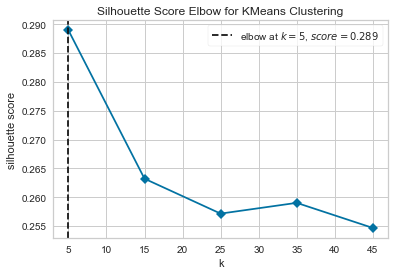

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [36]:
ks = np.arange(5,55, 10)
model = KMeans()
visualizer = KElbowVisualizer(model, k=ks, timings=False, metric= "silhouette")

visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()   

In [37]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.27182967535484087
Silhouette score for k=3: 0.29156750150396143
Silhouette score for k=4: 0.326136272270463
Silhouette score for k=5: 0.2886589554363308
Silhouette score for k=6: 0.28986551366710717
Silhouette score for k=7: 0.2955632881283365
Silhouette score for k=8: 0.2859737236682343
Silhouette score for k=9: 0.27605240625582905
Silhouette score for k=10: 0.2781165131814992
Silhouette score for k=11: 0.2710090550544409
Silhouette score for k=12: 0.27137996855124824
Silhouette score for k=13: 0.26799962594142096
Silhouette score for k=14: 0.2663020569654117
Silhouette score for k=15: 0.26269972582456164
Silhouette score for k=16: 0.2604199159693557
Silhouette score for k=17: 0.25542289445063737
Silhouette score for k=18: 0.2543312915169743
Silhouette score for k=19: 0.25571932650746043
Silhouette score for k=20: 0.25517809741065883
Silhouette score for k=25: 0.25562433373244975


In [38]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=15, random_state=42)

In [ ]:
# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means(n_clusters = 15, random_state = 42)")

In [ ]:
print("Inertia: {}".format(kmeans.inertia_))

In [ ]:
clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 3

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

In [ ]:
# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means(n_clusters = 3, random_state = 42)")

In [ ]:
print("Inertia: {}".format(kmeans.inertia_))

In [ ]:
clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 4

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

In [ ]:
# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means(n_clusters = 4, random_state = 42)")

In [ ]:
print("Inertia: {}".format(kmeans.inertia_))

In [ ]:
clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 5

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 5, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 12

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 12, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 9

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(redSide_jungler_deaths_df, data_scaled, kmeans, "on the red side", "K-Means (n_clusters = 9, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSide_jungler_deaths_df)
clusterMeanValues_df

---
### Clustering Blue Side Junglers

In [ ]:
blueSide_jungler_deaths_df = blueSide_jungler_deaths_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSide_jungler_deaths_df

In [ ]:
blueSide_jungler_deaths_df.info()

Normalize Data:

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSide_jungler_deaths_df)
data_scaled

#### K-Means:

In [ ]:
#150
ks = np.arange(5,55, 10)
model = KMeans()
visualizer = KElbowVisualizer(model, k=ks, timings=False, metric= "silhouette")

visualizer.fit(data_scaled)        # Fit the data to the visualizer
visualizer.show()   

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(data_scaled)

In [ ]:
# Add the cluster labels to the original dataframe
blueSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(blueSide_jungler_deaths_df, data_scaled, kmeans, "on the blue side", "K-Means (n_clusters = 15, random_state = 42)")

In [ ]:
print("Inertia: {}".format(kmeans.inertia_))

In [ ]:
clusterMeanValues_df = clusterMeanValues(blueSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 4

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

In [ ]:
# Add the cluster labels to the original dataframe
blueSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(blueSide_jungler_deaths_df, data_scaled, kmeans, "on the blue side", "K-Means (n_clusters = 4, random_state = 42)")

In [ ]:
print("Inertia: {}".format(kmeans.inertia_))

In [ ]:
clusterMeanValues_df = clusterMeanValues(blueSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 3

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(blueSide_jungler_deaths_df, data_scaled, kmeans, "on the blue side", "K-Means (n_clusters = 3, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(blueSide_jungler_deaths_df, data_scaled, kmeans, "on the blue side", "K-Means (n_clusters = 2, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSide_jungler_deaths_df)
clusterMeanValues_df

K-Means with k = 7

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSide_jungler_deaths_df["cluster"] = kmeans.labels_

visualizeResults(blueSide_jungler_deaths_df, data_scaled, kmeans, "on the blue side", "K-Means (n_clusters = 7, random_state = 42)")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSide_jungler_deaths_df)
clusterMeanValues_df

---

### Clustering by division - K-Means Model

#### | Division - Iron |

**Red Side**

In [40]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

In [41]:
print("This Dataset contains an average of {} deaths per game".format((jungler_deaths_df.shape[0]/len(np.unique(jungler_deaths_df["gameId"])))))

This Dataset contains an average of 6.637305699481865 deaths per game


In [42]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

gameId team      summoner region champion  timestamp  \
94713   EUW1_6283747670  Red   anonymous 2   euw1   Rammus   4.360700   
94718   EUW1_6283747670  Red   anonymous 2   euw1   Rammus   7.853883   
94725   EUW1_6283747670  Red   anonymous 2   euw1   Rammus  10.479500   
94729   EUW1_6283747670  Red   anonymous 2   euw1   Rammus  12.930233   
94732   EUW1_6283747670  Red   anonymous 2   euw1   Rammus  14.751167   
...                 ...  ...           ...    ...      ...        ...   
622381  EUW1_6289184463  Red  anonymous 15   euw1  Hecarim  10.132933   
622383  EUW1_6289184463  Red  anonymous 15   euw1  Hecarim  11.951633   
622388  EUW1_6289184463  Red  anonymous 15   euw1  Hecarim  13.824533   
622407  EUW1_6289184463  Red  anonymous 15   euw1  Hecarim  22.048467   
622413  EUW1_6289184463  Red  anonymous 15   euw1  Hecarim  25.705817   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
94713         4013.0        9949.0    NaN            NaN  ...   
94718         4379.0       13680.0    NaN            NaN  ...   
94725        13254.0        3690.0    NaN            NaN  ...   
94729         3624.0       13393.0    NaN            NaN  ...   
94732        10017.0        4683.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
622381        1243.0       11082.0    NaN            NaN  ...   
622383        8302.0        2158.0    NaN            NaN  ...   
622388        9767.0        4849.0    NaN            NaN  ...   
622407        8478.0       13486.0    NaN            NaN  ...   
622413        7716.0       13620.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
94713               NaN     True      Death        NaN           NaN   NaN   
94718               NaN     True      Death        NaN           NaN   NaN   
94725               NaN     True      Death        NaN           NaN   NaN   
94729               NaN     True      Death        NaN           NaN   NaN   
94732               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
622381              NaN     True      Death        NaN           NaN   NaN   
622383              NaN     True      Death        NaN           NaN   NaN   
622388              NaN     True      Death        NaN           NaN   NaN   
622407              NaN     True      Death        NaN           NaN   NaN   
622413              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
94713       NaN       NaN  JUNGLE  Iron  
94718       NaN       NaN  JUNGLE  Iron  
94725       NaN       NaN  JUNGLE  Iron  
94729       NaN       NaN  JUNGLE  Iron  
94732       NaN       NaN  JUNGLE  Iron  
...         ...       ...     ...   ...  
622381      NaN       NaN  JUNGLE  Iron  
622383      NaN       NaN  JUNGLE  Iron  
622388      NaN       NaN  JUNGLE  Iron  
622407      NaN       NaN  JUNGLE  Iron  
622413      NaN       NaN  JUNGLE  Iron  

[679 rows x 56 columns]

In [43]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 103 matches in which the jungler died at least once


In [44]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

4 players died a total of 679 times on the red side


---

##### Average game time

In [45]:
temp_df = df[(df["eventType"].isna()) & (df["rank"] == "Iron")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Iron matches have an average time of {}".format(np.mean(match_time)))

Iron matches have an average time of 30.755580240856375


In [46]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Red") & (df["victory"] == True) & (df["rank"] == "Iron")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Iron matches have an average time of {} when they win on the red side".format(np.mean(match_time)))

Iron matches have an average time of 31.220031585081585 when they win on the red side


In [47]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Red") & (df["victory"] == False) & (df["rank"] == "Iron")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Iron matches have an average time of {} when they lose on the red side".format(np.mean(match_time)))

Iron matches have an average time of 30.31714462809917 when they lose on the red side


In [48]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Blue") & (df["victory"] == True) & (df["rank"] == "Iron")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Iron matches have an average time of {} when they win on the blue side".format(np.mean(match_time)))

Iron matches have an average time of 30.43503139412998 when they win on the blue side


In [49]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Blue") & (df["victory"] == False) & (df["rank"] == "Iron")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Iron matches have an average time of {} when they lose on the blue side".format(np.mean(match_time)))

Iron matches have an average time of 31.029045212121215 when they lose on the blue side


---
##### Clustering Red Team Victory

In [50]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

gameId team      summoner region champion  timestamp  \
94713   EUW1_6283747670  Red   anonymous 2   euw1   Rammus   4.360700   
94718   EUW1_6283747670  Red   anonymous 2   euw1   Rammus   7.853883   
94725   EUW1_6283747670  Red   anonymous 2   euw1   Rammus  10.479500   
94729   EUW1_6283747670  Red   anonymous 2   euw1   Rammus  12.930233   
94732   EUW1_6283747670  Red   anonymous 2   euw1   Rammus  14.751167   
...                 ...  ...           ...    ...      ...        ...   
622381  EUW1_6289184463  Red  anonymous 15   euw1  Hecarim  10.132933   
622383  EUW1_6289184463  Red  anonymous 15   euw1  Hecarim  11.951633   
622388  EUW1_6289184463  Red  anonymous 15   euw1  Hecarim  13.824533   
622407  EUW1_6289184463  Red  anonymous 15   euw1  Hecarim  22.048467   
622413  EUW1_6289184463  Red  anonymous 15   euw1  Hecarim  25.705817   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
94713         4013.0        9949.0    NaN            NaN  ...   
94718         4379.0       13680.0    NaN            NaN  ...   
94725        13254.0        3690.0    NaN            NaN  ...   
94729         3624.0       13393.0    NaN            NaN  ...   
94732        10017.0        4683.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
622381        1243.0       11082.0    NaN            NaN  ...   
622383        8302.0        2158.0    NaN            NaN  ...   
622388        9767.0        4849.0    NaN            NaN  ...   
622407        8478.0       13486.0    NaN            NaN  ...   
622413        7716.0       13620.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
94713               NaN     True      Death        NaN           NaN   NaN   
94718               NaN     True      Death        NaN           NaN   NaN   
94725               NaN     True      Death        NaN           NaN   NaN   
94729               NaN     True      Death        NaN           NaN   NaN   
94732               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
622381              NaN     True      Death        NaN           NaN   NaN   
622383              NaN     True      Death        NaN           NaN   NaN   
622388              NaN     True      Death        NaN           NaN   NaN   
622407              NaN     True      Death        NaN           NaN   NaN   
622413              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
94713       NaN       NaN  JUNGLE  Iron  
94718       NaN       NaN  JUNGLE  Iron  
94725       NaN       NaN  JUNGLE  Iron  
94729       NaN       NaN  JUNGLE  Iron  
94732       NaN       NaN  JUNGLE  Iron  
...         ...       ...     ...   ...  
622381      NaN       NaN  JUNGLE  Iron  
622383      NaN       NaN  JUNGLE  Iron  
622388      NaN       NaN  JUNGLE  Iron  
622407      NaN       NaN  JUNGLE  Iron  
622413      NaN       NaN  JUNGLE  Iron  

[291 rows x 56 columns]

In [51]:
redSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [52]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

57

In [53]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

55.33980582524271

In [54]:
redSide_jungler_deaths_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red")]
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

42.857142857142854

In [55]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 15 played 13 matches
anonymous 15 has an average of 3.923076923076923 deaths per game

anonymous 2 played 13 matches
anonymous 2 has an average of 7.615384615384615 deaths per game

anonymous 3 played 5 matches
anonymous 3 has an average of 4.8 deaths per game

anonymous 8 played 26 matches
anonymous 8 has an average of 4.5 deaths per game



In [56]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 57 matches in which the jungler died at least once
4 players died a total of 291 times on the red side
Victory games on red side contains an average of 5.105263157894737 deaths per game


In [57]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
94713         4013.0        9949.0   4.360700
94718         4379.0       13680.0   7.853883
94725        13254.0        3690.0  10.479500
94729         3624.0       13393.0  12.930233
94732        10017.0        4683.0  14.751167
...              ...           ...        ...
622381        1243.0       11082.0  10.132933
622383        8302.0        2158.0  11.951633
622388        9767.0        4849.0  13.824533
622407        8478.0       13486.0  22.048467
622413        7716.0       13620.0  25.705817

[291 rows x 3 columns]

In [58]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSideVictory_df)
data_scaled

array([[-1.08031892e+00,  9.94810500e-01, -1.64286586e+00],
       [-9.69009601e-01,  2.11875340e+00, -1.25732536e+00],
       [ 1.73008942e+00, -8.90678277e-01, -9.67537669e-01],
       [-1.19862310e+00,  2.03229626e+00, -6.97051740e-01],
       [ 7.45640573e-01, -5.91542576e-01, -4.96076449e-01],
       [-3.20009340e-01,  8.47511299e-02, -1.74300028e-01],
       [ 2.72728012e-01, -1.99924840e-01,  1.75418242e-01],
       [-1.17794267e+00,  9.08052109e-01,  9.01599124e-01],
       [ 4.31480653e-01, -2.23723148e-01,  1.21812380e+00],
       [-1.78710271e+00, -1.17234180e+00,  1.73455135e+00],
       [ 1.68386260e+00, -1.38682782e+00, -1.00893171e+00],
       [-1.32027263e+00,  1.43583232e+00, -6.68302355e-01],
       [ 9.26867025e-02, -5.21653872e-01, -1.70484927e-01],
       [-1.46354631e-01, -5.01038816e-04,  8.53384296e-02],
       [-8.16035312e-01,  2.59472889e-01,  3.00102535e-01],
       [-8.53746668e-01,  1.06259049e+00,  1.20753938e+00],
       [-8.55571411e-01,  2.75146915e-02

In [59]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.31200783429403683
Silhouette score for k=3: 0.336315821483422
Silhouette score for k=4: 0.3029751904571658
Silhouette score for k=5: 0.2860659089543396
Silhouette score for k=6: 0.3099043095509693
Silhouette score for k=7: 0.3030511914225946
Silhouette score for k=8: 0.3083302493260501
Silhouette score for k=9: 0.2943800274267233
Silhouette score for k=10: 0.2905748609046002
Silhouette score for k=11: 0.2842872498496596
Silhouette score for k=12: 0.2866704744075734
Silhouette score for k=13: 0.2811020198600744
Silhouette score for k=14: 0.2845517683527997
Silhouette score for k=15: 0.2701653072832513
Silhouette score for k=16: 0.27044659339746274
Silhouette score for k=17: 0.27257804718711814
Silhouette score for k=18: 0.2758740011727354
Silhouette score for k=19: 0.2776687365335224
Silhouette score for k=20: 0.28683406685786034
Silhouette score for k=25: 0.29151514298404146


K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

K-Means with k = 3

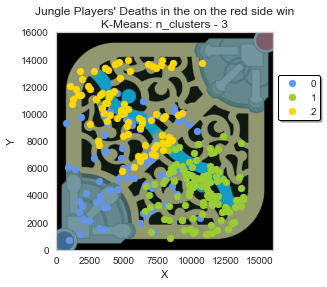

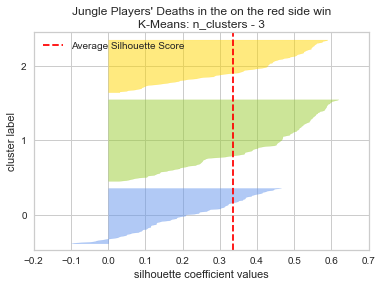

Silhouette score: 0.336315821483422
1    125
0     85
2     81
Name: cluster, dtype: int64

Inertia: 399.7635102492207

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5532.388235   6163.317647  29.116922
1        1  10436.792000   4543.040000  16.588808
2        2   5267.049383  10400.209877  12.987725

In [61]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["cornflowerblue", "yellowgreen", "gold"])
colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [62]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   2561.232865   2823.138455   6.510107
1        1   1727.367904   1825.503948   6.587628
2        2   2238.468970   2217.851049   5.583080

In [63]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


cluster  max coordinate_x  min coordinate_x  max coordinate_y  \
0        0           10585.0             734.0           11551.0   
1        1           13743.0            6543.0            8408.0   
2        2           10772.0            1070.0           13999.0   

   min coordinate_y  max timestamp  min timestamp  
0             746.0      48.984000      16.808383  
1             841.0      31.122850       0.935733  
2            5772.0      25.705817       3.963800

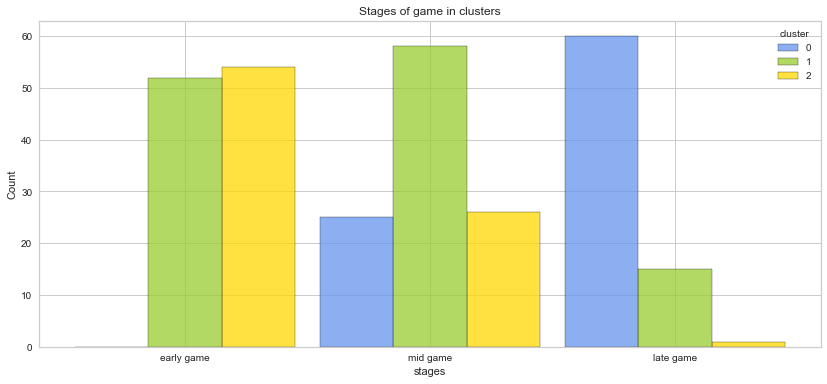

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

K-Means with k = 6

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

---
##### Clustering Red Team Defeat

In [64]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team      summoner region champion  timestamp  \
95062   EUW1_6283290818  Red   anonymous 2   euw1   Rammus   5.743183   
95069   EUW1_6283290818  Red   anonymous 2   euw1   Rammus   8.553800   
95084   EUW1_6283290818  Red   anonymous 2   euw1   Rammus  15.355967   
95089   EUW1_6283290818  Red   anonymous 2   euw1   Rammus  17.015133   
95093   EUW1_6283290818  Red   anonymous 2   euw1   Rammus  19.633500   
...                 ...  ...           ...    ...      ...        ...   
574115  EUW1_6287909560  Red  anonymous 15   euw1     Kayn  27.914667   
574119  EUW1_6287909560  Red  anonymous 15   euw1     Kayn  29.295417   
574122  EUW1_6287909560  Red  anonymous 15   euw1     Kayn  30.456033   
574129  EUW1_6287909560  Red  anonymous 15   euw1     Kayn  33.017100   
574134  EUW1_6287909560  Red  anonymous 15   euw1     Kayn  35.915900   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
95062        10336.0        3183.0    NaN            NaN  ...   
95069         9388.0        5391.0    NaN            NaN  ...   
95084        11948.0        3921.0    NaN            NaN  ...   
95089        10714.0       10775.0    NaN            NaN  ...   
95093         3043.0       11560.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
574115        5331.0       12187.0    NaN            NaN  ...   
574119        9032.0        4461.0    NaN            NaN  ...   
574122       10374.0       10419.0    NaN            NaN  ...   
574129        9901.0       12128.0    NaN            NaN  ...   
574134       11122.0        7441.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
95062               NaN    False      Death        NaN           NaN   NaN   
95069               NaN    False      Death        NaN           NaN   NaN   
95084               NaN    False      Death        NaN           NaN   NaN   
95089               NaN    False      Death        NaN           NaN   NaN   
95093               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
574115              NaN    False      Death        NaN           NaN   NaN   
574119              NaN    False      Death        NaN           NaN   NaN   
574122              NaN    False      Death        NaN           NaN   NaN   
574129              NaN    False      Death        NaN           NaN   NaN   
574134              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
95062       NaN       NaN  JUNGLE  Iron  
95069       NaN       NaN  JUNGLE  Iron  
95084       NaN       NaN  JUNGLE  Iron  
95089       NaN       NaN  JUNGLE  Iron  
95093       NaN       NaN  JUNGLE  Iron  
...         ...       ...     ...   ...  
574115      NaN       NaN  JUNGLE  Iron  
574119      NaN       NaN  JUNGLE  Iron  
574122      NaN       NaN  JUNGLE  Iron  
574129      NaN       NaN  JUNGLE  Iron  
574134      NaN       NaN  JUNGLE  Iron  

[388 rows x 56 columns]

In [65]:
redSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [66]:
lossesRedSide2 = len(np.unique(redSideDefeat_df["gameId"]))
lossesRedSide2

46

In [67]:
defeatRateRedSide = (lossesRedSide2 / gamesRedSide) * 100
defeatRateRedSide

44.66019417475729

In [ ]:
redSide_jungler_deaths_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red")]
winRateRedSide = (redSideDefeat_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

57.14285714285714

In [ ]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 15 played 7 matches
anonymous 15 has an average of 9.0 deaths per game

anonymous 2 played 9 matches
anonymous 2 has an average of 10.0 deaths per game

anonymous 3 played 5 matches
anonymous 3 has an average of 12.0 deaths per game

anonymous 8 played 25 matches
anonymous 8 has an average of 7.0 deaths per game



In [ ]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 46 matches in which the jungler died at least once
4 players died a total of 388 times on the red side
Defeat games on red side contains an average of 8.434782608695652 deaths per game


In [ ]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
95062        10336.0        3183.0   5.743183
95069         9388.0        5391.0   8.553800
95084        11948.0        3921.0  15.355967
95089        10714.0       10775.0  17.015133
95093         3043.0       11560.0  19.633500
...              ...           ...        ...
574115        5331.0       12187.0  27.914667
574119        9032.0        4461.0  29.295417
574122       10374.0       10419.0  30.456033
574129        9901.0       12128.0  33.017100
574134       11122.0        7441.0  35.915900

[388 rows x 3 columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSideDefeat_df)
data_scaled

array([[ 0.37328485, -1.45755189, -1.58610926],
       [ 0.05867754, -0.76342153, -1.26679665],
       [ 0.90825004, -1.22554636, -0.49400625],
       ...,
       [ 0.38589569,  0.81723401,  1.221504  ],
       [ 0.2289239 ,  1.35449342,  1.51246537],
       [ 0.63413016, -0.11896174,  1.84179644]])

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.2879984366451345
Silhouette score for k=3: 0.3309941816181369
Silhouette score for k=4: 0.30728835285788586
Silhouette score for k=5: 0.2903903140625712
Silhouette score for k=6: 0.30004055635348525
Silhouette score for k=7: 0.28896736458166
Silhouette score for k=8: 0.2824450343434767
Silhouette score for k=9: 0.2934689600008096
Silhouette score for k=10: 0.2836477046642398
Silhouette score for k=11: 0.2805862445546664
Silhouette score for k=12: 0.28408237668728165
Silhouette score for k=13: 0.2889366828291821
Silhouette score for k=14: 0.28275929901746943
Silhouette score for k=15: 0.2735077652246248
Silhouette score for k=16: 0.2647889685689806
Silhouette score for k=17: 0.26972256687227747
Silhouette score for k=18: 0.2657524604076574
Silhouette score for k=19: 0.27858489686716426
Silhouette score for k=20: 0.2729100404303595
Silhouette score for k=25: 0.27772083755367977


K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

K-Means with k = 3

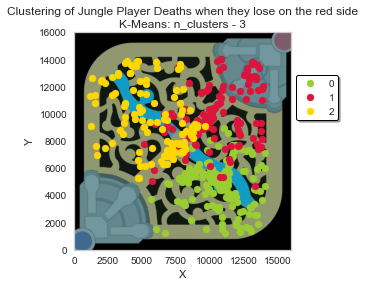

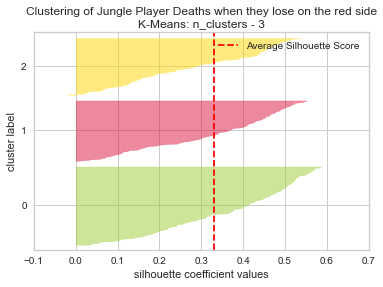

Silhouette score: 0.3309941816181369
0    155
1    120
2    113
Name: cluster, dtype: int64

Inertia: 550.3717893477577

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10741.232258   4859.709677  15.882164
1        1  10506.750000   9929.183333  28.593286
2        2   5736.637168   9638.716814  15.507255

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "crimson", "gold"])
colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", cluster_colors,"lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

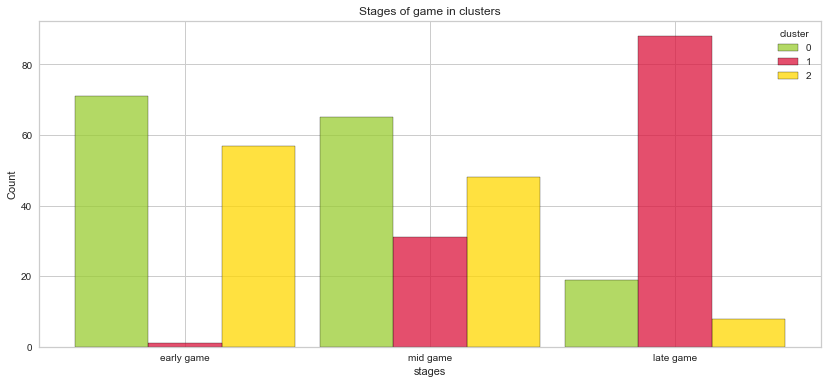

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

K-Means with k = 6

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

---
##### Clustering Blue Team Victory

In [76]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team      summoner region champion  timestamp  \
94802   EUW1_6283688741  Blue   anonymous 2   euw1   Rammus   4.391617   
94809   EUW1_6283688741  Blue   anonymous 2   euw1   Rammus   8.655550   
94818   EUW1_6283688741  Blue   anonymous 2   euw1   Rammus  12.164733   
94821   EUW1_6283688741  Blue   anonymous 2   euw1   Rammus  14.185683   
94834   EUW1_6283688741  Blue   anonymous 2   euw1   Rammus  21.036700   
...                 ...   ...           ...    ...      ...        ...   
622320  EUW1_6289240770  Blue  anonymous 15   euw1    Diana   3.903300   
622325  EUW1_6289240770  Blue  anonymous 15   euw1    Diana   6.093767   
622336  EUW1_6289240770  Blue  anonymous 15   euw1    Diana  12.308633   
622341  EUW1_6289240770  Blue  anonymous 15   euw1    Diana  15.346233   
622345  EUW1_6289240770  Blue  anonymous 15   euw1    Diana  17.908350   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
94802         2804.0        9735.0    NaN            NaN  ...   
94809         2839.0       11648.0    NaN            NaN  ...   
94818         9908.0        4673.0    NaN            NaN  ...   
94821         9350.0        5646.0    NaN            NaN  ...   
94834         9091.0        8971.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
622320        4762.0        9216.0    NaN            NaN  ...   
622325        6790.0        4573.0    NaN            NaN  ...   
622336        7730.0        5780.0    NaN            NaN  ...   
622341        8475.0        5382.0    NaN            NaN  ...   
622345        1866.0       11426.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
94802               NaN     True      Death        NaN           NaN   NaN   
94809               NaN     True      Death        NaN           NaN   NaN   
94818               NaN     True      Death        NaN           NaN   NaN   
94821               NaN     True      Death        NaN           NaN   NaN   
94834               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
622320              NaN     True      Death        NaN           NaN   NaN   
622325              NaN     True      Death        NaN           NaN   NaN   
622336              NaN     True      Death        NaN           NaN   NaN   
622341              NaN     True      Death        NaN           NaN   NaN   
622345              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
94802       NaN       NaN  JUNGLE  Iron  
94809       NaN       NaN  JUNGLE  Iron  
94818       NaN       NaN  JUNGLE  Iron  
94821       NaN       NaN  JUNGLE  Iron  
94834       NaN       NaN  JUNGLE  Iron  
...         ...       ...     ...   ...  
622320      NaN       NaN  JUNGLE  Iron  
622325      NaN       NaN  JUNGLE  Iron  
622336      NaN       NaN  JUNGLE  Iron  
622341      NaN       NaN  JUNGLE  Iron  
622345      NaN       NaN  JUNGLE  Iron  

[230 rows x 56 columns]

In [77]:
blueSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [78]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

42

In [79]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

46.666666666666664

In [ ]:
blueSide_jungler_deaths_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue")]
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

38.205980066445186

In [ ]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 15 played 14 matches
anonymous 15 has an average of 6.0 deaths per game

anonymous 2 played 9 matches
anonymous 2 has an average of 7.555555555555555 deaths per game

anonymous 3 played 5 matches
anonymous 3 has an average of 4.6 deaths per game

anonymous 8 played 14 matches
anonymous 8 has an average of 3.9285714285714284 deaths per game



In [ ]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 42 matches in which the jungler died at least once
4 players died a total of 230 times on the blue side
Victory games on blue side contains an average of 5.476190476190476 deaths per game


In [ ]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
94802         2804.0        9735.0   4.391617
94809         2839.0       11648.0   8.655550
94818         9908.0        4673.0  12.164733
94821         9350.0        5646.0  14.185683
94834         9091.0        8971.0  21.036700
...              ...           ...        ...
622320        4762.0        9216.0   3.903300
622325        6790.0        4573.0   6.093767
622336        7730.0        5780.0  12.308633
622341        8475.0        5382.0  15.346233
622345        1866.0       11426.0  17.908350

[230 rows x 3 columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSideVictory_df)
data_scaled

array([[-1.60918595,  0.70416735, -1.64673506],
       [-1.59849544,  1.31186946, -1.12223367],
       [ 0.56068024, -0.90387661, -0.69057318],
       [ 0.39024311, -0.594784  , -0.44197852],
       [ 0.31113341,  0.46146771,  0.40075693],
       [-1.94547855,  1.27597278, -1.68573705],
       [ 0.62085248, -0.9165834 , -1.11527547],
       [-1.61407303,  1.30170403, -0.79532954],
       [-0.13267509, -0.24820638, -0.547026  ],
       [-1.62262543,  1.60031353, -0.02974318],
       [ 0.26959318,  1.78392661,  0.23204214],
       [-0.33335106, -0.85908518,  0.92872101],
       [ 0.9928819 ,  1.28613821,  1.81228308],
       [ 0.55945847, -0.05379253, -1.5545871 ],
       [ 0.58328301, -0.57381781, -1.16353183],
       [-1.46684957,  0.39189804, -0.67902881],
       [ 0.72348129, -0.67801346, -0.52766441],
       [ 0.80075834,  0.41127589, -0.11757967],
       [-1.73502841,  1.78837399, -0.5986487 ],
       [ 1.30290642, -0.71613382, -0.40469045],
       [ 0.79128961, -0.88449876,  0.296

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.3012065884242245
Silhouette score for k=3: 0.34424791551533984
Silhouette score for k=4: 0.3588658337120163
Silhouette score for k=5: 0.31827834019433
Silhouette score for k=6: 0.30778429537501184
Silhouette score for k=7: 0.3083292089104466
Silhouette score for k=8: 0.3007056687353654
Silhouette score for k=9: 0.3054182152700814
Silhouette score for k=10: 0.29816765141443063
Silhouette score for k=11: 0.28237365279810883
Silhouette score for k=12: 0.31796557168245765
Silhouette score for k=13: 0.2943838973562966
Silhouette score for k=14: 0.29976182343560104
Silhouette score for k=15: 0.3053235552202021
Silhouette score for k=16: 0.31262998406156467
Silhouette score for k=17: 0.3184995510532484
Silhouette score for k=18: 0.30251808445999717
Silhouette score for k=19: 0.31638699701322787
Silhouette score for k=20: 0.3003260834614745
Silhouette score for k=25: 0.310872220362112


K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

K-Means with k = 3

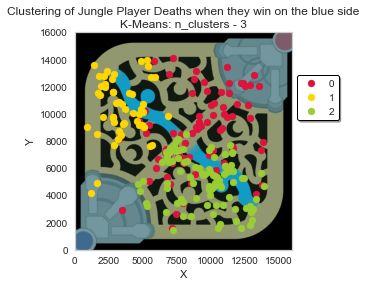

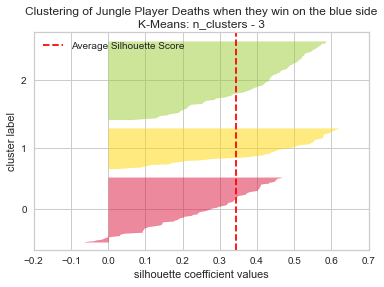

Silhouette score: 0.34424791551533984
2    98
0    81
1    51
Name: cluster, dtype: int64

Inertia: 322.5137407493504

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   9141.987654   8651.938272  25.682492
1        1   3493.803922  10446.725490  15.713981
2        2   9571.020408   5057.418367  12.320581

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "gold", "yellowgreen"])
colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

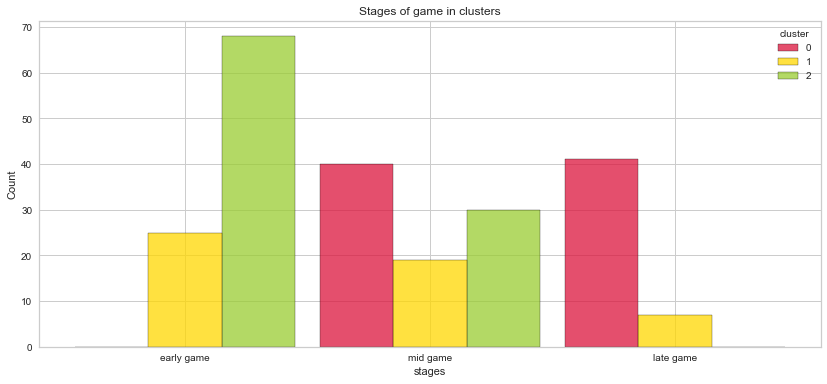

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

K-Means with k = 6

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

---
##### Clustering Blue Team Defeat

In [80]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team      summoner region champion  timestamp  \
95485   EUW1_6282035753  Blue   anonymous 2   euw1   Rammus   9.073450   
95490   EUW1_6282035753  Blue   anonymous 2   euw1   Rammus  11.900233   
95496   EUW1_6282035753  Blue   anonymous 2   euw1   Rammus  14.919033   
95501   EUW1_6282035753  Blue   anonymous 2   euw1   Rammus  17.620967   
95507   EUW1_6282035753  Blue   anonymous 2   euw1   Rammus  21.362000   
...                 ...   ...           ...    ...      ...        ...   
622292  EUW1_6289281212  Blue  anonymous 15   euw1    Diana  19.362017   
622296  EUW1_6289281212  Blue  anonymous 15   euw1    Diana  21.252483   
622298  EUW1_6289281212  Blue  anonymous 15   euw1    Diana  22.657883   
622300  EUW1_6289281212  Blue  anonymous 15   euw1    Diana  24.003167   
622308  EUW1_6289281212  Blue  anonymous 15   euw1    Diana  26.944517   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
95485        11026.0        4340.0    NaN            NaN  ...   
95490         4847.0       10308.0    NaN            NaN  ...   
95496        10384.0        4903.0    NaN            NaN  ...   
95501         2451.0        9100.0    NaN            NaN  ...   
95507         8796.0        8737.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
622292        9915.0        5212.0    NaN            NaN  ...   
622296        4156.0        3901.0    NaN            NaN  ...   
622298        4397.0       10048.0    NaN            NaN  ...   
622300        1438.0        8400.0    NaN            NaN  ...   
622308        6078.0        3878.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
95485               NaN    False      Death        NaN           NaN   NaN   
95490               NaN    False      Death        NaN           NaN   NaN   
95496               NaN    False      Death        NaN           NaN   NaN   
95501               NaN    False      Death        NaN           NaN   NaN   
95507               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
622292              NaN    False      Death        NaN           NaN   NaN   
622296              NaN    False      Death        NaN           NaN   NaN   
622298              NaN    False      Death        NaN           NaN   NaN   
622300              NaN    False      Death        NaN           NaN   NaN   
622308              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
95485       NaN       NaN  JUNGLE  Iron  
95490       NaN       NaN  JUNGLE  Iron  
95496       NaN       NaN  JUNGLE  Iron  
95501       NaN       NaN  JUNGLE  Iron  
95507       NaN       NaN  JUNGLE  Iron  
...         ...       ...     ...   ...  
622292      NaN       NaN  JUNGLE  Iron  
622296      NaN       NaN  JUNGLE  Iron  
622298      NaN       NaN  JUNGLE  Iron  
622300      NaN       NaN  JUNGLE  Iron  
622308      NaN       NaN  JUNGLE  Iron  

[372 rows x 56 columns]

In [81]:
blueSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [82]:
lossesBlueSide2 = len(np.unique(blueSideDefeat_df["gameId"]))
lossesBlueSide2

48

In [84]:
winRateBlueSide = (lossesBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

53.333333333333336

In [ ]:
blueSide_jungler_deaths_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue")]
winRateBlueSide = (blueSideDefeat_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

61.79401993355482

In [ ]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 15 played 8 matches
anonymous 15 has an average of 9.375 deaths per game

anonymous 2 played 9 matches
anonymous 2 has an average of 10.444444444444445 deaths per game

anonymous 3 played 4 matches
anonymous 3 has an average of 7.5 deaths per game

anonymous 8 played 27 matches
anonymous 8 has an average of 6.407407407407407 deaths per game



In [ ]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 48 matches in which the jungler died at least once
4 players died a total of 372 times on the blue side
Defeat games on blue side contains an average of 7.75 deaths per game


In [ ]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
95485        11026.0        4340.0   9.073450
95490         4847.0       10308.0  11.900233
95496        10384.0        4903.0  14.919033
95501         2451.0        9100.0  17.620967
95507         8796.0        8737.0  21.362000
...              ...           ...        ...
622292        9915.0        5212.0  19.362017
622296        4156.0        3901.0  21.252483
622298        4397.0       10048.0  22.657883
622300        1438.0        8400.0  24.003167
622308        6078.0        3878.0  26.944517

[372 rows x 3 columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSideDefeat_df)
data_scaled

array([[ 1.27531532, -0.65512816, -1.15817212],
       [-0.54511394,  1.3221623 , -0.87314133],
       [ 1.08617216, -0.46859757, -0.56874908],
       ...,
       [-0.67769092,  1.23602029,  0.21157621],
       [-1.54945822,  0.69001247,  0.34722409],
       [-0.18244224, -0.80819588,  0.64380688]])

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.31943701123093304
Silhouette score for k=3: 0.31804457806204145
Silhouette score for k=4: 0.3326257057579852
Silhouette score for k=5: 0.3186149004861507
Silhouette score for k=6: 0.3105243365944794
Silhouette score for k=7: 0.29760009293402206
Silhouette score for k=8: 0.29746163484148985
Silhouette score for k=9: 0.30015788553372774
Silhouette score for k=10: 0.3022507216536072
Silhouette score for k=11: 0.2793046494141957
Silhouette score for k=12: 0.28395740875899095
Silhouette score for k=13: 0.2703312793922406
Silhouette score for k=14: 0.27784839963519326
Silhouette score for k=15: 0.2721171282997105
Silhouette score for k=16: 0.2784355551257796
Silhouette score for k=17: 0.2672737495119108
Silhouette score for k=18: 0.27900547861745945
Silhouette score for k=19: 0.2738086449234397
Silhouette score for k=20: 0.2706633214699522
Silhouette score for k=25: 0.2690100845443815


K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

K-Means with k = 3

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

K-Means with k = 4

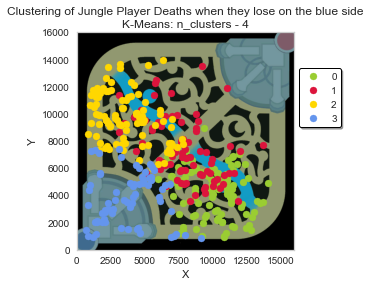

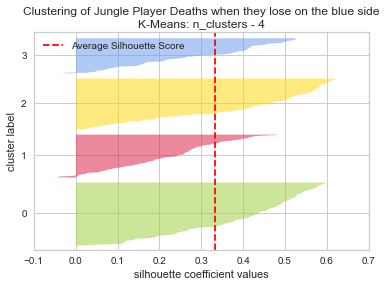

Silhouette score: 0.3326257057579852
0    122
2     99
1     83
3     68
Name: cluster, dtype: int64

Inertia: 429.1680483759588

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   9989.901639   4361.877049  15.289291
1        1   7726.915663   7428.939759  31.144878
2        2   3775.141414   9553.232323  13.337034
3        3   3787.323529   3757.867647  27.610005

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "crimson", "gold", "cornflowerblue"])
colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", cluster_colors,"lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

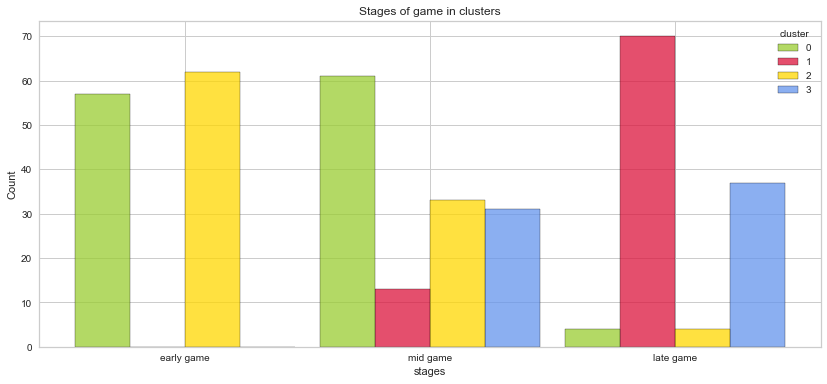

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

---
##### Red Side Win Rate vs Blue Side Win Rate

In [ ]:
wins_df = jungler_deaths_df[(jungler_deaths_df["victory"] == True)]

b = (blueSideVictory_df.shape[0]/ wins_df.shape[0]) * 100
r = (redSideVictory_df.shape[0]/ wins_df.shape[0]) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 55.85412667946257 vs Blue: 44.145873320537426


#### | Division - Bronze |

**Red Side**

In [ ]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

In [ ]:
print("This Dataset contains an average of {} deaths per game".format((jungler_deaths_df.shape[0]/len(np.unique(jungler_deaths_df["gameId"])))))

This Dataset contains an average of 6.863207547169812 deaths per game


In [ ]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

gameId team       summoner region champion  timestamp  \
372047  EUW1_6284317555  Red   anonymous 90   euw1    Amumu  12.141350   
372050  EUW1_6284317555  Red   anonymous 90   euw1    Amumu  14.361850   
372057  EUW1_6284317555  Red   anonymous 90   euw1    Amumu  16.785033   
372061  EUW1_6284317555  Red   anonymous 90   euw1    Amumu  18.858500   
372069  EUW1_6284317555  Red   anonymous 90   euw1    Amumu  22.271050   
...                 ...  ...            ...    ...      ...        ...   
634930  EUW1_6289869790  Red   anonymous 96   euw1   RekSai  28.544500   
634937  EUW1_6289869790  Red   anonymous 96   euw1   RekSai  31.493167   
636766  EUW1_6289787125  Red  anonymous 106   euw1     Nunu  18.784133   
636941  EUW1_6289630475  Red  anonymous 106   euw1     Nunu  10.592500   
636945  EUW1_6289630475  Red  anonymous 106   euw1     Nunu  11.950400   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
372047        3804.0       13366.0    NaN            NaN  ...   
372050       13161.0        4171.0    NaN            NaN  ...   
372057        8246.0        8589.0    NaN            NaN  ...   
372061        7632.0       13411.0    NaN            NaN  ...   
372069       12950.0       11298.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
634930        8150.0        7954.0    NaN            NaN  ...   
634937       11732.0       11910.0    NaN            NaN  ...   
636766       11652.0        3421.0    NaN            NaN  ...   
636941        5350.0        9110.0    NaN            NaN  ...   
636945        3477.0        9967.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
372047              NaN    False      Death        NaN           NaN   NaN   
372050              NaN    False      Death        NaN           NaN   NaN   
372057              NaN    False      Death        NaN           NaN   NaN   
372061              NaN    False      Death        NaN           NaN   NaN   
372069              NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
634930              NaN    False      Death        NaN           NaN   NaN   
634937              NaN    False      Death        NaN           NaN   NaN   
636766              NaN     True      Death        NaN           NaN   NaN   
636941              NaN     True      Death        NaN           NaN   NaN   
636945              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
372047      NaN       NaN  JUNGLE  Bronze  
372050      NaN       NaN  JUNGLE  Bronze  
372057      NaN       NaN  JUNGLE  Bronze  
372061      NaN       NaN  JUNGLE  Bronze  
372069      NaN       NaN  JUNGLE  Bronze  
...         ...       ...     ...     ...  
634930      NaN       NaN  JUNGLE  Bronze  
634937      NaN       NaN  JUNGLE  Bronze  
636766      NaN       NaN  JUNGLE  Bronze  
636941      NaN       NaN  JUNGLE  Bronze  
636945      NaN       NaN  JUNGLE  Bronze  

[1490 rows x 56 columns]

In [ ]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 211 matches in which the jungler died at least once


In [ ]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

8 players died a total of 1490 times on the red side


---

##### Average game time

In [ ]:
temp_df = df[(df["eventType"].isna()) & (df["rank"] == "Bronze")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Bronze matches have an average time of {}".format(np.mean(match_time)))

Bronze matches have an average time of 31.124863609837433


In [ ]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Red") & (df["victory"] == True) & (df["rank"] == "Bronze")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Bronze matches have an average time of {} when they win on the red side".format(np.mean(match_time)))

Bronze matches have an average time of 31.070723088455768 when they win on the red side


In [ ]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Red") & (df["victory"] == False) & (df["rank"] == "Bronze")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Bronze matches have an average time of {} when they lose on the red side".format(np.mean(match_time)))

Bronze matches have an average time of 31.605384146341464 when they lose on the red side


In [ ]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Blue") & (df["victory"] == True) & (df["rank"] == "Bronze")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Bronze matches have an average time of {} when they win on the blue side".format(np.mean(match_time)))

Bronze matches have an average time of 30.47830577449371 when they win on the blue side


In [ ]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Blue") & (df["victory"] == False) & (df["rank"] == "Bronze")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Bronze matches have an average time of {} when they lose on the blue side".format(np.mean(match_time)))

Bronze matches have an average time of 31.37676157575758 when they lose on the blue side


---
##### Clustering Red Team Victory

In [85]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region champion  timestamp  \
372184  EUW1_6283905822  Red   anonymous 90   euw1     Ekko   7.078783   
372195  EUW1_6283905822  Red   anonymous 90   euw1     Ekko  12.289433   
372199  EUW1_6283905822  Red   anonymous 90   euw1     Ekko  14.554433   
372203  EUW1_6283905822  Red   anonymous 90   euw1     Ekko  16.656883   
372223  EUW1_6283905822  Red   anonymous 90   euw1     Ekko  24.174450   
...                 ...  ...            ...    ...      ...        ...   
634748  EUW1_6289946255  Red   anonymous 96   euw1  Warwick  36.318733   
634755  EUW1_6289946255  Red   anonymous 96   euw1  Warwick  41.341317   
636766  EUW1_6289787125  Red  anonymous 106   euw1     Nunu  18.784133   
636941  EUW1_6289630475  Red  anonymous 106   euw1     Nunu  10.592500   
636945  EUW1_6289630475  Red  anonymous 106   euw1     Nunu  11.950400   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
372184        9979.0        4901.0    NaN            NaN  ...   
372195       10151.0        8627.0    NaN            NaN  ...   
372199       12146.0        8856.0    NaN            NaN  ...   
372203        3140.0        8185.0    NaN            NaN  ...   
372223        9712.0        2603.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
634748        1984.0        2082.0    NaN            NaN  ...   
634755        2136.0        3477.0    NaN            NaN  ...   
636766       11652.0        3421.0    NaN            NaN  ...   
636941        5350.0        9110.0    NaN            NaN  ...   
636945        3477.0        9967.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
372184              NaN     True      Death        NaN           NaN   NaN   
372195              NaN     True      Death        NaN           NaN   NaN   
372199              NaN     True      Death        NaN           NaN   NaN   
372203              NaN     True      Death        NaN           NaN   NaN   
372223              NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
634748              NaN     True      Death        NaN           NaN   NaN   
634755              NaN     True      Death        NaN           NaN   NaN   
636766              NaN     True      Death        NaN           NaN   NaN   
636941              NaN     True      Death        NaN           NaN   NaN   
636945              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
372184      NaN       NaN  JUNGLE  Bronze  
372195      NaN       NaN  JUNGLE  Bronze  
372199      NaN       NaN  JUNGLE  Bronze  
372203      NaN       NaN  JUNGLE  Bronze  
372223      NaN       NaN  JUNGLE  Bronze  
...         ...       ...     ...     ...  
634748      NaN       NaN  JUNGLE  Bronze  
634755      NaN       NaN  JUNGLE  Bronze  
636766      NaN       NaN  JUNGLE  Bronze  
636941      NaN       NaN  JUNGLE  Bronze  
636945      NaN       NaN  JUNGLE  Bronze  

[591 rows x 56 columns]

In [86]:
redSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [87]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

113

In [88]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

53.55450236966824

In [ ]:
redSide_jungler_deaths_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red")]
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

39.664429530201346

In [ ]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 106 played 16 matches
anonymous 106 has an average of 4.25 deaths per game

anonymous 114 played 7 matches
anonymous 114 has an average of 5.428571428571429 deaths per game

anonymous 115 played 10 matches
anonymous 115 has an average of 7.2 deaths per game

anonymous 118 played 2 matches
anonymous 118 has an average of 3.5 deaths per game

anonymous 90 played 15 matches
anonymous 90 has an average of 5.8 deaths per game

anonymous 93 played 30 matches
anonymous 93 has an average of 5.066666666666666 deaths per game

anonymous 94 played 9 matches
anonymous 94 has an average of 4.111111111111111 deaths per game

anonymous 96 played 24 matches
anonymous 96 has an average of 5.416666666666667 deaths per game



In [ ]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 113 matches in which the jungler died at least once
8 players died a total of 591 times on the red side
Victory games on red side contains an average of 5.230088495575221 deaths per game


In [ ]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
372184        9979.0        4901.0   7.078783
372195       10151.0        8627.0  12.289433
372199       12146.0        8856.0  14.554433
372203        3140.0        8185.0  16.656883
372223        9712.0        2603.0  24.174450
...              ...           ...        ...
634748        1984.0        2082.0  36.318733
634755        2136.0        3477.0  41.341317
636766       11652.0        3421.0  18.784133
636941        5350.0        9110.0  10.592500
636945        3477.0        9967.0  11.950400

[591 rows x 3 columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSideVictory_df)
data_scaled

array([[ 0.81593484, -0.42726554, -1.31669832],
       [ 0.86575692,  0.70937388, -0.75261368],
       [ 1.44363512,  0.77923175, -0.50741361],
       ...,
       [ 1.30054147, -0.87874872, -0.04952279],
       [-0.52491639,  0.85671603, -0.93631706],
       [-1.06745567,  1.11814919, -0.78931611]])

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.2686678144080773
Silhouette score for k=3: 0.32373709583829324
Silhouette score for k=4: 0.33498482453698963
Silhouette score for k=5: 0.3053576716954454
Silhouette score for k=6: 0.29946542457226405
Silhouette score for k=7: 0.28462096803833764
Silhouette score for k=8: 0.28518099831428356
Silhouette score for k=9: 0.2698022246025113
Silhouette score for k=10: 0.2694048919337574
Silhouette score for k=11: 0.267883844628721
Silhouette score for k=12: 0.26596496671555
Silhouette score for k=13: 0.2716882893781964
Silhouette score for k=14: 0.2685658964744646
Silhouette score for k=15: 0.26145975244603786
Silhouette score for k=16: 0.2533063187755181
Silhouette score for k=17: 0.2694573610082897
Silhouette score for k=18: 0.26145216818669137
Silhouette score for k=19: 0.2738314486227417
Silhouette score for k=20: 0.2615002970913291
Silhouette score for k=25: 0.2833085418437629


K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

K-Means with k = 3

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

K-Means with k = 4

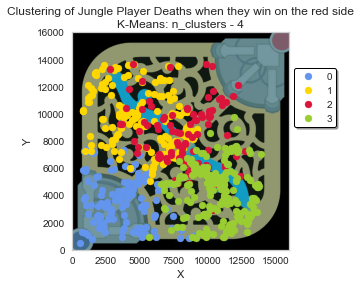

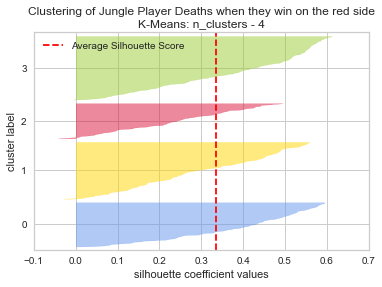

Silhouette score: 0.33498482453698963
3    188
1    168
0    131
2    104
Name: cluster, dtype: int64

Inertia: 686.5257712463966

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   3756.061069   3655.503817  27.043577
1        1   5222.529762   9493.476190  12.768921
2        2   8290.701923   8315.250000  28.793483
3        3  10644.547872   4179.212766  14.305170

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["cornflowerblue", "gold", "crimson", "yellowgreen"])
colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

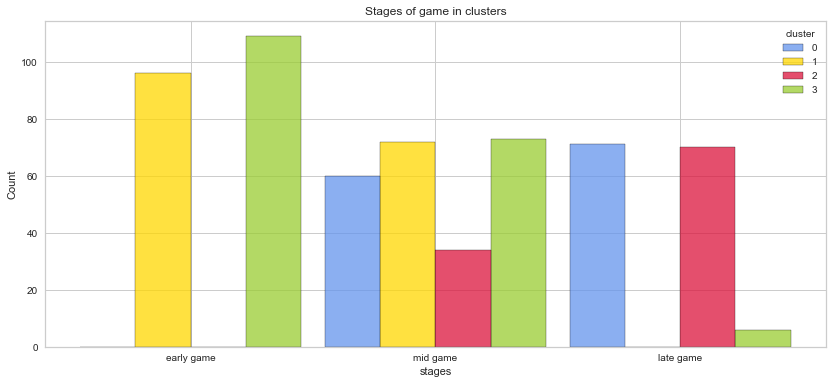

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

---
##### Clustering Red Team Defeat

In [ ]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team      summoner region champion  timestamp  \
372047  EUW1_6284317555  Red  anonymous 90   euw1    Amumu  12.141350   
372050  EUW1_6284317555  Red  anonymous 90   euw1    Amumu  14.361850   
372057  EUW1_6284317555  Red  anonymous 90   euw1    Amumu  16.785033   
372061  EUW1_6284317555  Red  anonymous 90   euw1    Amumu  18.858500   
372069  EUW1_6284317555  Red  anonymous 90   euw1    Amumu  22.271050   
...                 ...  ...           ...    ...      ...        ...   
634911  EUW1_6289869790  Red  anonymous 96   euw1   RekSai  17.717683   
634914  EUW1_6289869790  Red  anonymous 96   euw1   RekSai  19.854733   
634925  EUW1_6289869790  Red  anonymous 96   euw1   RekSai  25.795133   
634930  EUW1_6289869790  Red  anonymous 96   euw1   RekSai  28.544500   
634937  EUW1_6289869790  Red  anonymous 96   euw1   RekSai  31.493167   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
372047        3804.0       13366.0    NaN            NaN  ...   
372050       13161.0        4171.0    NaN            NaN  ...   
372057        8246.0        8589.0    NaN            NaN  ...   
372061        7632.0       13411.0    NaN            NaN  ...   
372069       12950.0       11298.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
634911       11808.0        1369.0    NaN            NaN  ...   
634914       10349.0        5300.0    NaN            NaN  ...   
634925        6004.0        7263.0    NaN            NaN  ...   
634930        8150.0        7954.0    NaN            NaN  ...   
634937       11732.0       11910.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
372047              NaN    False      Death        NaN           NaN   NaN   
372050              NaN    False      Death        NaN           NaN   NaN   
372057              NaN    False      Death        NaN           NaN   NaN   
372061              NaN    False      Death        NaN           NaN   NaN   
372069              NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
634911              NaN    False      Death        NaN           NaN   NaN   
634914              NaN    False      Death        NaN           NaN   NaN   
634925              NaN    False      Death        NaN           NaN   NaN   
634930              NaN    False      Death        NaN           NaN   NaN   
634937              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
372047      NaN       NaN  JUNGLE  Bronze  
372050      NaN       NaN  JUNGLE  Bronze  
372057      NaN       NaN  JUNGLE  Bronze  
372061      NaN       NaN  JUNGLE  Bronze  
372069      NaN       NaN  JUNGLE  Bronze  
...         ...       ...     ...     ...  
634911      NaN       NaN  JUNGLE  Bronze  
634914      NaN       NaN  JUNGLE  Bronze  
634925      NaN       NaN  JUNGLE  Bronze  
634930      NaN       NaN  JUNGLE  Bronze  
634937      NaN       NaN  JUNGLE  Bronze  

[899 rows x 56 columns]

In [ ]:
redSide_jungler_deaths_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red")]
winRateRedSide = (redSideDefeat_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

60.33557046979866

In [ ]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 106 played 11 matches
anonymous 106 has an average of 8.363636363636363 deaths per game

anonymous 114 played 10 matches
anonymous 114 has an average of 9.8 deaths per game

anonymous 115 played 14 matches
anonymous 115 has an average of 9.5 deaths per game

anonymous 118 played 5 matches
anonymous 118 has an average of 6.6 deaths per game

anonymous 90 played 11 matches
anonymous 90 has an average of 9.181818181818182 deaths per game

anonymous 93 played 15 matches
anonymous 93 has an average of 9.266666666666667 deaths per game

anonymous 94 played 12 matches
anonymous 94 has an average of 8.25 deaths per game

anonymous 96 played 20 matches
anonymous 96 has an average of 10.2 deaths per game



In [ ]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 98 matches in which the jungler died at least once
8 players died a total of 899 times on the red side
Defeat games on red side contains an average of 9.173469387755102 deaths per game


In [ ]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
372047        3804.0       13366.0  12.141350
372050       13161.0        4171.0  14.361850
372057        8246.0        8589.0  16.785033
372061        7632.0       13411.0  18.858500
372069       12950.0       11298.0  22.271050
...              ...           ...        ...
634911       11808.0        1369.0  17.717683
634914       10349.0        5300.0  19.854733
634925        6004.0        7263.0  25.795133
634930        8150.0        7954.0  28.544500
634937       11732.0       11910.0  31.493167

[899 rows x 3 columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSideDefeat_df)
data_scaled

array([[-1.41450881,  1.60337191, -0.79713274],
       [ 1.41722847, -1.09394967, -0.5681791 ],
       [-0.07021288,  0.20205541, -0.31832698],
       ...,
       [-0.74871614, -0.18692212,  0.61069584],
       [-0.09926565,  0.01578035,  0.89418042],
       [ 0.98476586,  1.17625932,  1.19821463]])

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.27960396378733354
Silhouette score for k=3: 0.3228282823212964
Silhouette score for k=4: 0.3467989832063505
Silhouette score for k=5: 0.30312452193940964
Silhouette score for k=6: 0.2993813989089354
Silhouette score for k=7: 0.29392921052173854
Silhouette score for k=8: 0.2921734725870177
Silhouette score for k=9: 0.2835096102434239
Silhouette score for k=10: 0.27209695665266337
Silhouette score for k=11: 0.2757834390872586
Silhouette score for k=12: 0.2688837685551241
Silhouette score for k=13: 0.2662168435616675
Silhouette score for k=14: 0.26888623016022845
Silhouette score for k=15: 0.2586124288189049
Silhouette score for k=16: 0.2581138869311123
Silhouette score for k=17: 0.2693914994761236
Silhouette score for k=18: 0.26161719640088965
Silhouette score for k=19: 0.2741120522411472
Silhouette score for k=20: 0.2588327025327396
Silhouette score for k=25: 0.27530566381007243


K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

K-Means with k = 3

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

K-Means with k = 4

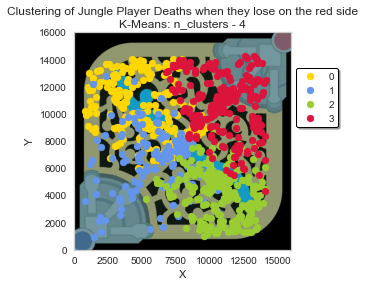

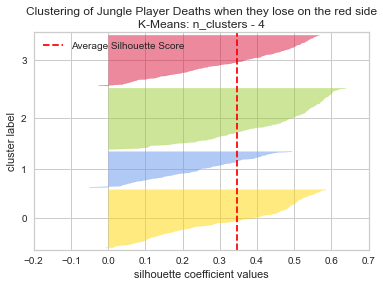

Silhouette score: 0.3467989832063505
2    267
0    255
3    221
1    156
Name: cluster, dtype: int64

Inertia: 1021.8647454641147

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5287.811765  10165.101961  12.972277
1        1   6285.185897   6469.769231  30.295544
2        2  10774.134831   4334.677903  13.996522
3        3  10932.819005  10604.257919  27.575145

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold","cornflowerblue", "yellowgreen", "crimson"])
colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", cluster_colors,"lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

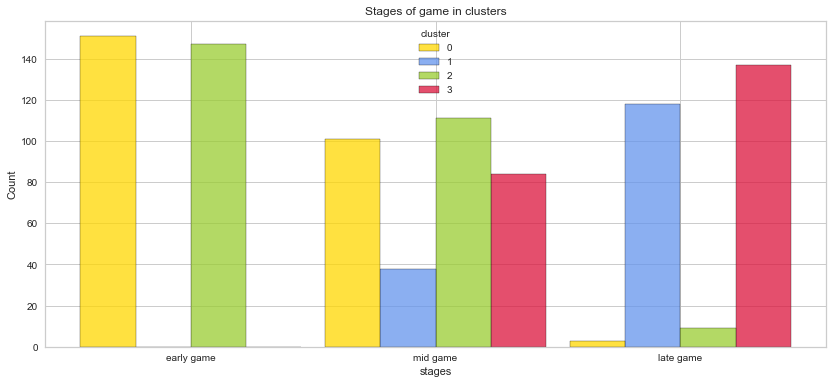

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

---
##### Clustering Blue Team Victory

In [89]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region champion  timestamp  \
372150  EUW1_6284009857  Blue   anonymous 90   euw1     Ekko   4.730233   
372298  EUW1_6283839433  Blue   anonymous 90   euw1     Ekko  24.178050   
372304  EUW1_6283839433  Blue   anonymous 90   euw1     Ekko  26.720333   
372486  EUW1_6281849341  Blue   anonymous 90   euw1  Warwick   5.276000   
372513  EUW1_6281849341  Blue   anonymous 90   euw1  Warwick  17.927250   
...                 ...   ...            ...    ...      ...        ...   
635096  EUW1_6289546912  Blue   anonymous 96   euw1   Lillia  10.174250   
635120  EUW1_6289546912  Blue   anonymous 96   euw1   Lillia  20.091150   
635132  EUW1_6289546912  Blue   anonymous 96   euw1   Lillia  24.333783   
636854  EUW1_6289726244  Blue  anonymous 106   euw1     Nunu  27.150767   
637016  EUW1_6289551233  Blue  anonymous 106   euw1     Nunu  24.825167   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
372150        6473.0       11304.0    NaN            NaN  ...   
372298        9661.0       12131.0    NaN            NaN  ...   
372304       13232.0       11589.0    NaN            NaN  ...   
372486        5001.0       12338.0    NaN            NaN  ...   
372513        8871.0        8407.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
635096        7659.0        8198.0    NaN            NaN  ...   
635120       11563.0        9754.0    NaN            NaN  ...   
635132       12626.0       10566.0    NaN            NaN  ...   
636854       11951.0        7218.0    NaN            NaN  ...   
637016        9593.0        9763.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
372150              NaN     True      Death        NaN           NaN   NaN   
372298              NaN     True      Death        NaN           NaN   NaN   
372304              NaN     True      Death        NaN           NaN   NaN   
372486              NaN     True      Death        NaN           NaN   NaN   
372513              NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
635096              NaN     True      Death        NaN           NaN   NaN   
635120              NaN     True      Death        NaN           NaN   NaN   
635132              NaN     True      Death        NaN           NaN   NaN   
636854              NaN     True      Death        NaN           NaN   NaN   
637016              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
372150      NaN       NaN  JUNGLE  Bronze  
372298      NaN       NaN  JUNGLE  Bronze  
372304      NaN       NaN  JUNGLE  Bronze  
372486      NaN       NaN  JUNGLE  Bronze  
372513      NaN       NaN  JUNGLE  Bronze  
...         ...       ...     ...     ...  
635096      NaN       NaN  JUNGLE  Bronze  
635120      NaN       NaN  JUNGLE  Bronze  
635132      NaN       NaN  JUNGLE  Bronze  
636854      NaN       NaN  JUNGLE  Bronze  
637016      NaN       NaN  JUNGLE  Bronze  

[482 rows x 56 columns]

In [90]:
blueSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [91]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

104

In [92]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

48.82629107981221

In [ ]:
blueSide_jungler_deaths_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue")]
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

33.943661971830984

In [ ]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 106 played 17 matches
anonymous 106 has an average of 3.7058823529411766 deaths per game

anonymous 114 played 10 matches
anonymous 114 has an average of 4.2 deaths per game

anonymous 115 played 16 matches
anonymous 115 has an average of 3.8125 deaths per game

anonymous 118 played 7 matches
anonymous 118 has an average of 5.0 deaths per game

anonymous 90 played 10 matches
anonymous 90 has an average of 4.1 deaths per game

anonymous 93 played 20 matches
anonymous 93 has an average of 5.9 deaths per game

anonymous 94 played 7 matches
anonymous 94 has an average of 5.571428571428571 deaths per game

anonymous 96 played 17 matches
anonymous 96 has an average of 4.882352941176471 deaths per game



In [ ]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 104 matches in which the jungler died at least once
8 players died a total of 482 times on the blue side
Victory games on blue side contains an average of 4.634615384615385 deaths per game


In [ ]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
372150        6473.0       11304.0   4.730233
372298        9661.0       12131.0  24.178050
372304       13232.0       11589.0  26.720333
372486        5001.0       12338.0   5.276000
372513        8871.0        8407.0  17.927250
...              ...           ...        ...
635096        7659.0        8198.0  10.174250
635120       11563.0        9754.0  20.091150
635132       12626.0       10566.0  24.333783
636854       11951.0        7218.0  27.150767
637016        9593.0        9763.0  24.825167

[482 rows x 3 columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSideVictory_df)
data_scaled

array([[-0.59258513,  0.95275466, -1.50698921],
       [ 0.37065586,  1.20781744,  0.55485922],
       [ 1.44961872,  1.04065417,  0.82439091],
       ...,
       [ 1.26651833,  0.72514119,  0.57136999],
       [ 1.06256987, -0.30744672,  0.87002525],
       [ 0.35010994,  0.47748047,  0.62346623]])

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.27946484921383796
Silhouette score for k=3: 0.3314188448801634
Silhouette score for k=4: 0.3069194417727901
Silhouette score for k=5: 0.2934893226812176
Silhouette score for k=6: 0.31346150199375833
Silhouette score for k=7: 0.2940156722240416
Silhouette score for k=8: 0.2842841242409592
Silhouette score for k=9: 0.2681146376810711
Silhouette score for k=10: 0.27145784127007383
Silhouette score for k=11: 0.2612350926294865
Silhouette score for k=12: 0.26279877627180276
Silhouette score for k=13: 0.2578604457851388
Silhouette score for k=14: 0.2549943765075749
Silhouette score for k=15: 0.2644304944322418
Silhouette score for k=16: 0.26299542571850754
Silhouette score for k=17: 0.2622288170847541
Silhouette score for k=18: 0.2594788986188427
Silhouette score for k=19: 0.2708689169698453
Silhouette score for k=20: 0.25960750561685814
Silhouette score for k=25: 0.26352010380215873


K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

K-Means with k = 3

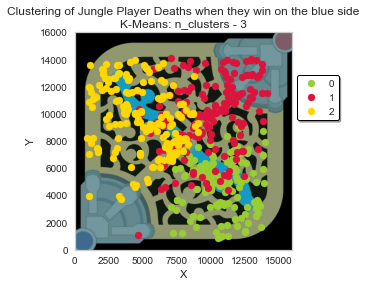

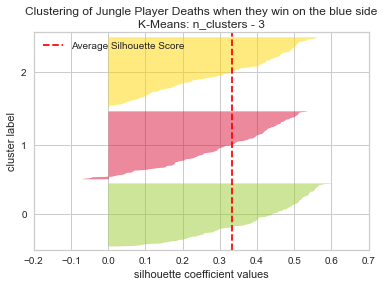

Silhouette score: 0.3314188448801634
2    168
1    163
0    151
Name: cluster, dtype: int64

Inertia: 672.5162443455861

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10745.834437   4858.947020  14.612581
1        1   9834.282209   9874.705521  28.495833
2        2   4998.226190   9620.702381  13.570984

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "crimson", "gold"])
colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

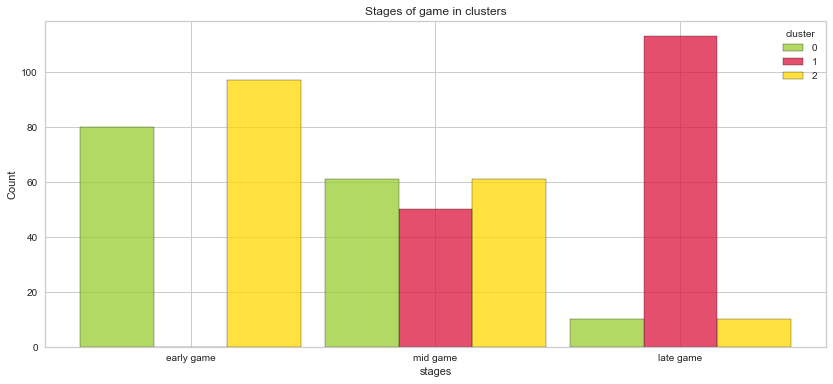

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

K-Means with k = 6

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

---
##### Clustering Blue Team Defeat

In [ ]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region champion  timestamp  \
372114  EUW1_6284036967  Blue   anonymous 90   euw1     Ekko  15.944050   
372122  EUW1_6284036967  Blue   anonymous 90   euw1     Ekko  20.620883   
372129  EUW1_6284036967  Blue   anonymous 90   euw1     Ekko  24.480483   
372137  EUW1_6284036967  Blue   anonymous 90   euw1     Ekko  28.875567   
373168  EUW1_6280755634  Blue   anonymous 90   euw1   LeeSin   9.254633   
...                 ...   ...            ...    ...      ...        ...   
636723  EUW1_6289840126  Blue  anonymous 106   euw1     Nunu  30.352950   
636905  EUW1_6289671897  Blue  anonymous 106   euw1  Warwick  17.572117   
636910  EUW1_6289671897  Blue  anonymous 106   euw1  Warwick  20.275300   
636914  EUW1_6289671897  Blue  anonymous 106   euw1  Warwick  22.275017   
636918  EUW1_6289671897  Blue  anonymous 106   euw1  Warwick  25.318117   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
372114        4630.0        9924.0    NaN            NaN  ...   
372122        3116.0        9071.0    NaN            NaN  ...   
372129        9663.0        4137.0    NaN            NaN  ...   
372137        4688.0        5044.0    NaN            NaN  ...   
373168        7933.0        7936.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
636723        2704.0        1497.0    NaN            NaN  ...   
636905       10905.0        3597.0    NaN            NaN  ...   
636910        1157.0        7303.0    NaN            NaN  ...   
636914        3669.0        6431.0    NaN            NaN  ...   
636918        2012.0        3986.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
372114              NaN    False      Death        NaN           NaN   NaN   
372122              NaN    False      Death        NaN           NaN   NaN   
372129              NaN    False      Death        NaN           NaN   NaN   
372137              NaN    False      Death        NaN           NaN   NaN   
373168              NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
636723              NaN    False      Death        NaN           NaN   NaN   
636905              NaN    False      Death        NaN           NaN   NaN   
636910              NaN    False      Death        NaN           NaN   NaN   
636914              NaN    False      Death        NaN           NaN   NaN   
636918              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
372114      NaN       NaN  JUNGLE  Bronze  
372122      NaN       NaN  JUNGLE  Bronze  
372129      NaN       NaN  JUNGLE  Bronze  
372137      NaN       NaN  JUNGLE  Bronze  
373168      NaN       NaN  JUNGLE  Bronze  
...         ...       ...     ...     ...  
636723      NaN       NaN  JUNGLE  Bronze  
636905      NaN       NaN  JUNGLE  Bronze  
636910      NaN       NaN  JUNGLE  Bronze  
636914      NaN       NaN  JUNGLE  Bronze  
636918      NaN       NaN  JUNGLE  Bronze  

[938 rows x 56 columns]

In [ ]:
blueSide_jungler_deaths_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue")]
winRateBlueSide = (blueSideDefeat_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

66.05633802816901

In [ ]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 106 played 22 matches
anonymous 106 has an average of 7.5 deaths per game

anonymous 114 played 8 matches
anonymous 114 has an average of 9.625 deaths per game

anonymous 115 played 12 matches
anonymous 115 has an average of 9.833333333333334 deaths per game

anonymous 118 played 6 matches
anonymous 118 has an average of 8.5 deaths per game

anonymous 90 played 14 matches
anonymous 90 has an average of 6.428571428571429 deaths per game

anonymous 93 played 14 matches
anonymous 93 has an average of 8.785714285714286 deaths per game

anonymous 94 played 10 matches
anonymous 94 has an average of 9.2 deaths per game

anonymous 96 played 23 matches
anonymous 96 has an average of 9.652173913043478 deaths per game



In [ ]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 109 matches in which the jungler died at least once
8 players died a total of 938 times on the blue side
Defeat games on blue side contains an average of 8.605504587155963 deaths per game


In [ ]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
372114        4630.0        9924.0  15.944050
372122        3116.0        9071.0  20.620883
372129        9663.0        4137.0  24.480483
372137        4688.0        5044.0  28.875567
373168        7933.0        7936.0   9.254633
...              ...           ...        ...
636723        2704.0        1497.0  30.352950
636905       10905.0        3597.0  17.572117
636910        1157.0        7303.0  20.275300
636914        3669.0        6431.0  22.275017
636918        2012.0        3986.0  25.318117

[938 rows x 3 columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSideDefeat_df)
data_scaled

array([[-0.66587676,  1.21592906, -0.44325   ],
       [-1.10730893,  0.94220044,  0.03803464],
       [ 0.80157905, -0.64112545,  0.43521926],
       ...,
       [-1.67848834,  0.37484735,  0.00247127],
       [-0.94607248,  0.09502161,  0.20825858],
       [-1.42919871, -0.68958151,  0.52141862]])

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.28409083672967894
Silhouette score for k=3: 0.3261017483225959
Silhouette score for k=4: 0.3278814820159492
Silhouette score for k=5: 0.2836278171142574
Silhouette score for k=6: 0.2924200922796071
Silhouette score for k=7: 0.2729856740305453
Silhouette score for k=8: 0.28719793222018586
Silhouette score for k=9: 0.27807513839092135
Silhouette score for k=10: 0.2763835849096501
Silhouette score for k=11: 0.28291135363979636
Silhouette score for k=12: 0.27633870308270125
Silhouette score for k=13: 0.2833923721521464
Silhouette score for k=14: 0.279455970544484
Silhouette score for k=15: 0.26600800865478924
Silhouette score for k=16: 0.27607151797620205
Silhouette score for k=17: 0.2825641120027249
Silhouette score for k=18: 0.27851621780912483
Silhouette score for k=19: 0.2730246088485571
Silhouette score for k=20: 0.2771412584746846
Silhouette score for k=25: 0.2734089213450416


K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

K-Means with k = 3

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

K-Means with k = 3

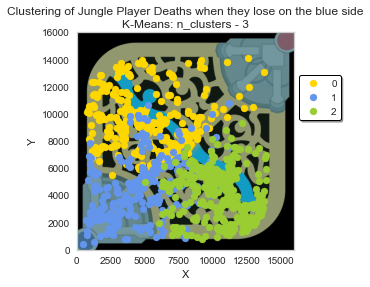

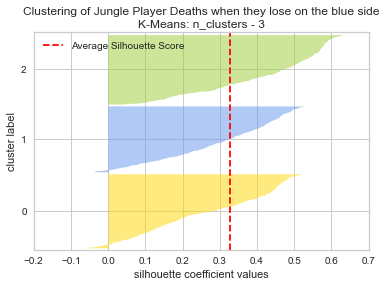

Silhouette score: 0.3261017483225959
0    332
2    311
1    295
Name: cluster, dtype: int64

Inertia: 1352.6939421258712

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5202.656627   9371.753012  16.884724
1        1   5190.898305   4569.538983  29.879871
2        2  10374.713826   4164.282958  14.711947

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "cornflowerblue", "yellowgreen"])
colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", cluster_colors,"lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

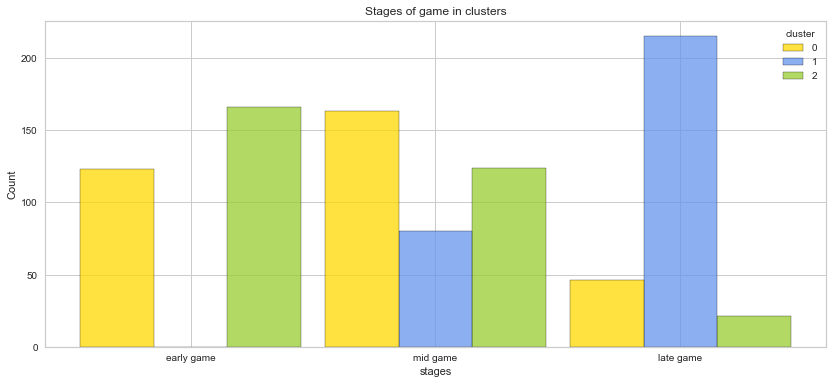

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

---
##### Red Side Win Rate vs Blue Side Win Rate

In [ ]:
wins_df = jungler_deaths_df[(jungler_deaths_df["victory"] == True)]

b = (blueSideVictory_df.shape[0]/ wins_df.shape[0]) * 100
r = (redSideVictory_df.shape[0]/ wins_df.shape[0]) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 55.07921714818267 vs Blue: 44.920782851817336


#### | Division - Silver |

**Red Side**

In [ ]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

In [ ]:
print("This Dataset contains an average of {} deaths per game".format((jungler_deaths_df.shape[0]/len(np.unique(jungler_deaths_df["gameId"])))))

In [ ]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

gameId team       summoner region champion  timestamp  \
17265   EUW1_6280166048  Red  anonymous 141   euw1    Amumu   9.028450   
17270   EUW1_6280166048  Red  anonymous 141   euw1    Amumu  11.092467   
17279   EUW1_6280166048  Red  anonymous 141   euw1    Amumu  15.345767   
17282   EUW1_6280166048  Red  anonymous 141   euw1    Amumu  16.801517   
17288   EUW1_6280166048  Red  anonymous 141   euw1    Amumu  18.162467   
...                 ...  ...            ...    ...      ...        ...   
632258  EUW1_6287909210  Red   anonymous 81   euw1     Ekko  26.688667   
632262  EUW1_6287909210  Red   anonymous 81   euw1     Ekko  28.164217   
632267  EUW1_6287909210  Red   anonymous 81   euw1     Ekko  30.177883   
632278  EUW1_6287909210  Red   anonymous 81   euw1     Ekko  35.232717   
632285  EUW1_6287909210  Red   anonymous 81   euw1     Ekko  37.092050   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
17265         6654.0        4771.0    NaN            NaN  ...   
17270         2268.0        9910.0    NaN            NaN  ...   
17279         3558.0       10579.0    NaN            NaN  ...   
17282         4941.0        4742.0    NaN            NaN  ...   
17288         8189.0        5163.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
632258        4051.0        2230.0    NaN            NaN  ...   
632262        9910.0        5887.0    NaN            NaN  ...   
632267        4817.0        9158.0    NaN            NaN  ...   
632278        3441.0        2548.0    NaN            NaN  ...   
632285        1876.0        7577.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
17265               NaN     True      Death        NaN           NaN   NaN   
17270               NaN     True      Death        NaN           NaN   NaN   
17279               NaN     True      Death        NaN           NaN   NaN   
17282               NaN     True      Death        NaN           NaN   NaN   
17288               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
632258              NaN     True      Death        NaN           NaN   NaN   
632262              NaN     True      Death        NaN           NaN   NaN   
632267              NaN     True      Death        NaN           NaN   NaN   
632278              NaN     True      Death        NaN           NaN   NaN   
632285              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
17265       NaN       NaN  JUNGLE  Silver  
17270       NaN       NaN  JUNGLE  Silver  
17279       NaN       NaN  JUNGLE  Silver  
17282       NaN       NaN  JUNGLE  Silver  
17288       NaN       NaN  JUNGLE  Silver  
...         ...       ...     ...     ...  
632258      NaN       NaN  JUNGLE  Silver  
632262      NaN       NaN  JUNGLE  Silver  
632267      NaN       NaN  JUNGLE  Silver  
632278      NaN       NaN  JUNGLE  Silver  
632285      NaN       NaN  JUNGLE  Silver  

[1764 rows x 56 columns]

In [ ]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

In [ ]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

---

##### Average game time

In [ ]:
temp_df = df[(df["eventType"].isna()) & (df["rank"] == "Silver")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Silver matches have an average time of {}".format(np.mean(match_time)))

Silver matches have an average time of 30.556702067369095


In [ ]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Red") & (df["victory"] == True) & (df["rank"] == "Silver")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Silver matches have an average time of {} when they win on the red side".format(np.mean(match_time)))

Silver matches have an average time of 30.830718427443834 when they win on the red side


In [ ]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Red") & (df["victory"] == False) & (df["rank"] == "Silver")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Silver matches have an average time of {} when they lose on the red side".format(np.mean(match_time)))

Silver matches have an average time of 30.773133933333334 when they lose on the red side


In [ ]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Blue") & (df["victory"] == True) & (df["rank"] == "Silver")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Silver matches have an average time of {} when they win on the blue side".format(np.mean(match_time)))

Silver matches have an average time of 29.98758154027043 when they win on the blue side


In [ ]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Blue") & (df["victory"] == False) & (df["rank"] == "Silver")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Silver matches have an average time of {} when they lose on the blue side".format(np.mean(match_time)))

Silver matches have an average time of 30.734243929824558 when they lose on the blue side


---
##### Clustering Red Team Victory

In [93]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region champion  timestamp  \
17265   EUW1_6280166048  Red  anonymous 141   euw1    Amumu   9.028450   
17270   EUW1_6280166048  Red  anonymous 141   euw1    Amumu  11.092467   
17279   EUW1_6280166048  Red  anonymous 141   euw1    Amumu  15.345767   
17282   EUW1_6280166048  Red  anonymous 141   euw1    Amumu  16.801517   
17288   EUW1_6280166048  Red  anonymous 141   euw1    Amumu  18.162467   
...                 ...  ...            ...    ...      ...        ...   
632258  EUW1_6287909210  Red   anonymous 81   euw1     Ekko  26.688667   
632262  EUW1_6287909210  Red   anonymous 81   euw1     Ekko  28.164217   
632267  EUW1_6287909210  Red   anonymous 81   euw1     Ekko  30.177883   
632278  EUW1_6287909210  Red   anonymous 81   euw1     Ekko  35.232717   
632285  EUW1_6287909210  Red   anonymous 81   euw1     Ekko  37.092050   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
17265         6654.0        4771.0    NaN            NaN  ...   
17270         2268.0        9910.0    NaN            NaN  ...   
17279         3558.0       10579.0    NaN            NaN  ...   
17282         4941.0        4742.0    NaN            NaN  ...   
17288         8189.0        5163.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
632258        4051.0        2230.0    NaN            NaN  ...   
632262        9910.0        5887.0    NaN            NaN  ...   
632267        4817.0        9158.0    NaN            NaN  ...   
632278        3441.0        2548.0    NaN            NaN  ...   
632285        1876.0        7577.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
17265               NaN     True      Death        NaN           NaN   NaN   
17270               NaN     True      Death        NaN           NaN   NaN   
17279               NaN     True      Death        NaN           NaN   NaN   
17282               NaN     True      Death        NaN           NaN   NaN   
17288               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
632258              NaN     True      Death        NaN           NaN   NaN   
632262              NaN     True      Death        NaN           NaN   NaN   
632267              NaN     True      Death        NaN           NaN   NaN   
632278              NaN     True      Death        NaN           NaN   NaN   
632285              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
17265       NaN       NaN  JUNGLE  Silver  
17270       NaN       NaN  JUNGLE  Silver  
17279       NaN       NaN  JUNGLE  Silver  
17282       NaN       NaN  JUNGLE  Silver  
17288       NaN       NaN  JUNGLE  Silver  
...         ...       ...     ...     ...  
632258      NaN       NaN  JUNGLE  Silver  
632262      NaN       NaN  JUNGLE  Silver  
632267      NaN       NaN  JUNGLE  Silver  
632278      NaN       NaN  JUNGLE  Silver  
632285      NaN       NaN  JUNGLE  Silver  

[674 rows x 56 columns]

In [94]:
redSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [95]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

122

In [96]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

48.41269841269841

In [ ]:
redSide_jungler_deaths_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red")]
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

38.208616780045354

In [ ]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 141 played 4 matches
anonymous 141 has an average of 3.25 deaths per game

anonymous 65 played 8 matches
anonymous 65 has an average of 4.875 deaths per game

anonymous 66 played 34 matches
anonymous 66 has an average of 5.205882352941177 deaths per game

anonymous 68 played 9 matches
anonymous 68 has an average of 8.88888888888889 deaths per game

anonymous 71 played 11 matches
anonymous 71 has an average of 6.545454545454546 deaths per game

anonymous 78 played 14 matches
anonymous 78 has an average of 2.857142857142857 deaths per game

anonymous 79 played 17 matches
anonymous 79 has an average of 5.0588235294117645 deaths per game

anonymous 81 played 25 matches
anonymous 81 has an average of 6.68 deaths per game



In [ ]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 122 matches in which the jungler died at least once
8 players died a total of 674 times on the red side
Victory games on red side contains an average of 5.524590163934426 deaths per game


In [ ]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
17265         6654.0        4771.0   9.028450
17270         2268.0        9910.0  11.092467
17279         3558.0       10579.0  15.345767
17282         4941.0        4742.0  16.801517
17288         8189.0        5163.0  18.162467
...              ...           ...        ...
632258        4051.0        2230.0  26.688667
632262        9910.0        5887.0  28.164217
632267        4817.0        9158.0  30.177883
632278        3441.0        2548.0  35.232717
632285        1876.0        7577.0  37.092050

[674 rows x 3 columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSideVictory_df)
data_scaled

array([[-0.03003858, -0.37505645, -1.06759624],
       [-1.28514753,  1.1707562 , -0.84508763],
       [-0.91599784,  1.37199159, -0.38656621],
       ...,
       [-0.55571918,  0.94455439,  1.21239064],
       [-0.94947885, -1.04373547,  1.7573203 ],
       [-1.39732325,  0.46898914,  1.95776329]])

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.3034317185328158
Silhouette score for k=3: 0.33526606982872054
Silhouette score for k=4: 0.33469344776979537
Silhouette score for k=5: 0.2994258406725901
Silhouette score for k=6: 0.29654726286543936
Silhouette score for k=7: 0.2940460258226836
Silhouette score for k=8: 0.2958305203865991
Silhouette score for k=9: 0.2854540819634054
Silhouette score for k=10: 0.28609166127628827
Silhouette score for k=11: 0.2858114382611416
Silhouette score for k=12: 0.2816181583370125
Silhouette score for k=13: 0.28758920604861843
Silhouette score for k=14: 0.2849600309712809
Silhouette score for k=15: 0.27614265024864265
Silhouette score for k=16: 0.2783573737605317
Silhouette score for k=17: 0.2788006829177834
Silhouette score for k=18: 0.2778062986803526
Silhouette score for k=19: 0.2802442441931649
Silhouette score for k=20: 0.26096234840173516
Silhouette score for k=25: 0.2650062357435491


K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

K-Means with k = 3

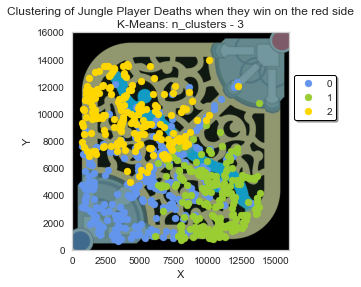

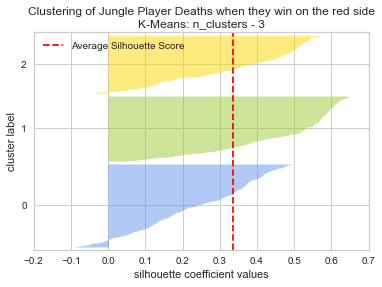

Silhouette score: 0.33526606982872054
0    272
1    213
2    189
Name: cluster, dtype: int64

Inertia: 926.2587888276603

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5684.069853   5076.878676  27.501550
1        1  10342.215962   3876.230047  11.916867
2        2   4267.656085   9785.666667  14.503625

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["cornflowerblue", "yellowgreen", "gold"])
colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

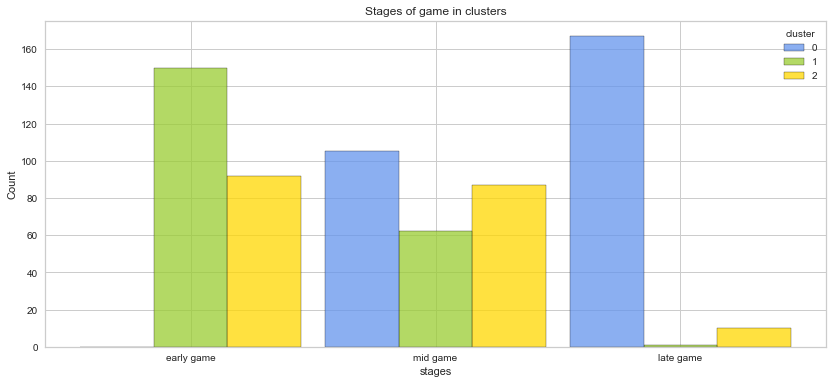

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

K-Means with k = 6

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

---
##### Clustering Red Team Defeat

In [ ]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region champion  timestamp  \
17312   EUW1_6279782575  Red  anonymous 141   euw1  Shyvana   3.053800   
17323   EUW1_6279782575  Red  anonymous 141   euw1  Shyvana   9.616850   
17332   EUW1_6279782575  Red  anonymous 141   euw1  Shyvana  13.659550   
17336   EUW1_6279782575  Red  anonymous 141   euw1  Shyvana  15.899617   
17340   EUW1_6279782575  Red  anonymous 141   euw1  Shyvana  17.321967   
...                 ...  ...            ...    ...      ...        ...   
632086  EUW1_6289561195  Red   anonymous 79   euw1  Belveth  15.910633   
632092  EUW1_6289561195  Red   anonymous 79   euw1  Belveth  18.105183   
632097  EUW1_6289561195  Red   anonymous 79   euw1  Belveth  20.550417   
632110  EUW1_6289561195  Red   anonymous 79   euw1  Belveth  27.118767   
632114  EUW1_6289561195  Red   anonymous 79   euw1  Belveth  29.811150   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
17312        13182.0        8236.0    NaN            NaN  ...   
17323         8815.0        8261.0    NaN            NaN  ...   
17332        11903.0        1658.0    NaN            NaN  ...   
17336         1149.0       13290.0    NaN            NaN  ...   
17340         8327.0       10101.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
632086        6348.0       10070.0    NaN            NaN  ...   
632092        3845.0       13872.0    NaN            NaN  ...   
632097        7344.0        7952.0    NaN            NaN  ...   
632110        8896.0        8960.0    NaN            NaN  ...   
632114        9350.0       13352.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
17312               NaN    False      Death        NaN           NaN   NaN   
17323               NaN    False      Death        NaN           NaN   NaN   
17332               NaN    False      Death        NaN           NaN   NaN   
17336               NaN    False      Death        NaN           NaN   NaN   
17340               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
632086              NaN    False      Death        NaN           NaN   NaN   
632092              NaN    False      Death        NaN           NaN   NaN   
632097              NaN    False      Death        NaN           NaN   NaN   
632110              NaN    False      Death        NaN           NaN   NaN   
632114              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
17312       NaN       NaN  JUNGLE  Silver  
17323       NaN       NaN  JUNGLE  Silver  
17332       NaN       NaN  JUNGLE  Silver  
17336       NaN       NaN  JUNGLE  Silver  
17340       NaN       NaN  JUNGLE  Silver  
...         ...       ...     ...     ...  
632086      NaN       NaN  JUNGLE  Silver  
632092      NaN       NaN  JUNGLE  Silver  
632097      NaN       NaN  JUNGLE  Silver  
632110      NaN       NaN  JUNGLE  Silver  
632114      NaN       NaN  JUNGLE  Silver  

[1090 rows x 56 columns]

In [ ]:
redSide_jungler_deaths_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red")]
winRateRedSide = (redSideDefeat_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

61.791383219954646

In [ ]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 141 played 9 matches
anonymous 141 has an average of 6.333333333333333 deaths per game

anonymous 65 played 11 matches
anonymous 65 has an average of 8.181818181818182 deaths per game

anonymous 66 played 23 matches
anonymous 66 has an average of 8.869565217391305 deaths per game

anonymous 68 played 12 matches
anonymous 68 has an average of 9.916666666666666 deaths per game

anonymous 71 played 10 matches
anonymous 71 has an average of 11.0 deaths per game

anonymous 78 played 13 matches
anonymous 78 has an average of 5.769230769230769 deaths per game

anonymous 79 played 26 matches
anonymous 79 has an average of 8.73076923076923 deaths per game

anonymous 81 played 26 matches
anonymous 81 has an average of 8.0 deaths per game



In [ ]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 130 matches in which the jungler died at least once
8 players died a total of 1090 times on the red side
Defeat games on red side contains an average of 8.384615384615385 deaths per game


In [ ]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
17312        13182.0        8236.0   3.053800
17323         8815.0        8261.0   9.616850
17332        11903.0        1658.0  13.659550
17336         1149.0       13290.0  15.899617
17340         8327.0       10101.0  17.321967
...              ...           ...        ...
632086        6348.0       10070.0  15.910633
632092        3845.0       13872.0  18.105183
632097        7344.0        7952.0  20.550417
632110        8896.0        8960.0  27.118767
632114        9350.0       13352.0  29.811150

[1090 rows x 3 columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSideDefeat_df)
data_scaled

array([[ 1.41154206,  0.1401087 , -1.77685028],
       [ 0.1716127 ,  0.14723603, -1.06767724],
       [ 1.04839353, -1.73523485, -0.63084165],
       ...,
       [-0.24605071,  0.05914221,  0.11375376],
       [ 0.19461116,  0.34651623,  0.82349949],
       [ 0.32351611,  1.59864588,  1.11442607]])

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.3001833488211223
Silhouette score for k=3: 0.3110849118491411
Silhouette score for k=4: 0.312345819013431
Silhouette score for k=5: 0.2959161861132597
Silhouette score for k=6: 0.30027469317649
Silhouette score for k=7: 0.3057837393499679
Silhouette score for k=8: 0.2935388929999877
Silhouette score for k=9: 0.2831679645983843
Silhouette score for k=10: 0.2815369977579883
Silhouette score for k=11: 0.2727052229665723
Silhouette score for k=12: 0.2866834621612317
Silhouette score for k=13: 0.2731528120716369
Silhouette score for k=14: 0.27511541105076626
Silhouette score for k=15: 0.27569276656279623
Silhouette score for k=16: 0.2648879526607642
Silhouette score for k=17: 0.26383627436267193
Silhouette score for k=18: 0.2655369887158519
Silhouette score for k=19: 0.2628887119789874
Silhouette score for k=20: 0.2657612443839668
Silhouette score for k=25: 0.2750930536178775


K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

K-Means with k = 3

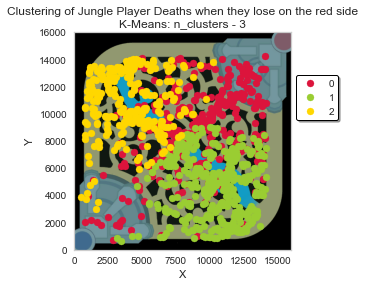

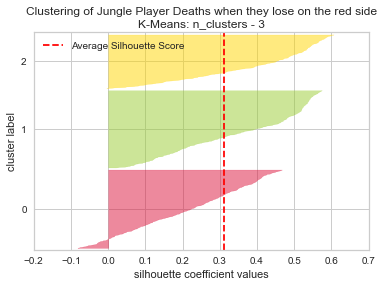

Silhouette score: 0.3110849118491411
0    408
1    402
2    280
Name: cluster, dtype: int64

Inertia: 1592.983629905347

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   8998.323529   8745.909314  28.329084
1        1  10288.776119   4679.850746  14.433689
2        2   4079.046429  10685.464286  13.899511

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "yellowgreen", "gold"])
colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", cluster_colors,"lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

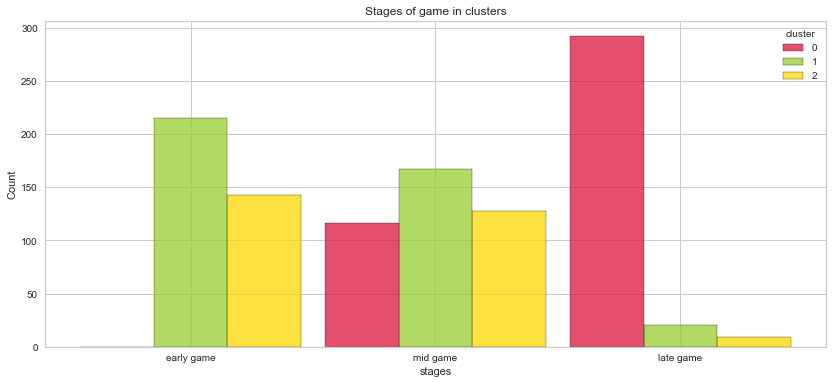

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

K-Means with k = 6

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

---
##### Clustering Blue Team Victory

In [97]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region champion  timestamp  \
17140   EUW1_6280261762  Blue  anonymous 141   euw1  Shyvana   5.604333   
17153   EUW1_6280261762  Blue  anonymous 141   euw1  Shyvana  11.015033   
17157   EUW1_6280261762  Blue  anonymous 141   euw1  Shyvana  13.092017   
17178   EUW1_6280261762  Blue  anonymous 141   euw1  Shyvana  22.101300   
17625   EUW1_6275084199  Blue  anonymous 141   euw1  Shyvana  13.379250   
...                 ...   ...            ...    ...      ...        ...   
630833  EUW1_6289887205  Blue   anonymous 71   euw1      Jax  34.197283   
630846  EUW1_6289887205  Blue   anonymous 71   euw1      Jax  38.437517   
632137  EUW1_6289489188  Blue   anonymous 79   euw1  Belveth   9.007050   
632161  EUW1_6289489188  Blue   anonymous 79   euw1  Belveth  18.388700   
632188  EUW1_6289489188  Blue   anonymous 79   euw1  Belveth  29.772700   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
17140        11773.0        1720.0    NaN            NaN  ...   
17153        13185.0        3861.0    NaN            NaN  ...   
17157        13342.0        7349.0    NaN            NaN  ...   
17178         7256.0        3824.0    NaN            NaN  ...   
17625         9309.0        4605.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
630833       13980.0        8634.0    NaN            NaN  ...   
630846       12167.0       12853.0    NaN            NaN  ...   
632137        2734.0        9871.0    NaN            NaN  ...   
632161       10202.0        5114.0    NaN            NaN  ...   
632188       12041.0        4946.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
17140               NaN     True      Death        NaN           NaN   NaN   
17153               NaN     True      Death        NaN           NaN   NaN   
17157               NaN     True      Death        NaN           NaN   NaN   
17178               NaN     True      Death        NaN           NaN   NaN   
17625               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
630833              NaN     True      Death        NaN           NaN   NaN   
630846              NaN     True      Death        NaN           NaN   NaN   
632137              NaN     True      Death        NaN           NaN   NaN   
632161              NaN     True      Death        NaN           NaN   NaN   
632188              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
17140       NaN       NaN  JUNGLE  Silver  
17153       NaN       NaN  JUNGLE  Silver  
17157       NaN       NaN  JUNGLE  Silver  
17178       NaN       NaN  JUNGLE  Silver  
17625       NaN       NaN  JUNGLE  Silver  
...         ...       ...     ...     ...  
630833      NaN       NaN  JUNGLE  Silver  
630846      NaN       NaN  JUNGLE  Silver  
632137      NaN       NaN  JUNGLE  Silver  
632161      NaN       NaN  JUNGLE  Silver  
632188      NaN       NaN  JUNGLE  Silver  

[659 rows x 56 columns]

In [98]:
blueSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [99]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

124

In [100]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

52.76595744680851

In [ ]:
blueSide_jungler_deaths_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue")]
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

42.0280612244898

In [ ]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 141 played 5 matches
anonymous 141 has an average of 3.4 deaths per game

anonymous 65 played 15 matches
anonymous 65 has an average of 5.666666666666667 deaths per game

anonymous 66 played 24 matches
anonymous 66 has an average of 5.875 deaths per game

anonymous 68 played 16 matches
anonymous 68 has an average of 5.3125 deaths per game

anonymous 71 played 12 matches
anonymous 71 has an average of 6.5 deaths per game

anonymous 78 played 20 matches
anonymous 78 has an average of 3.45 deaths per game

anonymous 79 played 12 matches
anonymous 79 has an average of 5.583333333333333 deaths per game

anonymous 81 played 20 matches
anonymous 81 has an average of 5.85 deaths per game



In [ ]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 124 matches in which the jungler died at least once
8 players died a total of 659 times on the blue side
Victory games on blue side contains an average of 5.314516129032258 deaths per game


In [ ]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
17140        11773.0        1720.0   5.604333
17153        13185.0        3861.0  11.015033
17157        13342.0        7349.0  13.092017
17178         7256.0        3824.0  22.101300
17625         9309.0        4605.0  13.379250
...              ...           ...        ...
630833       13980.0        8634.0  34.197283
630846       12167.0       12853.0  38.437517
632137        2734.0        9871.0   9.007050
632161       10202.0        5114.0  18.388700
632188       12041.0        4946.0  29.772700

[659 rows x 3 columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSideVictory_df)
data_scaled

array([[ 0.81253232, -1.8246259 , -1.37289097],
       [ 1.21057944, -1.20047613, -0.80765187],
       [ 1.25483822, -0.18364549, -0.59067585],
       ...,
       [-1.73558946,  0.55157437, -1.01741968],
       [ 0.36966261, -0.83519838, -0.03734772],
       [ 0.88808234, -0.88417417,  1.15190355]])

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.2947777275022611
Silhouette score for k=3: 0.3447730187639534
Silhouette score for k=4: 0.31926160933333886
Silhouette score for k=5: 0.3035496197209915
Silhouette score for k=6: 0.31080508119702593
Silhouette score for k=7: 0.2985253991726685
Silhouette score for k=8: 0.28488557130075826
Silhouette score for k=9: 0.2845542029736685
Silhouette score for k=10: 0.2716848378571997
Silhouette score for k=11: 0.2718152835065219
Silhouette score for k=12: 0.2787926015296998
Silhouette score for k=13: 0.2693798049114973
Silhouette score for k=14: 0.27752926691835067
Silhouette score for k=15: 0.27651593943989866
Silhouette score for k=16: 0.2762837662773878
Silhouette score for k=17: 0.2757694752598363
Silhouette score for k=18: 0.27367418155290824
Silhouette score for k=19: 0.2747292645722271
Silhouette score for k=20: 0.279930445587293
Silhouette score for k=25: 0.2707547981478689


K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

K-Means with k = 3

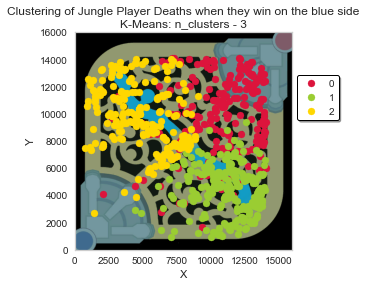

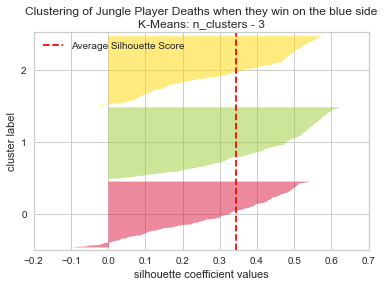

Silhouette score: 0.3447730187639534
1    229
2    219
0    211
Name: cluster, dtype: int64

Inertia: 894.9703712115022

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0  10605.170616   9911.037915  28.513399
1        1  11041.305677   4505.567686  14.476293
2        2   4990.018265   9749.433790  13.800697

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "yellowgreen", "gold"])
colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

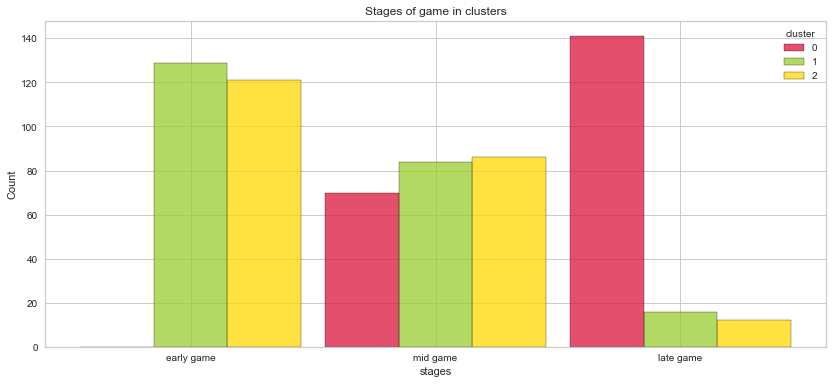

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

K-Means with k = 6

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

---
##### Clustering Blue Team Defeat

In [ ]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region champion  timestamp  \
17203   EUW1_6280215883  Blue  anonymous 141   euw1    Amumu   6.896350   
17234   EUW1_6280215883  Blue  anonymous 141   euw1    Amumu  21.702650   
17244   EUW1_6280215883  Blue  anonymous 141   euw1    Amumu  27.226433   
17453   EUW1_6277855508  Blue  anonymous 141   euw1    Amumu  12.787850   
17460   EUW1_6277855508  Blue  anonymous 141   euw1    Amumu  15.402367   
...                 ...   ...            ...    ...      ...        ...   
631961  EUW1_6289738697  Blue   anonymous 79   euw1    Amumu  10.359383   
631967  EUW1_6289738697  Blue   anonymous 79   euw1    Amumu  13.603117   
631975  EUW1_6289738697  Blue   anonymous 79   euw1    Amumu  16.466783   
631978  EUW1_6289738697  Blue   anonymous 79   euw1    Amumu  17.698050   
631983  EUW1_6289738697  Blue   anonymous 79   euw1    Amumu  20.423133   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
17203        13288.0        4037.0    NaN            NaN  ...   
17234         3520.0        3612.0    NaN            NaN  ...   
17244         8008.0        7180.0    NaN            NaN  ...   
17453         3210.0       13350.0    NaN            NaN  ...   
17460        10109.0        4747.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
631961        7542.0        4806.0    NaN            NaN  ...   
631967       13834.0        3466.0    NaN            NaN  ...   
631975        7446.0        5106.0    NaN            NaN  ...   
631978        5771.0        6023.0    NaN            NaN  ...   
631983        4890.0        7513.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
17203               NaN    False      Death        NaN           NaN   NaN   
17234               NaN    False      Death        NaN           NaN   NaN   
17244               NaN    False      Death        NaN           NaN   NaN   
17453               NaN    False      Death        NaN           NaN   NaN   
17460               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
631961              NaN    False      Death        NaN           NaN   NaN   
631967              NaN    False      Death        NaN           NaN   NaN   
631975              NaN    False      Death        NaN           NaN   NaN   
631978              NaN    False      Death        NaN           NaN   NaN   
631983              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role    rank  
17203       NaN       NaN  JUNGLE  Silver  
17234       NaN       NaN  JUNGLE  Silver  
17244       NaN       NaN  JUNGLE  Silver  
17453       NaN       NaN  JUNGLE  Silver  
17460       NaN       NaN  JUNGLE  Silver  
...         ...       ...     ...     ...  
631961      NaN       NaN  JUNGLE  Silver  
631967      NaN       NaN  JUNGLE  Silver  
631975      NaN       NaN  JUNGLE  Silver  
631978      NaN       NaN  JUNGLE  Silver  
631983      NaN       NaN  JUNGLE  Silver  

[909 rows x 56 columns]

In [ ]:
blueSide_jungler_deaths_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue")]
winRateBlueSide = (blueSideDefeat_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

57.9719387755102

In [ ]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 141 played 9 matches
anonymous 141 has an average of 6.777777777777778 deaths per game

anonymous 65 played 8 matches
anonymous 65 has an average of 8.375 deaths per game

anonymous 66 played 20 matches
anonymous 66 has an average of 8.35 deaths per game

anonymous 68 played 15 matches
anonymous 68 has an average of 8.533333333333333 deaths per game

anonymous 71 played 11 matches
anonymous 71 has an average of 10.727272727272727 deaths per game

anonymous 78 played 17 matches
anonymous 78 has an average of 5.823529411764706 deaths per game

anonymous 79 played 13 matches
anonymous 79 has an average of 8.846153846153847 deaths per game

anonymous 81 played 18 matches
anonymous 81 has an average of 8.555555555555555 deaths per game



In [ ]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 111 matches in which the jungler died at least once
8 players died a total of 909 times on the blue side
Defeat games on blue side contains an average of 8.18918918918919 deaths per game


In [ ]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
17203        13288.0        4037.0   6.896350
17234         3520.0        3612.0  21.702650
17244         8008.0        7180.0  27.226433
17453         3210.0       13350.0  12.787850
17460        10109.0        4747.0  15.402367
...              ...           ...        ...
631961        7542.0        4806.0  10.359383
631967       13834.0        3466.0  13.603117
631975        7446.0        5106.0  16.466783
631978        5771.0        6023.0  17.698050
631983        4890.0        7513.0  20.423133

[909 rows x 3 columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSideDefeat_df)
data_scaled

array([[ 1.73823226, -0.78159136, -1.37573833],
       [-1.04334786, -0.90832359,  0.18377035],
       [ 0.23467544,  0.15563075,  0.76557594],
       ...,
       [ 0.07463776, -0.46282253, -0.36770973],
       [-0.40234286, -0.18937911, -0.23802364],
       [-0.65322043,  0.25492918,  0.04900223]])

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.2668614888734636
Silhouette score for k=3: 0.2893503773309709
Silhouette score for k=4: 0.3282311273822789
Silhouette score for k=5: 0.2998680226689954
Silhouette score for k=6: 0.306620922661496
Silhouette score for k=7: 0.30382977425927227
Silhouette score for k=8: 0.29507629684888126
Silhouette score for k=9: 0.2901106596351114
Silhouette score for k=10: 0.288973924732438
Silhouette score for k=11: 0.2848068832845535
Silhouette score for k=12: 0.26850657314343945
Silhouette score for k=13: 0.27404082949166647
Silhouette score for k=14: 0.2770007261047507
Silhouette score for k=15: 0.27985984371159245
Silhouette score for k=16: 0.27562589479832805
Silhouette score for k=17: 0.273562573132661
Silhouette score for k=18: 0.27675987236815425
Silhouette score for k=19: 0.269761828454863
Silhouette score for k=20: 0.27145019489537264
Silhouette score for k=25: 0.2652892379836653


K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

K-Means with k = 3

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

K-Means with k = 4

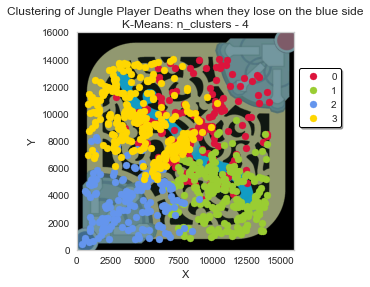

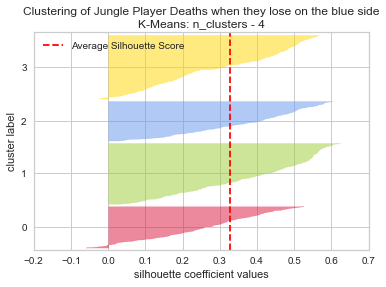

Silhouette score: 0.3282311273822789
3    282
1    269
0    183
2    175
Name: cluster, dtype: int64

Inertia: 1079.604254907363

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   8936.016393   8643.289617  30.626918
1        1  10577.769517   4156.063197  14.701035
2        2   3967.874286   3785.937143  26.823029
3        3   4805.223404   9538.865248  13.788628

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "yellowgreen", "cornflowerblue", "gold"])
colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", cluster_colors,"lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

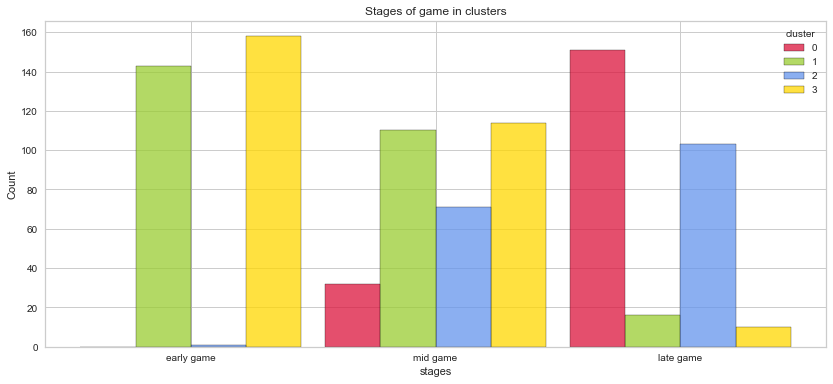

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

---
##### Red Side Win Rate vs Blue Side Win Rate

In [ ]:
wins_df = jungler_deaths_df[(jungler_deaths_df["victory"] == True)]

b = (blueSideVictory_df.shape[0]/ wins_df.shape[0]) * 100
r = (redSideVictory_df.shape[0]/ wins_df.shape[0]) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 50.56264066016504 vs Blue: 49.437359339834956


#### | Division - Gold |

**Red Side**

In [ ]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

In [ ]:
print("This Dataset contains an average of {} deaths per game".format((jungler_deaths_df.shape[0]/len(np.unique(jungler_deaths_df["gameId"])))))

In [ ]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

In [ ]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

In [ ]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

---

##### Average game time

In [ ]:
temp_df = df[(df["eventType"].isna()) & (df["rank"] == "Gold")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Gold matches have an average time of {}".format(np.mean(match_time)))

Gold matches have an average time of 29.95372828343313


In [ ]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Red") & (df["victory"] == True) & (df["rank"] == "Gold")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Gold matches have an average time of {} when they win on the red side".format(np.mean(match_time)))

Gold matches have an average time of 29.616364694940476 when they win on the red side


In [ ]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Red") & (df["victory"] == False) & (df["rank"] == "Gold")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Gold matches have an average time of {} when they lose on the red side".format(np.mean(match_time)))

Gold matches have an average time of 30.32031501610306 when they lose on the red side


In [ ]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Blue") & (df["victory"] == True) & (df["rank"] == "Gold")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Gold matches have an average time of {} when they win on the blue side".format(np.mean(match_time)))

Gold matches have an average time of 29.799548229407236 when they win on the blue side


In [ ]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Blue") & (df["victory"] == False) & (df["rank"] == "Gold")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Gold matches have an average time of {} when they lose on the blue side".format(np.mean(match_time)))

Gold matches have an average time of 30.130080133333333 when they lose on the blue side


---
##### Clustering Red Team Victory

In [101]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region champion  timestamp  \
3060    EUW1_6273443622  Red  anonymous 129   euw1    Elise  10.137967   
3165    EUW1_6273309297  Red  anonymous 129   euw1   Maokai   2.194633   
3167    EUW1_6273309297  Red  anonymous 129   euw1   Maokai   3.906483   
3169    EUW1_6273309297  Red  anonymous 129   euw1   Maokai   4.678950   
3188    EUW1_6273309297  Red  anonymous 129   euw1   Maokai  13.063800   
...                 ...  ...            ...    ...      ...        ...   
618242  EUW1_6287566776  Red  anonymous 172   euw1   Singed   8.078050   
618292  EUW1_6287566776  Red  anonymous 172   euw1   Singed  30.481917   
618296  EUW1_6287566776  Red  anonymous 172   euw1   Singed  32.250800   
618309  EUW1_6287566776  Red  anonymous 172   euw1   Singed  36.937917   
642948  EUW1_6289397856  Red  anonymous 172   euw1     Ekko  11.346367   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
3060          8142.0        6348.0    NaN            NaN  ...   
3165          7580.0       11652.0    NaN            NaN  ...   
3167          1263.0        9658.0    NaN            NaN  ...   
3169         10423.0        7698.0    NaN            NaN  ...   
3188          7051.0        7059.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
618242        8985.0        9907.0    NaN            NaN  ...   
618292        7334.0       10446.0    NaN            NaN  ...   
618296        7102.0        9438.0    NaN            NaN  ...   
618309        7009.0        1340.0    NaN            NaN  ...   
642948        5424.0       10756.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
3060                NaN     True      Death        NaN           NaN   NaN   
3165                NaN     True      Death        NaN           NaN   NaN   
3167                NaN     True      Death        NaN           NaN   NaN   
3169                NaN     True      Death        NaN           NaN   NaN   
3188                NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
618242              NaN     True      Death        NaN           NaN   NaN   
618292              NaN     True      Death        NaN           NaN   NaN   
618296              NaN     True      Death        NaN           NaN   NaN   
618309              NaN     True      Death        NaN           NaN   NaN   
642948              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
3060        NaN       NaN  JUNGLE  Gold  
3165        NaN       NaN  JUNGLE  Gold  
3167        NaN       NaN  JUNGLE  Gold  
3169        NaN       NaN  JUNGLE  Gold  
3188        NaN       NaN  JUNGLE  Gold  
...         ...       ...     ...   ...  
618242      NaN       NaN  JUNGLE  Gold  
618292      NaN       NaN  JUNGLE  Gold  
618296      NaN       NaN  JUNGLE  Gold  
618309      NaN       NaN  JUNGLE  Gold  
642948      NaN       NaN  JUNGLE  Gold  

[176 rows x 56 columns]

In [102]:
redSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [103]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

37

In [104]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

39.361702127659576

In [ ]:
redSide_jungler_deaths_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red")]
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

30.76923076923077

In [ ]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 129 played 4 matches
anonymous 129 has an average of 5.25 deaths per game

anonymous 153 played 8 matches
anonymous 153 has an average of 8.0 deaths per game

anonymous 172 played 15 matches
anonymous 172 has an average of 3.7333333333333334 deaths per game

anonymous 173 played 9 matches
anonymous 173 has an average of 3.5555555555555554 deaths per game

anonymous 179 played 1 matches
anonymous 179 has an average of 3.0 deaths per game



In [ ]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 37 matches in which the jungler died at least once
5 players died a total of 176 times on the red side
Victory games on red side contains an average of 4.756756756756757 deaths per game


In [ ]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
3060          8142.0        6348.0  10.137967
3165          7580.0       11652.0   2.194633
3167          1263.0        9658.0   3.906483
3169         10423.0        7698.0   4.678950
3188          7051.0        7059.0  13.063800
...              ...           ...        ...
618242        8985.0        9907.0   8.078050
618292        7334.0       10446.0  30.481917
618296        7102.0        9438.0  32.250800
618309        7009.0        1340.0  36.937917
642948        5424.0       10756.0  11.346367

[176 rows x 3 columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSideVictory_df)
data_scaled

array([[ 0.29035423, -0.04416016, -0.75767307],
       [ 0.1256063 ,  1.58073879, -1.70767514],
       [-1.72619556,  0.96986992, -1.50294232],
       [ 0.95901974,  0.36941706, -1.41055731],
       [-0.02946781,  0.17365718, -0.40775098],
       [-0.1382249 ,  0.0134343 , -0.15052885],
       [-1.06544499,  2.03383561,  0.25720662],
       [-0.94349634, -0.53616388,  0.77073795],
       [-1.21905337, -0.94146955,  1.24904386],
       [ 1.38642629, -1.27294404, -1.37225425],
       [ 0.60079561,  0.60010124, -1.1556753 ],
       [ 1.87979063, -0.91236597, -0.70563623],
       [-0.5750121 ,  0.64574792, -0.37430756],
       [-0.70634141,  0.13995829, -0.04121084],
       [ 0.85700501,  0.20490523,  0.13918989],
       [ 0.26074651,  0.13076769,  0.41613164],
       [-0.35192817, -0.06744303,  0.97944739],
       [ 1.2674091 , -0.7092536 ,  1.16942787],
       [-0.02419119,  0.54342585,  1.59794339],
       [-1.06309982,  0.84824758, -1.36308312],
       [ 0.20006533,  0.31825603, -1.199

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.29062556367707904
Silhouette score for k=3: 0.3292650395848449
Silhouette score for k=4: 0.3102680872919152
Silhouette score for k=5: 0.32430656610925995
Silhouette score for k=6: 0.3260853072310271
Silhouette score for k=7: 0.3205376012351395
Silhouette score for k=8: 0.30402531061785865
Silhouette score for k=9: 0.301554273370616
Silhouette score for k=10: 0.2961222820606376
Silhouette score for k=11: 0.28382169082178804
Silhouette score for k=12: 0.2906242089247372
Silhouette score for k=13: 0.2708554284823309
Silhouette score for k=14: 0.28674688182673475
Silhouette score for k=15: 0.28808096080569406
Silhouette score for k=16: 0.2950297225414112
Silhouette score for k=17: 0.29499072756476
Silhouette score for k=18: 0.30338267454466583
Silhouette score for k=19: 0.3020778225874612
Silhouette score for k=20: 0.3077192951032023
Silhouette score for k=25: 0.3113038932260493


K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

K-Means with k = 3

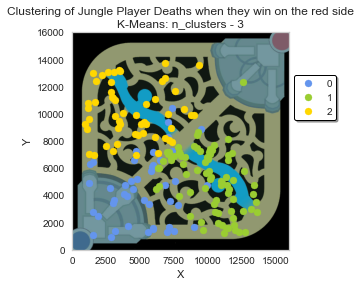

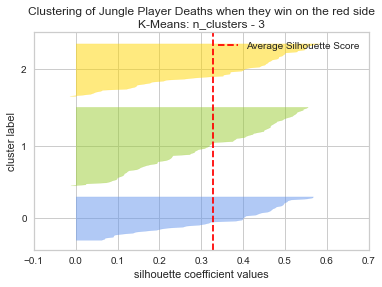

Silhouette score: 0.3292650395848449
1    79
2    53
0    44
Name: cluster, dtype: int64

Inertia: 243.8048328367486

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5222.181818   4467.295455  26.270656
1        1  10083.316456   5169.658228  13.358693
2        2   4383.207547  10144.415094  12.981718

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["cornflowerblue", "yellowgreen", "gold"])
colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

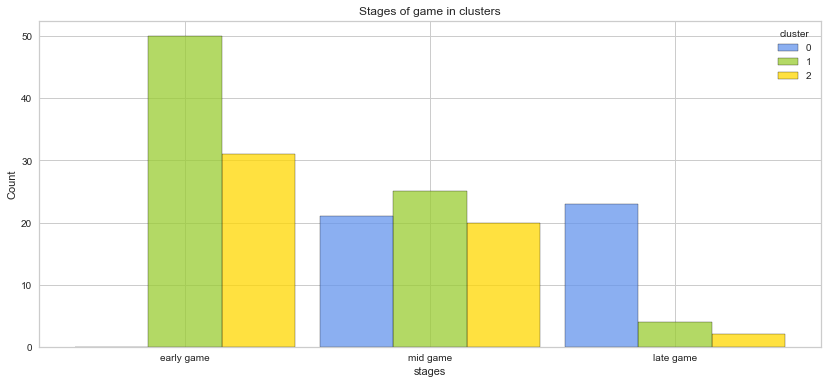

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

K-Means with k = 6

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

---
##### Clustering Red Team Defeat

In [ ]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region    champion  timestamp  \
2889    EUW1_6274465314  Red  anonymous 129   euw1      Maokai  11.513217   
2920    EUW1_6274421335  Red  anonymous 129   euw1  MonkeyKing   8.982983   
2934    EUW1_6274421335  Red  anonymous 129   euw1  MonkeyKing  16.199850   
2940    EUW1_6274421335  Red  anonymous 129   euw1  MonkeyKing  19.408433   
2945    EUW1_6274421335  Red  anonymous 129   euw1  MonkeyKing  20.767800   
...                 ...  ...            ...    ...         ...        ...   
618691  EUW1_6287503036  Red  anonymous 172   euw1      Singed  31.602733   
618703  EUW1_6287503036  Red  anonymous 172   euw1      Singed  37.131050   
618744  EUW1_6287888157  Red  anonymous 173   euw1     Evelynn  22.854233   
618749  EUW1_6287888157  Red  anonymous 173   euw1     Evelynn  26.166817   
618753  EUW1_6287888157  Red  anonymous 173   euw1     Evelynn  28.940083   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
2889          6641.0        7209.0    NaN            NaN  ...   
2920          7920.0        7566.0    NaN            NaN  ...   
2934          7563.0       14015.0    NaN            NaN  ...   
2940          9840.0        5767.0    NaN            NaN  ...   
2945          9324.0        3640.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
618691        1396.0        6652.0    NaN            NaN  ...   
618703        4968.0        9572.0    NaN            NaN  ...   
618744       11768.0        3484.0    NaN            NaN  ...   
618749       10533.0        9783.0    NaN            NaN  ...   
618753        7887.0       13567.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
2889                NaN    False      Death        NaN           NaN   NaN   
2920                NaN    False      Death        NaN           NaN   NaN   
2934                NaN    False      Death        NaN           NaN   NaN   
2940                NaN    False      Death        NaN           NaN   NaN   
2945                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
618691              NaN    False      Death        NaN           NaN   NaN   
618703              NaN    False      Death        NaN           NaN   NaN   
618744              NaN    False      Death        NaN           NaN   NaN   
618749              NaN    False      Death        NaN           NaN   NaN   
618753              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
2889        NaN       NaN  JUNGLE  Gold  
2920        NaN       NaN  JUNGLE  Gold  
2934        NaN       NaN  JUNGLE  Gold  
2940        NaN       NaN  JUNGLE  Gold  
2945        NaN       NaN  JUNGLE  Gold  
...         ...       ...     ...   ...  
618691      NaN       NaN  JUNGLE  Gold  
618703      NaN       NaN  JUNGLE  Gold  
618744      NaN       NaN  JUNGLE  Gold  
618749      NaN       NaN  JUNGLE  Gold  
618753      NaN       NaN  JUNGLE  Gold  

[396 rows x 56 columns]

In [ ]:
redSide_jungler_deaths_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red")]
winRateRedSide = (redSideDefeat_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

69.23076923076923

In [ ]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 129 played 8 matches
anonymous 129 has an average of 5.375 deaths per game

anonymous 153 played 7 matches
anonymous 153 has an average of 10.714285714285714 deaths per game

anonymous 172 played 26 matches
anonymous 172 has an average of 6.615384615384615 deaths per game

anonymous 173 played 8 matches
anonymous 173 has an average of 5.125 deaths per game

anonymous 179 played 8 matches
anonymous 179 has an average of 8.125 deaths per game



In [ ]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 57 matches in which the jungler died at least once
5 players died a total of 396 times on the red side
Defeat games on red side contains an average of 6.947368421052632 deaths per game


In [ ]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
2889          6641.0        7209.0  11.513217
2920          7920.0        7566.0   8.982983
2934          7563.0       14015.0  16.199850
2940          9840.0        5767.0  19.408433
2945          9324.0        3640.0  20.767800
...              ...           ...        ...
618691        1396.0        6652.0  31.602733
618703        4968.0        9572.0  37.131050
618744       11768.0        3484.0  22.854233
618749       10533.0        9783.0  26.166817
618753        7887.0       13567.0  28.940083

[396 rows x 3 columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSideDefeat_df)
data_scaled

array([[-0.59401729, -0.16018956, -0.95797155],
       [-0.17745931, -0.04958267, -1.2294219 ],
       [-0.29373077,  1.94846732, -0.45517672],
       ...,
       [ 1.07579723, -1.31428108,  0.25872371],
       [ 0.67356962,  0.63729542,  0.61410671],
       [-0.18820709,  1.80966652,  0.91163034]])

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.2629107516571856
Silhouette score for k=3: 0.2777731863952121
Silhouette score for k=4: 0.28729542955248527
Silhouette score for k=5: 0.28382348634767507
Silhouette score for k=6: 0.2916614820318004
Silhouette score for k=7: 0.2918046065505399
Silhouette score for k=8: 0.29030154637238936
Silhouette score for k=9: 0.29613568176442934
Silhouette score for k=10: 0.28440380505789464
Silhouette score for k=11: 0.30232568511745567
Silhouette score for k=12: 0.2868801995879883
Silhouette score for k=13: 0.28964620857475093
Silhouette score for k=14: 0.2850559352400271
Silhouette score for k=15: 0.2832324766038727
Silhouette score for k=16: 0.30016921972384697
Silhouette score for k=17: 0.284639014741203
Silhouette score for k=18: 0.28273943355969233
Silhouette score for k=19: 0.3002549418681254
Silhouette score for k=20: 0.2977422071366573
Silhouette score for k=25: 0.3101405468173659


K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

K-Means with k = 4

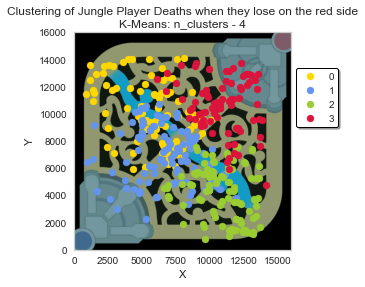

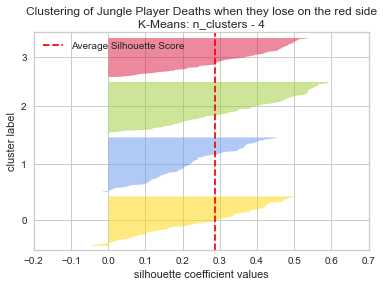

Silhouette score: 0.28729542955248527
1    111
2    104
0    101
3     80
Name: cluster, dtype: int64

Inertia: 501.70767773565643

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5793.534653   9943.297030  13.537340
1        1   6890.432432   6853.666667  27.302014
2        2  10887.259615   4275.798077  13.720129
3        3  10872.862500  10622.462500  28.382400

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "cornflowerblue", "yellowgreen", "crimson"])
colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", cluster_colors,"lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

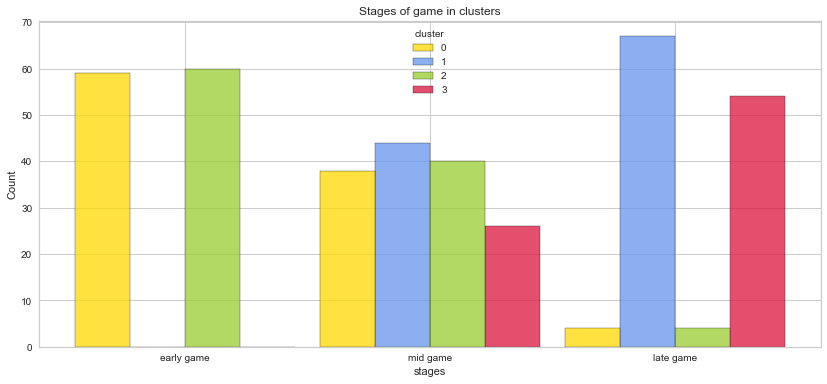

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

K-Means with k = 11

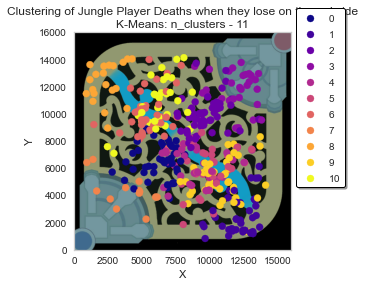

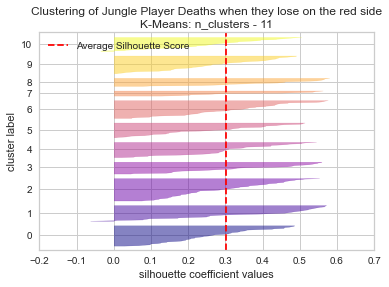

Silhouette score: 0.30232568511745567
2     54
0     49
6     43
9     43
1     38
4     37
5     36
10    34
3     29
8     20
7     13
Name: cluster, dtype: int64

Inertia: 227.68621690366365

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0         0   6360.122449   6534.020408  19.598554
1         1  12151.657895   2571.789474  11.202407
2         2   9660.037037   9892.092593  22.958460
3         3  11960.241379  11836.482759  33.668039
4         4   9021.675676   6253.621622   7.104769
5         5   9997.027778   5901.194444  18.692440
6         6   5578.255814  10044.325581  28.482613
7         7   3863.461538   4352.615385  32.570506
8         8   2380.550000  12275.500000  15.158065
9         9  10825.465116   5205.534884  29.079813
10       10   6273.529412  10662.323529  10.457743

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=11, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = oldVisualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

---
##### Clustering Blue Team Victory

In [105]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region  champion  timestamp  \
34674   EUW1_6279298775  Blue  anonymous 153   euw1  MasterYi   6.629333   
34681   EUW1_6279298775  Blue  anonymous 153   euw1  MasterYi   9.756967   
34687   EUW1_6279298775  Blue  anonymous 153   euw1  MasterYi  13.168867   
34697   EUW1_6279298775  Blue  anonymous 153   euw1  MasterYi  16.582467   
34702   EUW1_6279298775  Blue  anonymous 153   euw1  MasterYi  18.170617   
...                 ...   ...            ...    ...       ...        ...   
639065  EUW1_6289927839  Blue  anonymous 129   euw1     Elise  11.995317   
639069  EUW1_6289927839  Blue  anonymous 129   euw1     Elise  13.741617   
639073  EUW1_6289927839  Blue  anonymous 129   euw1     Elise  15.681267   
639096  EUW1_6289927839  Blue  anonymous 129   euw1     Elise  25.144567   
639168  EUW1_6289902488  Blue  anonymous 129   euw1    Maokai  22.222133   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
34674        13450.0        3265.0    NaN            NaN  ...   
34681         4858.0       10087.0    NaN            NaN  ...   
34687         6988.0        6406.0    NaN            NaN  ...   
34697         9933.0        6476.0    NaN            NaN  ...   
34702         7634.0        5713.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
639065         796.0       10384.0    NaN            NaN  ...   
639069       10721.0        4858.0    NaN            NaN  ...   
639073        9404.0        2395.0    NaN            NaN  ...   
639096       13636.0        8165.0    NaN            NaN  ...   
639168        6206.0       10446.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
34674               NaN     True      Death        NaN           NaN   NaN   
34681               NaN     True      Death        NaN           NaN   NaN   
34687               NaN     True      Death        NaN           NaN   NaN   
34697               NaN     True      Death        NaN           NaN   NaN   
34702               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
639065              NaN     True      Death        NaN           NaN   NaN   
639069              NaN     True      Death        NaN           NaN   NaN   
639073              NaN     True      Death        NaN           NaN   NaN   
639096              NaN     True      Death        NaN           NaN   NaN   
639168              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
34674       NaN       NaN  JUNGLE  Gold  
34681       NaN       NaN  JUNGLE  Gold  
34687       NaN       NaN  JUNGLE  Gold  
34697       NaN       NaN  JUNGLE  Gold  
34702       NaN       NaN  JUNGLE  Gold  
...         ...       ...     ...   ...  
639065      NaN       NaN  JUNGLE  Gold  
639069      NaN       NaN  JUNGLE  Gold  
639073      NaN       NaN  JUNGLE  Gold  
639096      NaN       NaN  JUNGLE  Gold  
639168      NaN       NaN  JUNGLE  Gold  

[246 rows x 56 columns]

In [106]:
blueSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [107]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

52

In [108]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

57.77777777777777

In [ ]:
blueSide_jungler_deaths_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue")]
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

46.41509433962264

In [ ]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 129 played 4 matches
anonymous 129 has an average of 3.75 deaths per game

anonymous 153 played 7 matches
anonymous 153 has an average of 9.428571428571429 deaths per game

anonymous 172 played 21 matches
anonymous 172 has an average of 3.8095238095238093 deaths per game

anonymous 173 played 13 matches
anonymous 173 has an average of 3.4615384615384617 deaths per game

anonymous 179 played 7 matches
anonymous 179 has an average of 5.714285714285714 deaths per game



In [ ]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 52 matches in which the jungler died at least once
5 players died a total of 246 times on the blue side
Victory games on blue side contains an average of 4.730769230769231 deaths per game


In [ ]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
34674        13450.0        3265.0   6.629333
34681         4858.0       10087.0   9.756967
34687         6988.0        6406.0  13.168867
34697         9933.0        6476.0  16.582467
34702         7634.0        5713.0  18.170617
...              ...           ...        ...
639065         796.0       10384.0  11.995317
639069       10721.0        4858.0  13.741617
639073        9404.0        2395.0  15.681267
639096       13636.0        8165.0  25.144567
639168        6206.0       10446.0  22.222133

[246 rows x 3 columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSideVictory_df)
data_scaled

array([[ 1.42576767e+00, -1.41373397e+00, -1.35754344e+00],
       [-1.17855316e+00,  6.89634825e-01, -9.95583826e-01],
       [-5.32928928e-01, -4.45296358e-01, -6.00726158e-01],
       [ 3.59729922e-01, -4.23713858e-01, -2.05671750e-01],
       [-3.37119890e-01, -6.58963109e-01, -2.18758575e-02],
       [ 5.96761916e-01,  1.00566429e+00,  1.69797360e-01],
       [-2.32850062e-01,  1.24214683e+00,  3.61140748e-01],
       [-1.37067312e-01, -4.80445001e-01,  6.51689440e-01],
       [ 1.35029329e+00, -1.64212495e-02,  8.43866081e-01],
       [-7.63595613e-01,  3.08549538e-01,  1.04746909e+00],
       [-3.12819342e-02, -4.48071251e-01,  1.42553054e+00],
       [ 4.96735627e-01, -9.52485111e-01,  1.59328439e+00],
       [ 8.32278360e-01,  1.02169700e+00,  1.93881040e+00],
       [-4.30514724e-03, -1.17786808e+00,  2.09508581e+00],
       [ 1.26208829e+00,  1.56989251e+00,  2.44175947e+00],
       [ 1.87563461e-01, -6.37688931e-01, -1.49665808e+00],
       [ 1.63127623e+00, -1.61948964e-01

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.2858407510542987
Silhouette score for k=3: 0.3260651902096969
Silhouette score for k=4: 0.3363298530598223
Silhouette score for k=5: 0.3242154452321757
Silhouette score for k=6: 0.3228081656610333
Silhouette score for k=7: 0.3082260981607141
Silhouette score for k=8: 0.3028707932928158
Silhouette score for k=9: 0.2980844520097529
Silhouette score for k=10: 0.2642340669089029
Silhouette score for k=11: 0.29297493208268466
Silhouette score for k=12: 0.28200103255602216
Silhouette score for k=13: 0.26041252198695086
Silhouette score for k=14: 0.2744886337808043
Silhouette score for k=15: 0.28700635598585816
Silhouette score for k=16: 0.2733382753546757
Silhouette score for k=17: 0.2855418225410211
Silhouette score for k=18: 0.2801523541090254
Silhouette score for k=19: 0.27429671171992526
Silhouette score for k=20: 0.2768261875817324
Silhouette score for k=25: 0.30287409146028405


K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

K-Means with k = 3

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

K-Means with k = 4

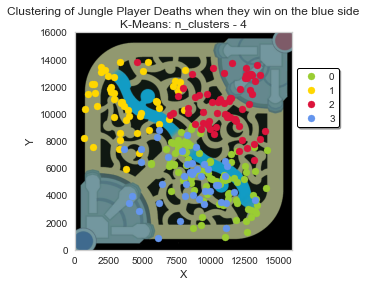

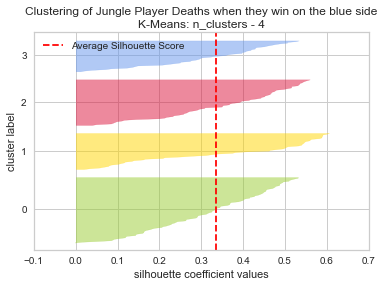

Silhouette score: 0.3363298530598223
0    90
2    63
1    50
3    43
Name: cluster, dtype: int64

Inertia: 277.6522498172505

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   9935.188889   5502.033333  12.151374
1        1   4013.360000  10808.860000  13.256268
2        2  11040.634921  10693.761905  25.603092
3        3   8399.325581   5158.860465  26.675353

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "gold", "crimson", "cornflowerblue"])
colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

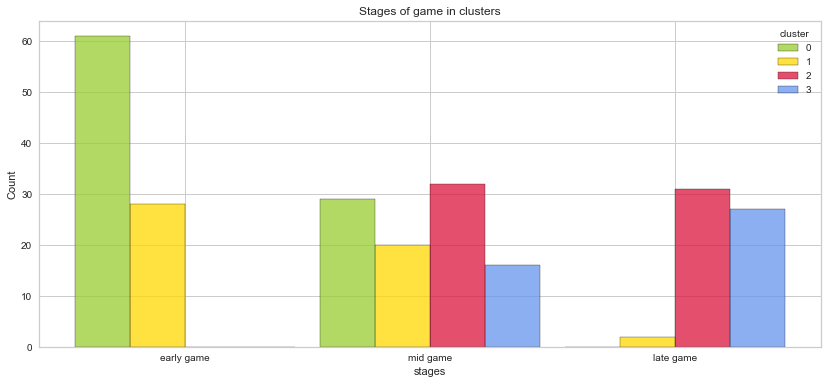

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

---
##### Clustering Blue Team Defeat

In [ ]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region    champion  timestamp  \
3383    EUW1_6272896782  Blue  anonymous 129   euw1      LeeSin   6.302467   
3396    EUW1_6272896782  Blue  anonymous 129   euw1      LeeSin  13.837467   
3406    EUW1_6272896782  Blue  anonymous 129   euw1      LeeSin  18.453517   
3417    EUW1_6272896782  Blue  anonymous 129   euw1      LeeSin  22.972600   
3425    EUW1_6272896782  Blue  anonymous 129   euw1      LeeSin  26.447450   
...                 ...   ...            ...    ...         ...        ...   
618761  EUW1_6287575621  Blue  anonymous 173   euw1  MonkeyKing   1.004350   
618768  EUW1_6287575621  Blue  anonymous 173   euw1  MonkeyKing   4.335650   
618777  EUW1_6287575621  Blue  anonymous 173   euw1  MonkeyKing   9.514267   
618790  EUW1_6287575621  Blue  anonymous 173   euw1  MonkeyKing  15.933600   
618797  EUW1_6287575621  Blue  anonymous 173   euw1  MonkeyKing  19.284233   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
3383          7678.0        7550.0    NaN            NaN  ...   
3396          4684.0        8960.0    NaN            NaN  ...   
3406          7188.0       11508.0    NaN            NaN  ...   
3417          6200.0       10302.0    NaN            NaN  ...   
3425          7050.0        3032.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
618761        6562.0        4701.0    NaN            NaN  ...   
618768       11719.0        1117.0    NaN            NaN  ...   
618777        9344.0        6040.0    NaN            NaN  ...   
618790        5705.0        6296.0    NaN            NaN  ...   
618797        6481.0        2496.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
3383                NaN    False      Death        NaN           NaN   NaN   
3396                NaN    False      Death        NaN           NaN   NaN   
3406                NaN    False      Death        NaN           NaN   NaN   
3417                NaN    False      Death        NaN           NaN   NaN   
3425                NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
618761              NaN    False      Death        NaN           NaN   NaN   
618768              NaN    False      Death        NaN           NaN   NaN   
618777              NaN    False      Death        NaN           NaN   NaN   
618790              NaN    False      Death        NaN           NaN   NaN   
618797              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role  rank  
3383        NaN       NaN  JUNGLE  Gold  
3396        NaN       NaN  JUNGLE  Gold  
3406        NaN       NaN  JUNGLE  Gold  
3417        NaN       NaN  JUNGLE  Gold  
3425        NaN       NaN  JUNGLE  Gold  
...         ...       ...     ...   ...  
618761      NaN       NaN  JUNGLE  Gold  
618768      NaN       NaN  JUNGLE  Gold  
618777      NaN       NaN  JUNGLE  Gold  
618790      NaN       NaN  JUNGLE  Gold  
618797      NaN       NaN  JUNGLE  Gold  

[284 rows x 56 columns]

In [ ]:
blueSide_jungler_deaths_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue")]
winRateBlueSide = (blueSideDefeat_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

53.58490566037736

In [ ]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 129 played 5 matches
anonymous 129 has an average of 8.2 deaths per game

anonymous 153 played 3 matches
anonymous 153 has an average of 12.666666666666666 deaths per game

anonymous 172 played 14 matches
anonymous 172 has an average of 6.857142857142857 deaths per game

anonymous 173 played 10 matches
anonymous 173 has an average of 6.2 deaths per game

anonymous 179 played 6 matches
anonymous 179 has an average of 7.833333333333333 deaths per game



In [ ]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 38 matches in which the jungler died at least once
5 players died a total of 284 times on the blue side
Defeat games on blue side contains an average of 7.473684210526316 deaths per game


In [ ]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
3383          7678.0        7550.0   6.302467
3396          4684.0        8960.0  13.837467
3406          7188.0       11508.0  18.453517
3417          6200.0       10302.0  22.972600
3425          7050.0        3032.0  26.447450
...              ...           ...        ...
618761        6562.0        4701.0   1.004350
618768       11719.0        1117.0   4.335650
618777        9344.0        6040.0   9.514267
618790        5705.0        6296.0  15.933600
618797        6481.0        2496.0  19.284233

[284 rows x 3 columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSideDefeat_df)
data_scaled

array([[ 1.76482002e-01,  3.38485519e-01, -1.47078517e+00],
       [-8.13339839e-01,  7.69081940e-01, -6.49983221e-01],
       [ 1.44871113e-02,  1.54720937e+00, -1.47148076e-01],
       [-3.12147484e-01,  1.17891201e+00,  3.45124305e-01],
       [-3.11359395e-02, -1.04125535e+00,  7.23646354e-01],
       [ 8.84631094e-01, -6.12185870e-01,  1.00744484e+00],
       [-4.43065804e-01,  1.84618377e+00,  1.20769438e+00],
       [-1.80448409e+00, -1.78884403e+00,  1.48087745e+00],
       [ 2.17067216e+00, -8.56190508e-01, -5.93443928e-01],
       [ 7.23424293e-02,  1.55973026e+00, -4.22241091e-01],
       [ 7.95368604e-01, -6.81508839e-01,  1.04451958e-01],
       [ 4.09352567e-02,  1.03904452e+00,  5.26639363e-01],
       [ 9.34882571e-01, -9.41699017e-01,  7.36925154e-01],
       [ 2.78637963e-01, -2.54882456e-01,  9.36061763e-01],
       [-1.51950532e+00, -1.17073967e+00,  1.17307218e+00],
       [ 1.12134200e+00, -4.26510250e-01, -1.57444114e+00],
       [ 5.51715064e-01, -3.62249831e-02

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.2773443973014901
Silhouette score for k=3: 0.2809564453394103
Silhouette score for k=4: 0.2936797638395734
Silhouette score for k=5: 0.27763352625831217
Silhouette score for k=6: 0.29507250195744034
Silhouette score for k=7: 0.29308776534589037
Silhouette score for k=8: 0.2810692414610987
Silhouette score for k=9: 0.2794796019754946
Silhouette score for k=10: 0.2868350384003434
Silhouette score for k=11: 0.2761143433562995
Silhouette score for k=12: 0.27956757621548395
Silhouette score for k=13: 0.2586560003651522
Silhouette score for k=14: 0.2614460893643414
Silhouette score for k=15: 0.2675458347554598
Silhouette score for k=16: 0.2761663549360649
Silhouette score for k=17: 0.2760109127951895
Silhouette score for k=18: 0.26450304079420567
Silhouette score for k=19: 0.26628182083579305
Silhouette score for k=20: 0.27106944745931777
Silhouette score for k=25: 0.2648547654589991


K-Means with k = 6

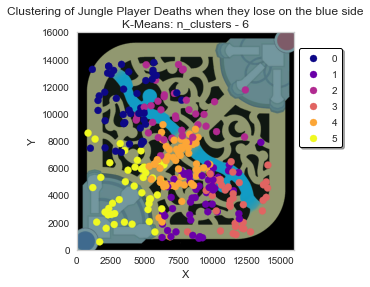

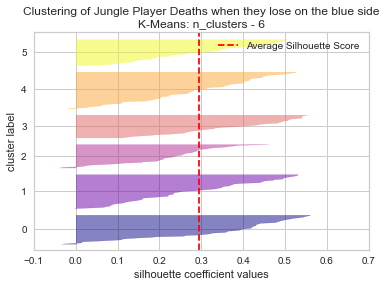

Silhouette score: 0.29507250195744034
4    60
1    56
0    48
5    43
2    39
3    38
Name: cluster, dtype: int64

Inertia: 257.66561501515656

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   3877.062500  10633.979167  12.525327
1        1   9035.982143   3968.857143  25.117562
2        2   7290.000000  10037.794872  28.907490
3        3  11573.131579   3696.605263  11.626643
4        4   7440.833333   6264.800000  13.703475
5        5   3867.302326   4393.023256  28.493514

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

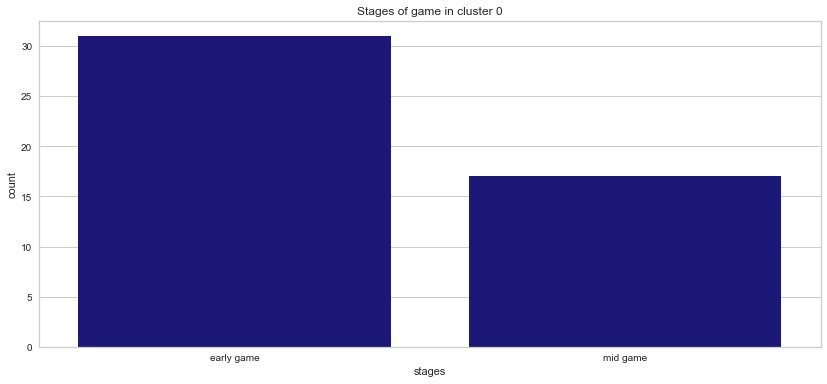

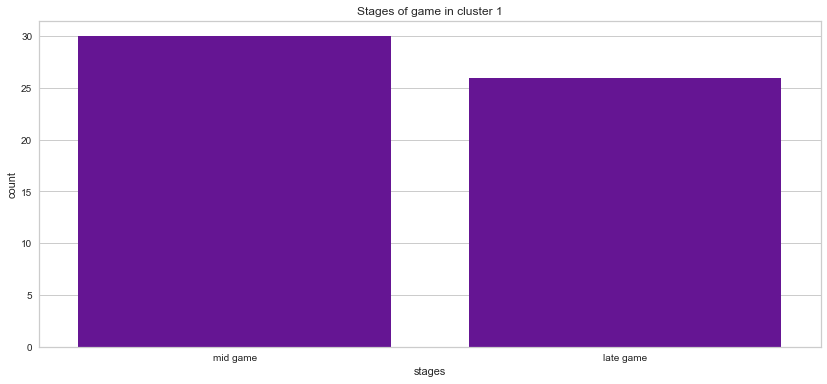

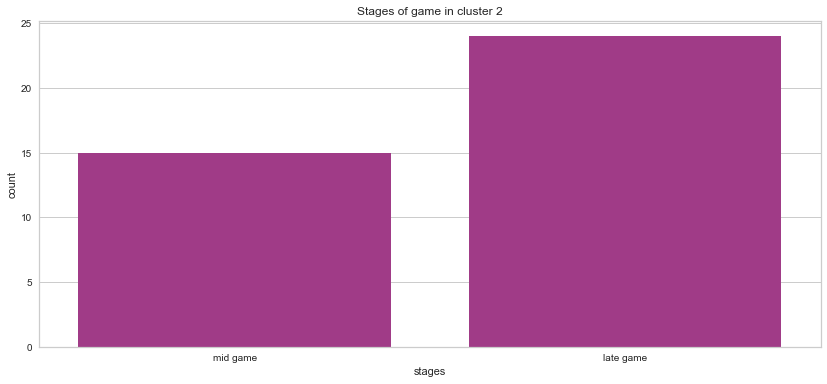

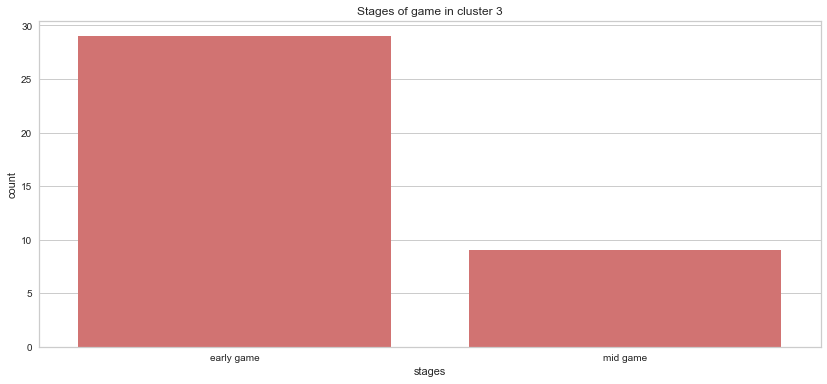

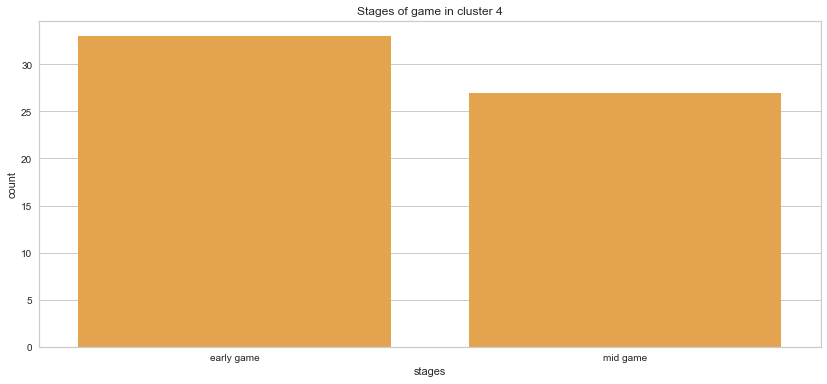

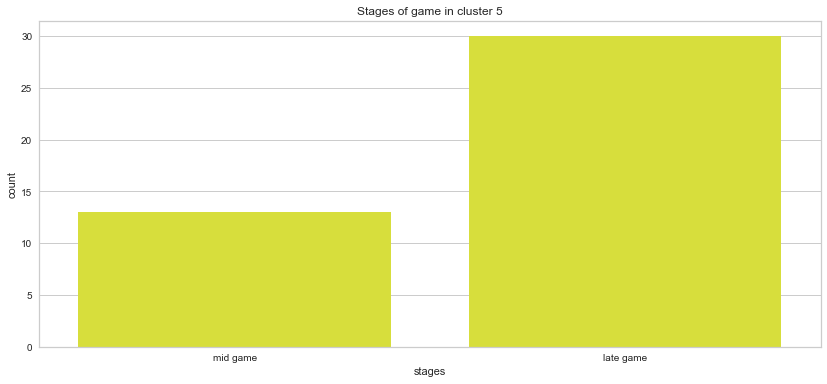

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

K-Means with k = 3

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

K-Means with k = 4

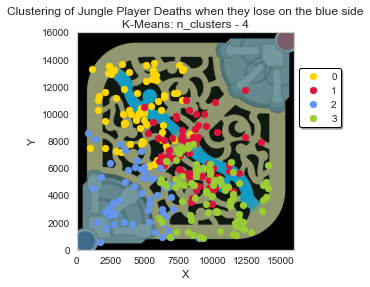

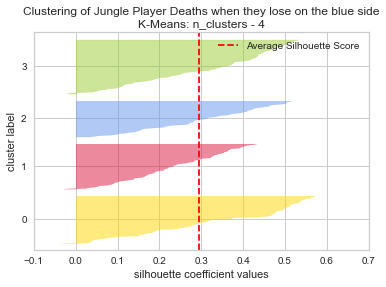

Silhouette score: 0.2936797638395734
3    84
0    74
1    70
2    56
Name: cluster, dtype: int64

Inertia: 353.76849655413537

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   4669.054054  10325.756757  15.083325
1        1   8703.300000   6947.085714  27.396618
2        2   4541.160714   4004.625000  27.010250
3        3   9760.726190   4223.321429  12.832500

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "crimson", "cornflowerblue", "yellowgreen"])
colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", cluster_colors,"lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

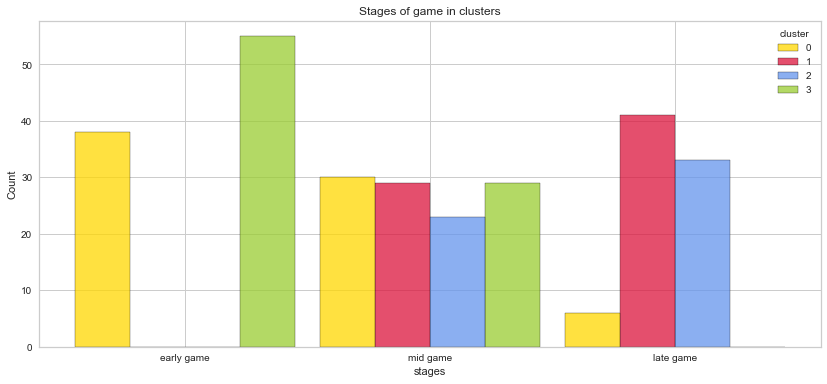

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

---
##### Red Side Win Rate vs Blue Side Win Rate

In [ ]:
wins_df = jungler_deaths_df[(jungler_deaths_df["victory"] == True)]

b = (blueSideVictory_df.shape[0]/ wins_df.shape[0]) * 100
r = (redSideVictory_df.shape[0]/ wins_df.shape[0]) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 41.70616113744076 vs Blue: 58.29383886255924


#### | Division - Platinum |

**Red Side**

In [ ]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

In [ ]:
print("This Dataset contains an average of {} deaths per game".format((jungler_deaths_df.shape[0]/len(np.unique(jungler_deaths_df["gameId"])))))

In [ ]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

In [ ]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

In [ ]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

---

##### Average game time

In [ ]:
temp_df = df[(df["eventType"].isna()) & (df["rank"] == "Platinum")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Platinum matches have an average time of {}".format(np.mean(match_time)))

Platinum matches have an average time of 29.234091752136756


In [ ]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Red") & (df["victory"] == True) & (df["rank"] == "Platinum")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Platinum matches have an average time of {} when they win on the red side".format(np.mean(match_time)))

Platinum matches have an average time of 29.653988625204587 when they win on the red side


In [ ]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Red") & (df["victory"] == False) & (df["rank"] == "Platinum")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Platinum matches have an average time of {} when they lose on the red side".format(np.mean(match_time)))

Platinum matches have an average time of 29.204651111111108 when they lose on the red side


In [ ]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Blue") & (df["victory"] == True) & (df["rank"] == "Platinum")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Platinum matches have an average time of {} when they win on the blue side".format(np.mean(match_time)))

Platinum matches have an average time of 28.99329039408867 when they win on the blue side


In [ ]:
temp_df = df[(df["eventType"].isna()) & (df["team"] == "Blue") & (df["victory"] == False) & (df["rank"] == "Platinum")]
temp_df

match_time = []
for match in np.unique(temp_df["gameId"]):
    tempV2_df = temp_df[temp_df["gameId"] == match]
    tempV2_df = tempV2_df.sort_values(by=["timestamp"])
    match_time.append(np.amax(tempV2_df["timestamp"]))

print("Platinum matches have an average time of {} when they lose on the blue side".format(np.mean(match_time)))

Platinum matches have an average time of 29.050879363517062 when they lose on the blue side


---
##### Clustering Red Team Victory

In [109]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

gameId team       summoner region champion  timestamp  \
46050   EUW1_6279567031  Red  anonymous 161   euw1   Maokai   3.497233   
46061   EUW1_6279567031  Red  anonymous 161   euw1   Maokai   8.588183   
46067   EUW1_6279567031  Red  anonymous 161   euw1   Maokai  11.279200   
46089   EUW1_6279567031  Red  anonymous 161   euw1   Maokai  19.316217   
46110   EUW1_6279567031  Red  anonymous 161   euw1   Maokai  25.482300   
...                 ...  ...            ...    ...      ...        ...   
642176  EUW1_6289606636  Red  anonymous 165   euw1    Elise   5.202500   
642193  EUW1_6289606636  Red  anonymous 165   euw1    Elise  13.974000   
642197  EUW1_6289606636  Red  anonymous 165   euw1    Elise  15.285900   
642214  EUW1_6289606636  Red  anonymous 165   euw1    Elise  22.387483   
642223  EUW1_6289606636  Red  anonymous 165   euw1    Elise  25.254867   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
46050        13096.0        2573.0    NaN            NaN  ...   
46061        11403.0        1499.0    NaN            NaN  ...   
46067         8094.0       13220.0    NaN            NaN  ...   
46089         8739.0        5580.0    NaN            NaN  ...   
46110         3383.0        2106.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642176        3525.0       11256.0    NaN            NaN  ...   
642193        9367.0        7246.0    NaN            NaN  ...   
642197        9388.0        2367.0    NaN            NaN  ...   
642214        8022.0         758.0    NaN            NaN  ...   
642223        4321.0        1702.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
46050               NaN     True      Death        NaN           NaN   NaN   
46061               NaN     True      Death        NaN           NaN   NaN   
46067               NaN     True      Death        NaN           NaN   NaN   
46089               NaN     True      Death        NaN           NaN   NaN   
46110               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642176              NaN     True      Death        NaN           NaN   NaN   
642193              NaN     True      Death        NaN           NaN   NaN   
642197              NaN     True      Death        NaN           NaN   NaN   
642214              NaN     True      Death        NaN           NaN   NaN   
642223              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
46050       NaN       NaN  JUNGLE  Platinum  
46061       NaN       NaN  JUNGLE  Platinum  
46067       NaN       NaN  JUNGLE  Platinum  
46089       NaN       NaN  JUNGLE  Platinum  
46110       NaN       NaN  JUNGLE  Platinum  
...         ...       ...     ...       ...  
642176      NaN       NaN  JUNGLE  Platinum  
642193      NaN       NaN  JUNGLE  Platinum  
642197      NaN       NaN  JUNGLE  Platinum  
642214      NaN       NaN  JUNGLE  Platinum  
642223      NaN       NaN  JUNGLE  Platinum  

[634 rows x 56 columns]

In [110]:
redSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
gamesRedSide = len(np.unique(redSideGames_df["gameId"]))

In [111]:
winsRedSide2 = len(np.unique(redSideVictory_df["gameId"]))
winsRedSide2

130

In [112]:
winRateRedSide = (winsRedSide2 / gamesRedSide) * 100
winRateRedSide

46.42857142857143

In [ ]:
redSide_jungler_deaths_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red")]
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

36.04320636725412

In [ ]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 161 played 13 matches
anonymous 161 has an average of 4.615384615384615 deaths per game

anonymous 165 played 18 matches
anonymous 165 has an average of 3.9444444444444446 deaths per game

anonymous 21 played 9 matches
anonymous 21 has an average of 6.0 deaths per game

anonymous 22 played 17 matches
anonymous 22 has an average of 3.6470588235294117 deaths per game

anonymous 29 played 14 matches
anonymous 29 has an average of 3.4285714285714284 deaths per game

anonymous 34 played 24 matches
anonymous 34 has an average of 5.666666666666667 deaths per game

anonymous 36 played 5 matches
anonymous 36 has an average of 4.6 deaths per game

anonymous 37 played 16 matches
anonymous 37 has an average of 6.75 deaths per game

anonymous 44 played 14 matches
anonymous 44 has an average of 5.142857142857143 deaths per game



In [ ]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 130 matches in which the jungler died at least once
9 players died a total of 634 times on the red side
Victory games on red side contains an average of 4.876923076923077 deaths per game


In [ ]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

coordinate_x  coordinate_y  timestamp
46050        13096.0        2573.0   3.497233
46061        11403.0        1499.0   8.588183
46067         8094.0       13220.0  11.279200
46089         8739.0        5580.0  19.316217
46110         3383.0        2106.0  25.482300
...              ...           ...        ...
642176        3525.0       11256.0   5.202500
642193        9367.0        7246.0  13.974000
642197        9388.0        2367.0  15.285900
642214        8022.0         758.0  22.387483
642223        4321.0        1702.0  25.254867

[634 rows x 3 columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSideVictory_df)
data_scaled

array([[ 1.75995781, -1.10942128, -1.6684287 ],
       [ 1.26701394, -1.4314349 , -1.09832728],
       [ 0.30354597,  2.08283106, -0.79697833],
       ...,
       [ 0.68031464, -1.17118553, -0.3482948 ],
       [ 0.28258202, -1.65360631,  0.44696399],
       [-0.79502299, -1.37057013,  0.76806307]])

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.2866772416474298
Silhouette score for k=3: 0.31937068221255
Silhouette score for k=4: 0.3303391067210996
Silhouette score for k=5: 0.29598338597864393
Silhouette score for k=6: 0.2979354101139789
Silhouette score for k=7: 0.2840820293649474
Silhouette score for k=8: 0.29203851633632344
Silhouette score for k=9: 0.2867613881939378
Silhouette score for k=10: 0.2814734763668541
Silhouette score for k=11: 0.28816930881068387
Silhouette score for k=12: 0.27831837634394524
Silhouette score for k=13: 0.26634224626971736
Silhouette score for k=14: 0.2692767867602181
Silhouette score for k=15: 0.26729375548984996
Silhouette score for k=16: 0.2687009158536006
Silhouette score for k=17: 0.27407033095746397
Silhouette score for k=18: 0.2664314980692672
Silhouette score for k=19: 0.2717234772863676
Silhouette score for k=20: 0.2695086052031814
Silhouette score for k=25: 0.26134453315421263


K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

K-Means with k = 3

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

K-Means with k = 4

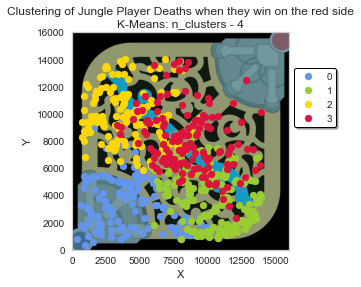

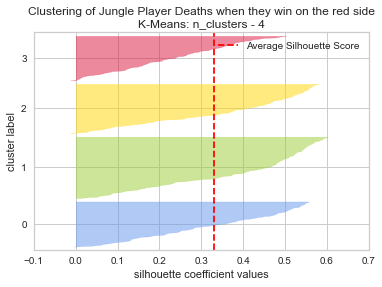

Silhouette score: 0.3303391067210996
1    194
2    156
0    143
3    141
Name: cluster, dtype: int64

Inertia: 722.9320532364218

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   4377.132867   3587.286713  26.694990
1        1  10208.247423   4059.386598  11.374674
2        2   4175.166667   9899.814103  13.080827
3        3   8602.716312   8030.794326  25.521081

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["cornflowerblue", "yellowgreen", "gold", "crimson"])
colors = visualizeResults(redSideVictory_df, data_scaled, kmeans, "on the red side", cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

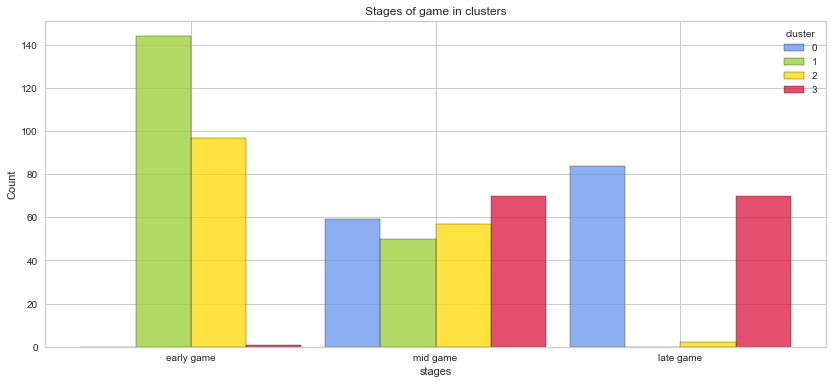

In [ ]:
stagesPerCluster(redSideVictory_df, colors)

---
##### Clustering Red Team Defeat

In [ ]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

gameId team       summoner region champion  timestamp  \
45854   EUW1_6279888483  Red  anonymous 161   euw1       Vi   3.058550   
45858   EUW1_6279888483  Red  anonymous 161   euw1       Vi   5.382433   
45867   EUW1_6279888483  Red  anonymous 161   euw1       Vi   9.375100   
45871   EUW1_6279888483  Red  anonymous 161   euw1       Vi  11.742233   
45877   EUW1_6279888483  Red  anonymous 161   euw1       Vi  14.248350   
...                 ...  ...            ...    ...      ...        ...   
642082  EUW1_6289740836  Red  anonymous 165   euw1    Elise  10.368600   
642098  EUW1_6289740836  Red  anonymous 165   euw1    Elise  20.276033   
642100  EUW1_6289740836  Red  anonymous 165   euw1    Elise  21.832083   
642104  EUW1_6289740836  Red  anonymous 165   euw1    Elise  23.172017   
642108  EUW1_6289740836  Red  anonymous 165   euw1    Elise  25.895367   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
45854         1727.0       13059.0    NaN            NaN  ...   
45858         8271.0       10336.0    NaN            NaN  ...   
45867        11490.0        4658.0    NaN            NaN  ...   
45871        10558.0         926.0    NaN            NaN  ...   
45877        12116.0        6532.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642082        5393.0       13298.0    NaN            NaN  ...   
642098        8520.0        6559.0    NaN            NaN  ...   
642100        8166.0        5739.0    NaN            NaN  ...   
642104        7076.0        7662.0    NaN            NaN  ...   
642108        8436.0        7470.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
45854               NaN    False      Death        NaN           NaN   NaN   
45858               NaN    False      Death        NaN           NaN   NaN   
45867               NaN    False      Death        NaN           NaN   NaN   
45871               NaN    False      Death        NaN           NaN   NaN   
45877               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642082              NaN    False      Death        NaN           NaN   NaN   
642098              NaN    False      Death        NaN           NaN   NaN   
642100              NaN    False      Death        NaN           NaN   NaN   
642104              NaN    False      Death        NaN           NaN   NaN   
642108              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
45854       NaN       NaN  JUNGLE  Platinum  
45858       NaN       NaN  JUNGLE  Platinum  
45867       NaN       NaN  JUNGLE  Platinum  
45871       NaN       NaN  JUNGLE  Platinum  
45877       NaN       NaN  JUNGLE  Platinum  
...         ...       ...     ...       ...  
642082      NaN       NaN  JUNGLE  Platinum  
642098      NaN       NaN  JUNGLE  Platinum  
642100      NaN       NaN  JUNGLE  Platinum  
642104      NaN       NaN  JUNGLE  Platinum  
642108      NaN       NaN  JUNGLE  Platinum  

[1125 rows x 56 columns]

In [ ]:
redSide_jungler_deaths_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red")]
winRateRedSide = (redSideDefeat_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

63.95679363274588

In [ ]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 161 played 13 matches
anonymous 161 has an average of 7.923076923076923 deaths per game

anonymous 165 played 24 matches
anonymous 165 has an average of 5.75 deaths per game

anonymous 21 played 12 matches
anonymous 21 has an average of 7.333333333333333 deaths per game

anonymous 22 played 26 matches
anonymous 22 has an average of 7.884615384615385 deaths per game

anonymous 29 played 16 matches
anonymous 29 has an average of 5.875 deaths per game

anonymous 34 played 18 matches
anonymous 34 has an average of 8.277777777777779 deaths per game

anonymous 36 played 12 matches
anonymous 36 has an average of 7.75 deaths per game

anonymous 37 played 15 matches
anonymous 37 has an average of 8.666666666666666 deaths per game

anonymous 44 played 14 matches
anonymous 44 has an average of 8.928571428571429 deaths per game



In [ ]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 150 matches in which the jungler died at least once
9 players died a total of 1125 times on the red side
Defeat games on red side contains an average of 7.5 deaths per game


In [ ]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

coordinate_x  coordinate_y  timestamp
45854         1727.0       13059.0   3.058550
45858         8271.0       10336.0   5.382433
45867        11490.0        4658.0   9.375100
45871        10558.0         926.0  11.742233
45877        12116.0        6532.0  14.248350
...              ...           ...        ...
642082        5393.0       13298.0  10.368600
642098        8520.0        6559.0  20.276033
642100        8166.0        5739.0  21.832083
642104        7076.0        7662.0  23.172017
642108        8436.0        7470.0  25.895367

[1125 rows x 3 columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(redSideDefeat_df)
data_scaled

array([[-2.17794876,  1.56762234, -1.7722615 ],
       [-0.17057371,  0.75242831, -1.50219975],
       [ 0.81685604, -0.94741439, -1.03820634],
       ...,
       [-0.20278251, -0.62379164,  0.4094372 ],
       [-0.53714052, -0.04809641,  0.56515274],
       [-0.11995988, -0.10557613,  0.88163707]])

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.29418243018593254
Silhouette score for k=3: 0.3219272618138868
Silhouette score for k=4: 0.3170398353525171
Silhouette score for k=5: 0.288046615858057
Silhouette score for k=6: 0.2968590273668159
Silhouette score for k=7: 0.2926740001009745
Silhouette score for k=8: 0.28306125438591656
Silhouette score for k=9: 0.2683902856670217
Silhouette score for k=10: 0.2665805831895243
Silhouette score for k=11: 0.25423862396928626
Silhouette score for k=12: 0.2622931609698582
Silhouette score for k=13: 0.25874443949367243
Silhouette score for k=14: 0.257890924393082
Silhouette score for k=15: 0.25433269983087475
Silhouette score for k=16: 0.25925525632612423
Silhouette score for k=17: 0.25801093056514585
Silhouette score for k=18: 0.2574735355769869
Silhouette score for k=19: 0.2582987055088108
Silhouette score for k=20: 0.2638534041495671
Silhouette score for k=25: 0.2649354064505792


K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

K-Means with k = 3

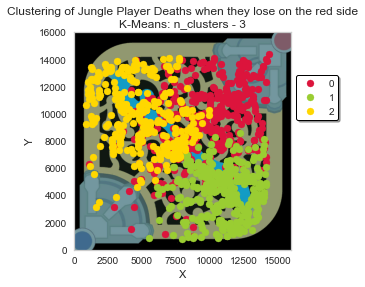

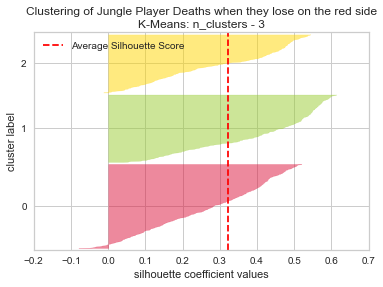

Silhouette score: 0.3219272618138868
0    451
1    362
2    312
Name: cluster, dtype: int64

Inertia: 1592.6200131909889

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   9641.904656   9280.705100  25.912900
1        1  11014.665746   4300.417127  13.247733
2        2   5111.032051   9801.730769  13.189375

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "yellowgreen", "gold"])
colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", cluster_colors,"lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

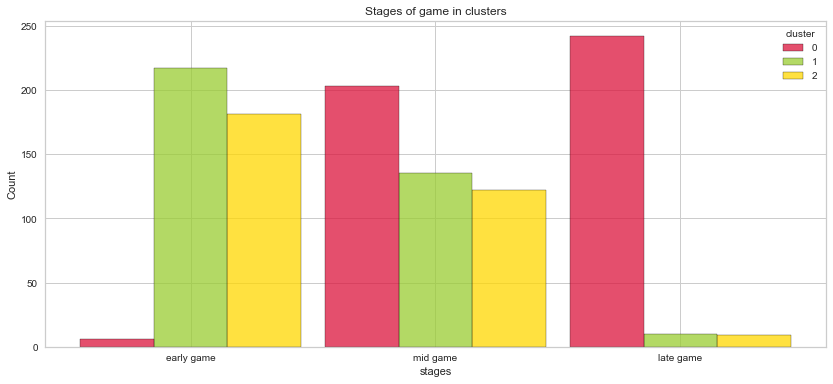

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

K-Means with k = 6

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(redSideDefeat_df, data_scaled, kmeans, "on the red side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(redSideDefeat_df, colors)

---
##### Clustering Blue Team Victory

In [113]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)]
blueSideVictory_df

gameId  team       summoner region champion  timestamp  \
46007   EUW1_6279628632  Blue  anonymous 161   euw1   Maokai  10.211733   
46373   EUW1_6278427437  Blue  anonymous 161   euw1   Maokai   3.844650   
46377   EUW1_6278427437  Blue  anonymous 161   euw1   Maokai   5.492933   
46388   EUW1_6278427437  Blue  anonymous 161   euw1   Maokai  11.081067   
46399   EUW1_6278427437  Blue  anonymous 161   euw1   Maokai  16.782667   
...                 ...   ...            ...    ...      ...        ...   
642390  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko   9.020917   
642404  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  16.234150   
642412  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  19.922367   
642417  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  21.353700   
642426  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  23.927567   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
46007         3050.0       12107.0    NaN            NaN  ...   
46373         3479.0        9351.0    NaN            NaN  ...   
46377         7542.0        7260.0    NaN            NaN  ...   
46388         7316.0        7942.0    NaN            NaN  ...   
46399        10339.0        2661.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642390       13136.0        1998.0    NaN            NaN  ...   
642404        1901.0       12644.0    NaN            NaN  ...   
642412       12026.0       10604.0    NaN            NaN  ...   
642417        7798.0       11952.0    NaN            NaN  ...   
642426       13506.0       13848.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
46007               NaN     True      Death        NaN           NaN   NaN   
46373               NaN     True      Death        NaN           NaN   NaN   
46377               NaN     True      Death        NaN           NaN   NaN   
46388               NaN     True      Death        NaN           NaN   NaN   
46399               NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642390              NaN     True      Death        NaN           NaN   NaN   
642404              NaN     True      Death        NaN           NaN   NaN   
642412              NaN     True      Death        NaN           NaN   NaN   
642417              NaN     True      Death        NaN           NaN   NaN   
642426              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
46007       NaN       NaN  JUNGLE  Platinum  
46373       NaN       NaN  JUNGLE  Platinum  
46377       NaN       NaN  JUNGLE  Platinum  
46388       NaN       NaN  JUNGLE  Platinum  
46399       NaN       NaN  JUNGLE  Platinum  
...         ...       ...     ...       ...  
642390      NaN       NaN  JUNGLE  Platinum  
642404      NaN       NaN  JUNGLE  Platinum  
642412      NaN       NaN  JUNGLE  Platinum  
642417      NaN       NaN  JUNGLE  Platinum  
642426      NaN       NaN  JUNGLE  Platinum  

[591 rows x 56 columns]

In [114]:
blueSideGames_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
gamesBlueSide = len(np.unique(blueSideGames_df["gameId"]))

In [115]:
winsBlueSide2 = len(np.unique(blueSideVictory_df["gameId"]))
winsBlueSide2

121

In [116]:
winRateBlueSide = (winsBlueSide2 / gamesBlueSide) * 100
winRateBlueSide

49.1869918699187

In [ ]:
blueSide_jungler_deaths_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue")]
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

37.61935073201783

In [ ]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 161 played 17 matches
anonymous 161 has an average of 4.117647058823529 deaths per game

anonymous 165 played 20 matches
anonymous 165 has an average of 3.3 deaths per game

anonymous 21 played 14 matches
anonymous 21 has an average of 6.285714285714286 deaths per game

anonymous 22 played 15 matches
anonymous 22 has an average of 3.933333333333333 deaths per game

anonymous 29 played 10 matches
anonymous 29 has an average of 4.2 deaths per game

anonymous 34 played 18 matches
anonymous 34 has an average of 5.166666666666667 deaths per game

anonymous 36 played 6 matches
anonymous 36 has an average of 5.666666666666667 deaths per game

anonymous 37 played 13 matches
anonymous 37 has an average of 6.923076923076923 deaths per game

anonymous 44 played 8 matches
anonymous 44 has an average of 6.125 deaths per game



In [ ]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 121 matches in which the jungler died at least once
9 players died a total of 591 times on the blue side
Victory games on blue side contains an average of 4.884297520661157 deaths per game


In [ ]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

coordinate_x  coordinate_y  timestamp
46007         3050.0       12107.0  10.211733
46373         3479.0        9351.0   3.844650
46377         7542.0        7260.0   5.492933
46388         7316.0        7942.0  11.081067
46399        10339.0        2661.0  16.782667
...              ...           ...        ...
642390       13136.0        1998.0   9.020917
642404        1901.0       12644.0  16.234150
642412       12026.0       10604.0  19.922367
642417        7798.0       11952.0  21.353700
642426       13506.0       13848.0  23.927567

[591 rows x 3 columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSideVictory_df)
data_scaled

array([[-1.61434719,  1.3757225 , -0.86063686],
       [-1.4883043 ,  0.5387828 , -1.54019614],
       [-0.29456938, -0.09621028, -1.36427473],
       ...,
       [ 1.02285798,  0.91929276,  0.17577975],
       [-0.21935497,  1.32865224,  0.32854606],
       [ 1.45769127,  1.90442788,  0.60325504]])

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.2964944339466941
Silhouette score for k=3: 0.3270272192113243
Silhouette score for k=4: 0.3225011942545538
Silhouette score for k=5: 0.2955142944079988
Silhouette score for k=6: 0.29769335104085226
Silhouette score for k=7: 0.3051952732118997
Silhouette score for k=8: 0.290218338654874
Silhouette score for k=9: 0.2803428532427407
Silhouette score for k=10: 0.27860470806527154
Silhouette score for k=11: 0.2819584999620723
Silhouette score for k=12: 0.28345012704916567
Silhouette score for k=13: 0.26963222419079086
Silhouette score for k=14: 0.26892943571284444
Silhouette score for k=15: 0.26715111398894503
Silhouette score for k=16: 0.2604311927718564
Silhouette score for k=17: 0.2701917821200143
Silhouette score for k=18: 0.2653644657939066
Silhouette score for k=19: 0.269646227100009
Silhouette score for k=20: 0.27669048593749546
Silhouette score for k=25: 0.2779221257721203


K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

K-Means with k = 3

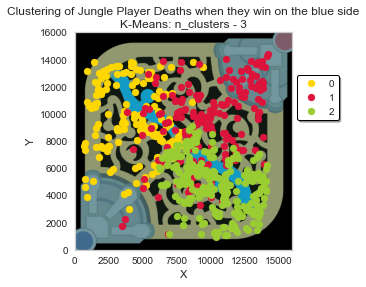

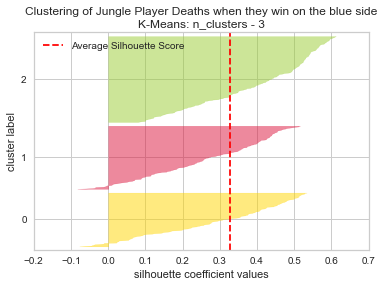

Silhouette score: 0.3270272192113243
2    250
1    184
0    157
Name: cluster, dtype: int64

Inertia: 854.2069928138012

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   4309.579618   9634.261146  15.867640
1        1   9806.902174   9457.565217  28.000001
2        2  10275.132000   4900.508000  12.630192

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["gold", "crimson", "yellowgreen"])
colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", cluster_colors,"win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

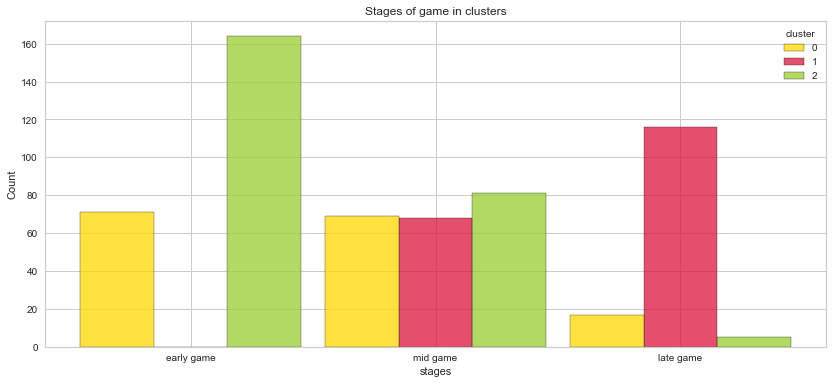

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

K-Means with k = 6

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideVictory_df, data_scaled, kmeans, "on the blue side", "win")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideVictory_df, colors)

---
##### Clustering Blue Team Defeat

In [ ]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)]
blueSideDefeat_df

gameId  team       summoner region champion  timestamp  \
45922   EUW1_6279679771  Blue  anonymous 161   euw1   Maokai   4.026917   
45926   EUW1_6279679771  Blue  anonymous 161   euw1   Maokai   6.334817   
45933   EUW1_6279679771  Blue  anonymous 161   euw1   Maokai   9.051683   
45935   EUW1_6279679771  Blue  anonymous 161   euw1   Maokai  10.806633   
45940   EUW1_6279679771  Blue  anonymous 161   euw1   Maokai  12.463983   
...                 ...   ...            ...    ...      ...        ...   
641902  EUW1_6289891261  Blue  anonymous 165   euw1   Khazix   3.444700   
641907  EUW1_6289891261  Blue  anonymous 165   euw1   Khazix   5.515950   
641922  EUW1_6289891261  Blue  anonymous 165   euw1   Khazix  13.242633   
641926  EUW1_6289891261  Blue  anonymous 165   euw1   Khazix  15.539450   
641936  EUW1_6289891261  Blue  anonymous 165   euw1   Khazix  19.831550   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
45922         7368.0        6302.0    NaN            NaN  ...   
45926         9307.0        5908.0    NaN            NaN  ...   
45933        13701.0        3319.0    NaN            NaN  ...   
45935        13990.0        7799.0    NaN            NaN  ...   
45940         9986.0        1479.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
641902        6663.0        4821.0    NaN            NaN  ...   
641907        3130.0        7004.0    NaN            NaN  ...   
641922        9065.0        9342.0    NaN            NaN  ...   
641926        4665.0        8047.0    NaN            NaN  ...   
641936        2235.0        2381.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
45922               NaN    False      Death        NaN           NaN   NaN   
45926               NaN    False      Death        NaN           NaN   NaN   
45933               NaN    False      Death        NaN           NaN   NaN   
45935               NaN    False      Death        NaN           NaN   NaN   
45940               NaN    False      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
641902              NaN    False      Death        NaN           NaN   NaN   
641907              NaN    False      Death        NaN           NaN   NaN   
641922              NaN    False      Death        NaN           NaN   NaN   
641926              NaN    False      Death        NaN           NaN   NaN   
641936              NaN    False      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
45922       NaN       NaN  JUNGLE  Platinum  
45926       NaN       NaN  JUNGLE  Platinum  
45933       NaN       NaN  JUNGLE  Platinum  
45935       NaN       NaN  JUNGLE  Platinum  
45940       NaN       NaN  JUNGLE  Platinum  
...         ...       ...     ...       ...  
641902      NaN       NaN  JUNGLE  Platinum  
641907      NaN       NaN  JUNGLE  Platinum  
641922      NaN       NaN  JUNGLE  Platinum  
641926      NaN       NaN  JUNGLE  Platinum  
641936      NaN       NaN  JUNGLE  Platinum  

[980 rows x 56 columns]

In [ ]:
blueSide_jungler_deaths_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue")]
winRateBlueSide = (blueSideDefeat_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

62.38064926798218

In [ ]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 161 played 16 matches
anonymous 161 has an average of 6.3125 deaths per game

anonymous 165 played 11 matches
anonymous 165 has an average of 5.818181818181818 deaths per game

anonymous 21 played 8 matches
anonymous 21 has an average of 7.875 deaths per game

anonymous 22 played 16 matches
anonymous 22 has an average of 6.9375 deaths per game

anonymous 29 played 17 matches
anonymous 29 has an average of 7.705882352941177 deaths per game

anonymous 34 played 21 matches
anonymous 34 has an average of 7.9523809523809526 deaths per game

anonymous 36 played 8 matches
anonymous 36 has an average of 9.5 deaths per game

anonymous 37 played 10 matches
anonymous 37 has an average of 9.8 deaths per game

anonymous 44 played 18 matches
anonymous 44 has an average of 9.38888888888889 deaths per game



In [ ]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 125 matches in which the jungler died at least once
9 players died a total of 980 times on the blue side
Defeat games on blue side contains an average of 7.84 deaths per game


In [ ]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

coordinate_x  coordinate_y  timestamp
45922         7368.0        6302.0   4.026917
45926         9307.0        5908.0   6.334817
45933        13701.0        3319.0   9.051683
45935        13990.0        7799.0  10.806633
45940         9986.0        1479.0  12.463983
...              ...           ...        ...
641902        6663.0        4821.0   3.444700
641907        3130.0        7004.0   5.515950
641922        9065.0        9342.0  13.242633
641926        4665.0        8047.0  15.539450
641936        2235.0        2381.0  19.831550

[980 rows x 3 columns]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(blueSideDefeat_df)
data_scaled

array([[ 0.13420355,  0.11995267, -1.6762325 ],
       [ 0.6891755 , -0.0064639 , -1.40334952],
       [ 1.94680662, -0.83715558, -1.08211088],
       ...,
       [ 0.61991134,  1.09534962, -0.58657861],
       [-0.63943708,  0.67984336, -0.31500611],
       [-1.33494086, -1.13811688,  0.19248599]])

In [ ]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(data_scaled, kmeans.labels_)))

Silhouette score for k=2: 0.29084260952674196
Silhouette score for k=3: 0.3156101471315099
Silhouette score for k=4: 0.2899980083806446
Silhouette score for k=5: 0.28767317966786843
Silhouette score for k=6: 0.2996076020958653
Silhouette score for k=7: 0.29392840567732986
Silhouette score for k=8: 0.29171696263606944
Silhouette score for k=9: 0.2870956604292765
Silhouette score for k=10: 0.28358002586381537
Silhouette score for k=11: 0.27882483587613166
Silhouette score for k=12: 0.2704629041518276
Silhouette score for k=13: 0.2668577951435697
Silhouette score for k=14: 0.2571312982814982
Silhouette score for k=15: 0.2620751529859993
Silhouette score for k=16: 0.26184576891889627
Silhouette score for k=17: 0.2623931424996265
Silhouette score for k=18: 0.2604063134075486
Silhouette score for k=19: 0.26137423992365266
Silhouette score for k=20: 0.26066160077281386
Silhouette score for k=25: 0.261500180027097


K-Means with k = 2

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

K-Means with k = 3

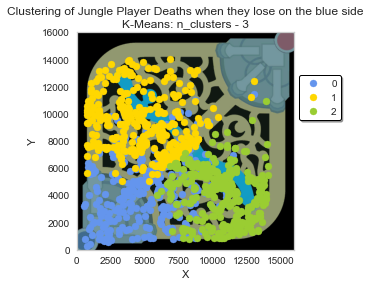

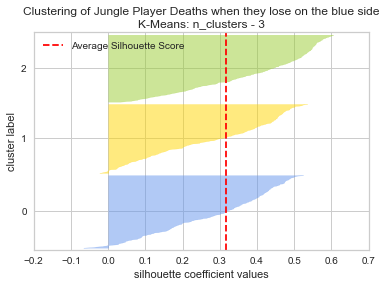

Silhouette score: 0.3156101471315099
0    341
1    324
2    315
Name: cluster, dtype: int64

Inertia: 1389.2892822904032

Mean values for each cluster:


cluster  coordinate_x  coordinate_y  timestamp
0        0   5466.255132   4508.020528  26.371040
1        1   4847.666667   9219.972222  14.582909
2        2  10560.288889   4079.609524  13.086178

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["cornflowerblue", "gold", "yellowgreen"])
colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", cluster_colors,"lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

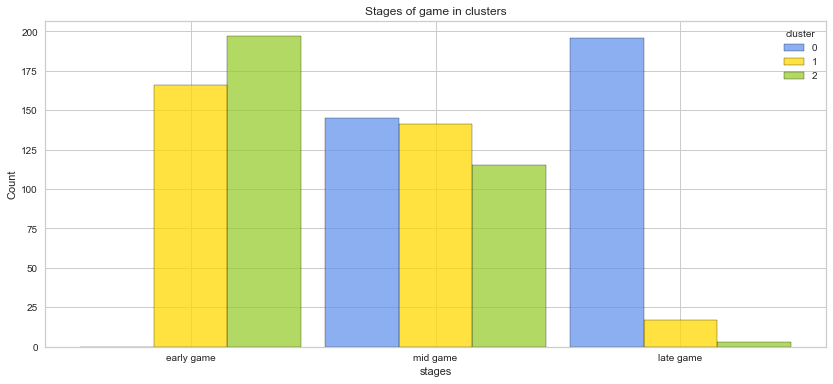

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

K-Means with k = 6

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_

colors = visualizeResults(blueSideDefeat_df, data_scaled, kmeans, "on the blue side", "lose")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [ ]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

In [ ]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

In [ ]:
stagesPerCluster(blueSideDefeat_df, colors)

---
##### Red Side Win Rate vs Blue Side Win Rate

In [ ]:
wins_df = jungler_deaths_df[(jungler_deaths_df["victory"] == True)]

b = (blueSideVictory_df.shape[0]/ wins_df.shape[0]) * 100
r = (redSideVictory_df.shape[0]/ wins_df.shape[0]) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 51.755102040816325 vs Blue: 48.244897959183675


In [9]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]

wins_df = jungler_deaths_df[jungler_deaths_df["victory"] == True]
wins_df

gameId  team       summoner region champion  timestamp  \
3060    EUW1_6273443622   Red  anonymous 129   euw1    Elise  10.137967   
3165    EUW1_6273309297   Red  anonymous 129   euw1   Maokai   2.194633   
3167    EUW1_6273309297   Red  anonymous 129   euw1   Maokai   3.906483   
3169    EUW1_6273309297   Red  anonymous 129   euw1   Maokai   4.678950   
3188    EUW1_6273309297   Red  anonymous 129   euw1   Maokai  13.063800   
...                 ...   ...            ...    ...      ...        ...   
642404  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  16.234150   
642412  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  19.922367   
642417  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  21.353700   
642426  EUW1_6289301059  Blue  anonymous 165   euw1     Ekko  23.927567   
642948  EUW1_6289397856   Red  anonymous 172   euw1     Ekko  11.346367   

        coordinate_x  coordinate_y  level  minionsKilled  ...  \
3060          8142.0        6348.0    NaN            NaN  ...   
3165          7580.0       11652.0    NaN            NaN  ...   
3167          1263.0        9658.0    NaN            NaN  ...   
3169         10423.0        7698.0    NaN            NaN  ...   
3188          7051.0        7059.0    NaN            NaN  ...   
...              ...           ...    ...            ...  ...   
642404        1901.0       12644.0    NaN            NaN  ...   
642412       12026.0       10604.0    NaN            NaN  ...   
642417        7798.0       11952.0    NaN            NaN  ...   
642426       13506.0       13848.0    NaN            NaN  ...   
642948        5424.0       10756.0    NaN            NaN  ...   

        trueDamageTaken  victory  eventType  skillSlot  buildingType  lane  \
3060                NaN     True      Death        NaN           NaN   NaN   
3165                NaN     True      Death        NaN           NaN   NaN   
3167                NaN     True      Death        NaN           NaN   NaN   
3169                NaN     True      Death        NaN           NaN   NaN   
3188                NaN     True      Death        NaN           NaN   NaN   
...                 ...      ...        ...        ...           ...   ...   
642404              NaN     True      Death        NaN           NaN   NaN   
642412              NaN     True      Death        NaN           NaN   NaN   
642417              NaN     True      Death        NaN           NaN   NaN   
642426              NaN     True      Death        NaN           NaN   NaN   
642948              NaN     True      Death        NaN           NaN   NaN   

        monster  itemName    role      rank  
3060        NaN       NaN  JUNGLE      Gold  
3165        NaN       NaN  JUNGLE      Gold  
3167        NaN       NaN  JUNGLE      Gold  
3169        NaN       NaN  JUNGLE      Gold  
3188        NaN       NaN  JUNGLE      Gold  
...         ...       ...     ...       ...  
642404      NaN       NaN  JUNGLE  Platinum  
642412      NaN       NaN  JUNGLE  Platinum  
642417      NaN       NaN  JUNGLE  Platinum  
642426      NaN       NaN  JUNGLE  Platinum  
642948      NaN       NaN  JUNGLE      Gold  

[4574 rows x 56 columns]

In [10]:
wins = len(np.unique(wins_df["gameId"]))
wins

902

In [11]:
b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 50.886917960088695 vs Blue: 49.11308203991131


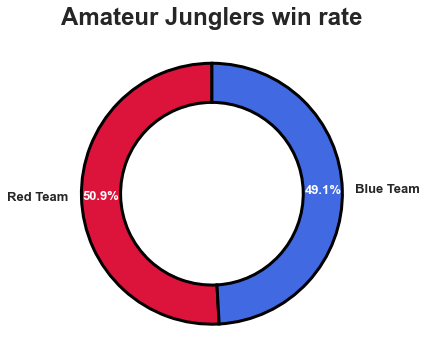

In [12]:
fig, ax = plt.subplots(figsize=(6, 6))
 
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}

_, texts, autotexts = ax.pie([r,b], 
       wedgeprops= wedgeprops, 
       startangle=90,
       labels=["Red Team", "Blue Team"],
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=['crimson', 'royalblue'])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight("bold")
    autotext.set_fontsize(13)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[0].set_fontweight("bold")
texts[1].set_fontweight("bold")

plt.title('Amateur Junglers win rate', fontsize=24, loc='center', fontweight="bold")

plt.show()

##### Champions' matches per division:

In [89]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Iron")]

champs = {}
for m in np.unique(jungler_deaths_df["gameId"]):
    temp_df = jungler_deaths_df[jungler_deaths_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
iron_champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])


ironChampsWins = []
for row in iron_champs_df.iterrows():
    champsWinrates_row = {}
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["victories"] = row[1][0]
    champsWinrates_row["rank"] = "Iron"
    
    ironChampsWins.append(champsWinrates_row)

ironChampsWinrates_df = pd.DataFrame(ironChampsWins)
#ironChampsWinrates_df
    

In [90]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Bronze")]

champs = {}
for m in np.unique(jungler_deaths_df["gameId"]):
    temp_df = jungler_deaths_df[jungler_deaths_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
bronze_champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])

bronzeChampsWins = []
for row in bronze_champs_df.iterrows():
    champsWinrates_row = {}
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["victories"] = row[1][0]
    champsWinrates_row["rank"] = "Bronze"
    
    bronzeChampsWins.append(champsWinrates_row)

bronzeChampsWinrates_df = pd.DataFrame(bronzeChampsWins)
#bronzeChampsWinrates_df

In [91]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Silver")]

champs = {}
for m in np.unique(jungler_deaths_df["gameId"]):
    temp_df = jungler_deaths_df[jungler_deaths_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1


#print("Victories with each champion:\n")
silver_champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])

silverChampsWins = []
for row in silver_champs_df.iterrows():
    champsWinrates_row = {}
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["victories"] = row[1][0]
    champsWinrates_row["rank"] = "Silver"
    
    silverChampsWins.append(champsWinrates_row)

silverChampsWinrates_df = pd.DataFrame(silverChampsWins)
#silverChampsWinrates_df

In [92]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Gold")]

champs = {}
for m in np.unique(jungler_deaths_df["gameId"]):
    temp_df = jungler_deaths_df[jungler_deaths_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
gold_champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])

goldChampsWins = []
for row in gold_champs_df.iterrows():
    champsWinrates_row = {}
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["victories"] = row[1][0]
    champsWinrates_row["rank"] = "Gold"
    
    goldChampsWins.append(champsWinrates_row)

goldChampsWinrates_df = pd.DataFrame(goldChampsWins)
#goldChampsWinrates_df

In [93]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death") & (df["rank"] == "Platinum")]

champs = {}
for m in np.unique(jungler_deaths_df["gameId"]):
    temp_df = jungler_deaths_df[jungler_deaths_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
plat_champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])

platChampsWins = []
for row in plat_champs_df.iterrows():
    champsWinrates_row = {}
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["victories"] = row[1][0]
    champsWinrates_row["rank"] = "Platinum"
    
    platChampsWins.append(champsWinrates_row)

platChampsWinrates_df = pd.DataFrame(platChampsWins)
#platChampsWinrates_df

In [94]:
radar_df = ironChampsWinrates_df.merge(bronzeChampsWinrates_df, how="outer")
radar_df = radar_df.merge(silverChampsWinrates_df, how="outer")
radar_df = radar_df.merge(goldChampsWinrates_df, how="outer")
radar_df = radar_df.merge(platChampsWinrates_df, how="outer")
#radar_df

In [95]:
radar_df = pd.pivot_table(radar_df, index='rank', columns='champion', values='victories', aggfunc='sum', fill_value=0)
radar_df

champion  Amumu  AurelionSol  Belveth  Diana  DrMundo  Ekko  Elise  Evelynn  \
rank                                                                          
Bronze        8            1        2      3        0    30     10        0   
Gold          5            0        7      1        0    20      8        9   
Iron          2            1        0      2        0     0      0        0   
Platinum      7            1       58      5        1    22      4        4   
Silver       21            0       32     70        0    44      1        3   

champion  FiddleSticks  Garen  ...  Tryndamere  Udyr  Vi  Viego  Volibear  \
rank                           ...                                          
Bronze               0      0  ...           0    70   6     15         1   
Gold                 9      0  ...           0     3   2      0         0   
Iron                 0      0  ...           0    82   3      0         6   
Platinum             3      0  ...           1    66   8     15         0   
Silver               2      1  ...           0     0   5     24         1   

champion  Warwick  XinZhao  Zac  Zed  Zeri  
rank                                        
Bronze         27        1    1    1     0  
Gold            1        0    4    0     0  
Iron           16        4    0    0     0  
Platinum        2        6    7    2     0  
Silver          2        1    4    0     1  

[5 rows x 59 columns]

In [96]:
radar_list = radar_df.values.tolist()
#radar_list

In [97]:
radar_labels = radar_df.keys()
radar_labels = radar_labels.tolist()
#radar_labels

In [98]:
bronze = [*radar_list[0], radar_list[0][0]]
gold = [*radar_list[1], radar_list[1][0]]
iron = [*radar_list[2], radar_list[2][0]]
plat = [*radar_list[3], radar_list[3][0]]
silver = [*radar_list[4], radar_list[4][0]]
champs = [*radar_labels, radar_labels[0]]

In [99]:
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(champs))

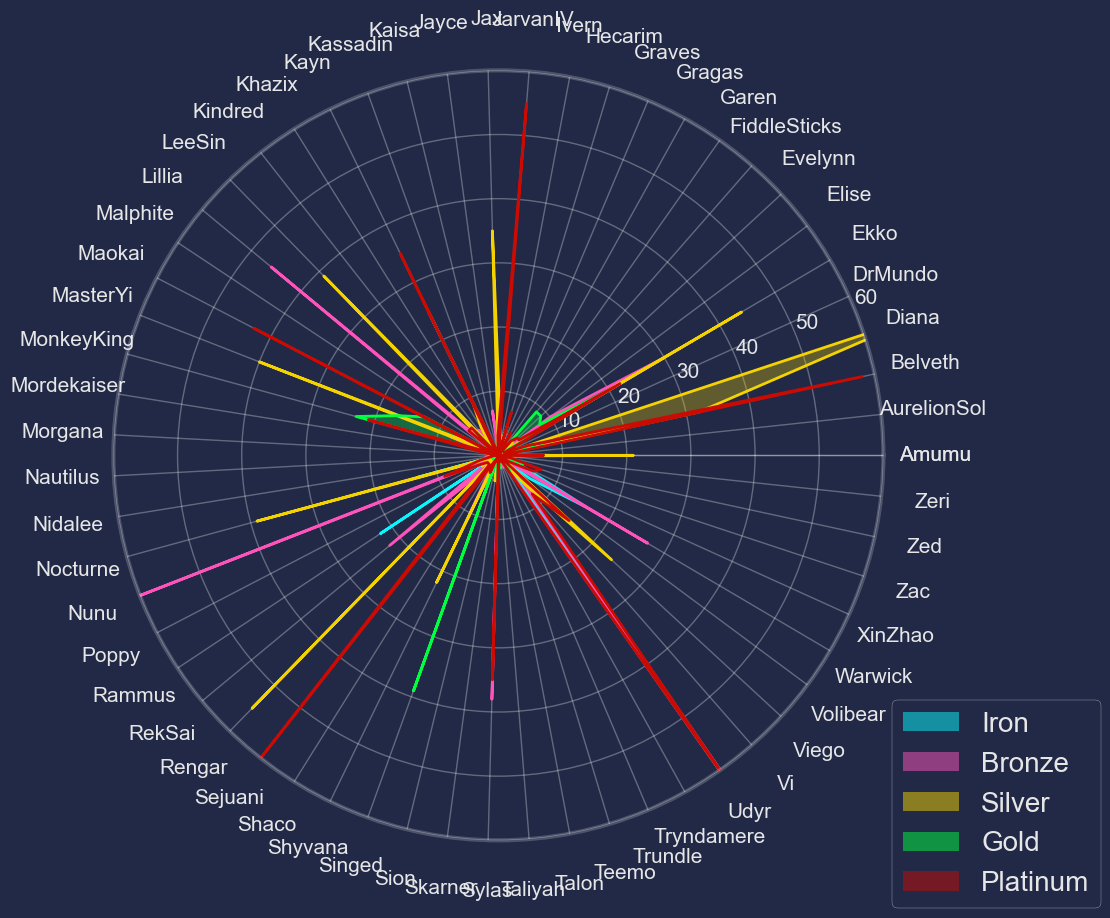

In [100]:
import mplcyberpunk

from matplotlib.patches import Patch

with plt.style.context('cyberpunk'):
    fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(polar=True))

    ax.plot(label_loc, iron, lw=2)
    ax.plot(label_loc, bronze, lw=2)
    ax.plot(label_loc, silver, lw=2)
    ax.plot(label_loc, gold, lw=2)
    ax.plot(label_loc, plat, lw=2)

    ax.fill(label_loc, iron, alpha=0.3)
    ax.fill(label_loc, bronze, alpha=0.3)
    ax.fill(label_loc, silver, alpha=0.3)
    ax.fill(label_loc, gold, alpha=0.3)
    ax.fill(label_loc, plat, alpha=0.3)

    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=champs)

    ax.tick_params(axis='both', which='major', pad=30, labelsize=15)

    ax.spines['polar'].set_linewidth(3)
    
    edge_color = (1, 1, 1, 0.2) 
    ax.spines['polar'].set_color(edge_color) 
    
    ax.grid(color='white', alpha=0.3)
    
    ax.set_ylim(0, 60)
    
    # Create custom legend handles
    iron_legend = Patch(facecolor='C0', alpha=0.5, label='Iron')
    bronze_legend = Patch(facecolor='C1', alpha=0.5, label='Bronze')
    silver_legend = Patch(facecolor='C2', alpha=0.5, label='Silver')
    gold_legend = Patch(facecolor='C3', alpha=0.5, label='Gold')
    plat_legend = Patch(facecolor='C4', alpha=0.5, label='Platinum')

    # Add a legend with custom position and handles
    ax.legend(handles=[iron_legend, bronze_legend, silver_legend, gold_legend, plat_legend],
              bbox_to_anchor=(1.3, 0.2), fontsize=20, 
              frameon=True)


    plt.show()